In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
df=pd.read_csv('/content/reshaped_dataset (1).csv')

In [ ]:
df

Country  Year  Emissions         Activity  \
0      Afghanistan  1991    28.7648  Emissions (CH4)   
1      Afghanistan  1992    29.9255  Emissions (CH4)   
2      Afghanistan  1993    31.3371  Emissions (CH4)   
3      Afghanistan  1994    32.7076  Emissions (CH4)   
4      Afghanistan  1995    33.8030  Emissions (CH4)   
...            ...   ...        ...              ...   
53185      Vietnam  2017     5.4100  Emissions (N2O)   
53186      Vietnam  2018     5.5600  Emissions (N2O)   
53187      Vietnam  2019     5.7100  Emissions (N2O)   
53188      Vietnam  2020     5.8900  Emissions (N2O)   
53189      Vietnam  2021     6.0326  Emissions (N2O)   

                                   Gas  
0      Agrifood Systems Waste Disposal  
1      Agrifood Systems Waste Disposal  
2      Agrifood Systems Waste Disposal  
3      Agrifood Systems Waste Disposal  
4      Agrifood Systems Waste Disposal  
...                                ...  
53185                            Waste  
53186                            Waste  
53187                            Waste  
53188                            Waste  
53189                            Waste  

[53190 rows x 5 columns]

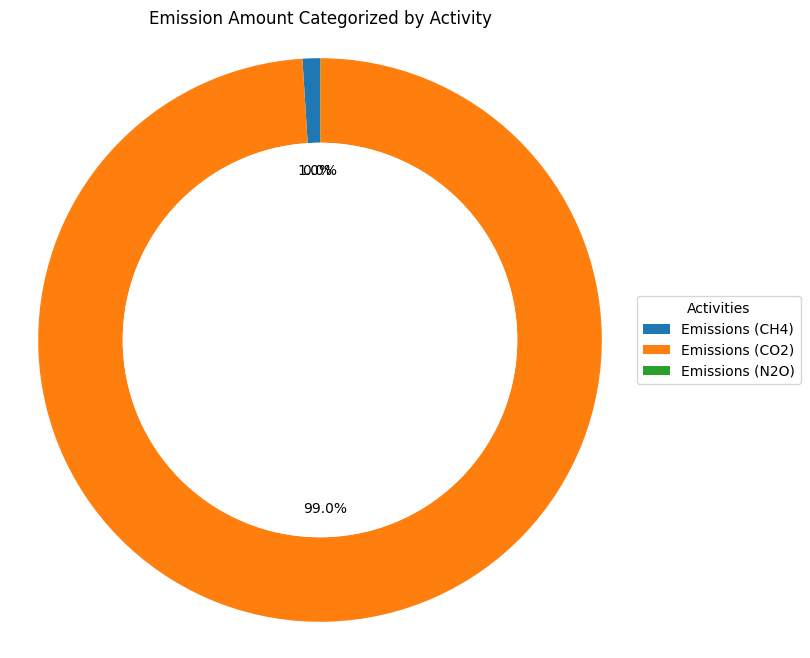

In [ ]:
# Group by 'Activity' and sum the emissions
activity_emissions = df.groupby('Activity')['Emissions'].sum()

# Plotting the donut chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Create a pie chart
wedges, texts, autotexts = ax.pie(activity_emissions, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Emission Amount Categorized by Activity')

# Add a legend
ax.legend(wedges, activity_emissions.index, title="Activities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [ ]:
# Summing up the emissions for each country
df_sum = df.groupby('Country')['Emissions'].sum().reset_index()

# Display the result
print(df_sum)

                                  Country     Emissions
0                             Afghanistan  1.813443e+05
1                              Azerbaijan  1.410143e+06
2                              Bangladesh  2.384508e+06
3                                  Bhutan  2.917514e+04
4                       Brunei Darussalam  2.636873e+05
5                                Cambodia  9.033926e+05
6                                   China  2.388769e+08
7   Democratic People's Republic of Korea  2.004748e+06
8                               Hong Kong  1.220004e+06
9                                   India  5.590226e+07
10                              Indonesia  3.778774e+07
11                                   Iran  1.727390e+07
12                                   Iraq  4.042290e+06
13                                  Japan  4.222351e+07
14                             Kazakhstan  6.893651e+06
15                             Kyrgyzstan  2.643805e+05
16           Lao People's Democratic Rep.  5.724

In [ ]:
from google.colab import files

# Assuming df_long is your DataFrame after reshaping
df_sum.to_csv('reshaped2_dataset.csv', index=False)
from google.colab import files

# Download CSV file
files.download('reshaped2_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Reshape data from wide to long format
df_long = df.melt(id_vars=['Country', 'Year'], var_name='Activity_Gas', value_name='Emissions')

# Split the Activity_Gas column into separate columns for Activity and Gas
df_long[['Gas', 'Activity']] = df_long['Activity_Gas'].str.split('_', expand=True)

# Drop the original Activity_Gas column
df_long.drop(columns='Activity_Gas', inplace=True)


df_long


ValueError: value_name (Emissions) cannot match an element in the DataFrame columns.

In [ ]:
from google.colab import files

# Assuming df_long is your DataFrame after reshaping
df_long.to_csv('reshaped_dataset.csv', index=False)
from google.colab import files

# Download CSV file
files.download('reshaped_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          985 non-null    object 
 1   Year                                             985 non-null    int64  
 2   Emissions (CH4)_Agrifood Systems Waste Disposal  985 non-null    float64
 3   Emissions (CO2)_Agrifood Systems Waste Disposal  985 non-null    float64
 4   Emissions (N2O)_Agrifood Systems Waste Disposal  985 non-null    float64
 5   Emissions (CH4)_Burning - Crop residues          985 non-null    float64
 6   Emissions (N2O)_Burning - Crop residues          985 non-null    float64
 7   Emissions (N2O)_Crop Residues                    985 non-null    float64
 8   Emissions (CO2)_Drained organic soils (CO2)      985 non-null    float64
 9   Emissions (N2O)_Drained organic 

Top 10 features correlated with Rice Production(Tonne):
Emissions (N2O)_Crop Residues                      0.977663
Emissions (N2O)_Burning - Crop residues            0.975934
Emissions (CH4)_Burning - Crop residues            0.975934
Emissions (CH4)_Rice Cultivation                   0.969274
Emissions (CH4)_Agrifood Systems Waste Disposal    0.961576
Emissions (N2O)_Waste                              0.952430
Emissions (N2O)_Synthetic Fertilizers              0.945788
Emissions (CH4)_Manure Management                  0.945060
Emissions (N2O)_Manure applied to Soils            0.940012
Emissions (CH4)_Waste                              0.934382
Name: Rice Production(Tonne), dtype: float64


<ipython-input-5-06f364202e75>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_correlation.values, y=top_10_correlation.index, palette='viridis')


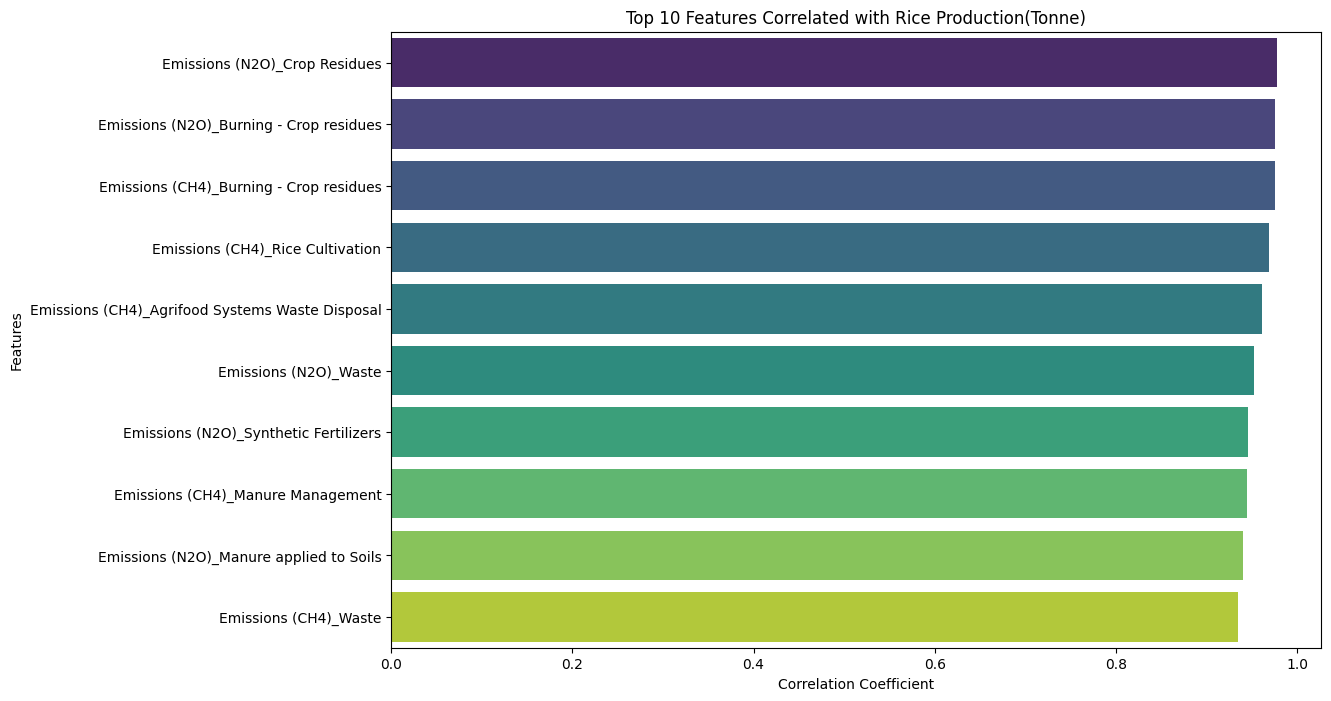

In [ ]:
# Calculate the correlation matrix excluding 'Country', 'Year', and 'Surface Temperature'
correlation_matrix = df.drop(columns=['Country', 'Year', 'Surface Temperature']).corr()

# Get the correlation of 'Rice Production(Tonne)' with other features
rice_correlation = correlation_matrix['Rice Production(Tonne)'].drop(['Rice Production(Tonne)'])

# Select the top 10 features with the highest correlation
top_10_features = rice_correlation.abs().nlargest(10).index
top_10_correlation = rice_correlation[top_10_features]
print("Top 10 features correlated with Rice Production(Tonne):")
print(top_10_correlation)

# Plotting the correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_correlation.values, y=top_10_correlation.index, palette='viridis')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Top 10 Features Correlated with Rice Production(Tonne)')
plt.show()

In [ ]:
columns = ['Country', 'Year'] + list(top_10_features) + ['Rice Production(Tonne)']
df = df[columns]

In [ ]:
df.head(5)

Country  Year  Emissions (CH4)_Agrifood Systems Waste Disposal  \
0  Afghanistan  1991                                          28.7648   
1  Afghanistan  1992                                          29.9255   
2  Afghanistan  1993                                          31.3371   
3  Afghanistan  1994                                          32.7076   
4  Afghanistan  1995                                          33.8030   

   Emissions (CO2)_Agrifood Systems Waste Disposal  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Emissions (N2O)_Agrifood Systems Waste Disposal  \
0                                           0.3599   
1                                           0.3595   
2                                           0.3956   
3                                           0.4090   
4                                           0.4172   

   Emissions (CH4)_Burning - Crop residues  \
0                                   2.7606   
1                                   2.5314   
2                                   3.0714   
3                                   3.2408   
4                                   3.2016   

   Emissions (N2O)_Burning - Crop residues  Emissions (N2O)_Crop Residues  \
0                                   0.0716                         0.7906   
1                                   0.0656                         0.7416   
2                                   0.0796                         0.8710   
3                                   0.0840                         0.9134   
4                                   0.0830                         0.9201   

   Emissions (CO2)_Drained organic soils (CO2)  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Emissions (N2O)_Drained organic soils (N2O)  ...  \
0                                          0.0  ...   
1                                          0.0  ...   
2                                          0.0  ...   
3                                          0.0  ...   
4                                          0.0  ...   

   Emissions (CH4)_Rice Cultivation  Emissions (CH4)_Savanna fires  \
0                             24.22                         0.2639   
1                             24.50                         0.2639   
2                             24.50                         0.2639   
3                             25.20                         0.2639   
4                             23.80                         0.2639   

   Emissions (N2O)_Savanna fires  Emissions (N2O)_Synthetic Fertilizers  \
0                         0.0241                                0.89120   
1                         0.0241                                0.81000   
2                         0.0241                                0.83290   
3                         0.0241                                0.10930   
4                         0.0241                                0.10826   

   Emissions (CH4)_Waste  Emissions (CO2)_Waste  Emissions (N2O)_Waste  \
0                   62.7                   3.15                  0.368   
1                   67.4                   3.28                  0.383   
2                   72.6                   3.42                  0.412   
3                   77.8                   3.56                  0.433   
4                   82.2                   3.70                  0.466   

   Rice Production(Tonne)  Temperature Index  Surface Temperature  
0                335000.0             -0.051             decrease  
1                300000.0             -0.212             decrease  
2                300000.0

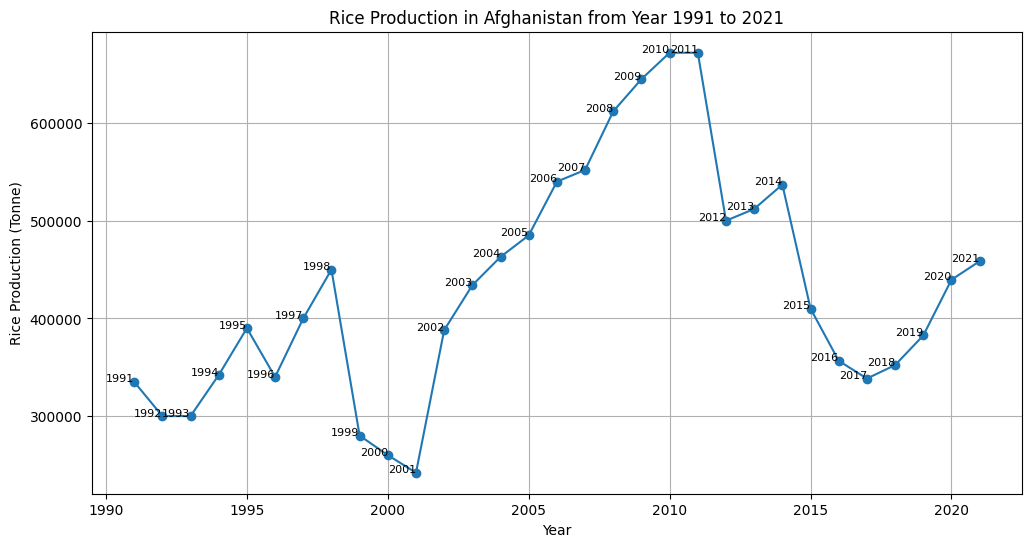

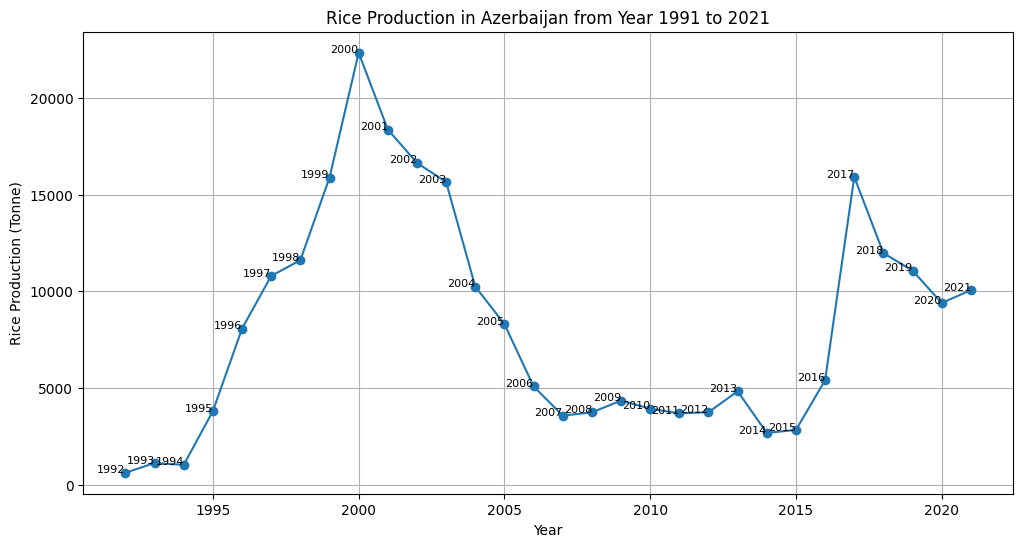

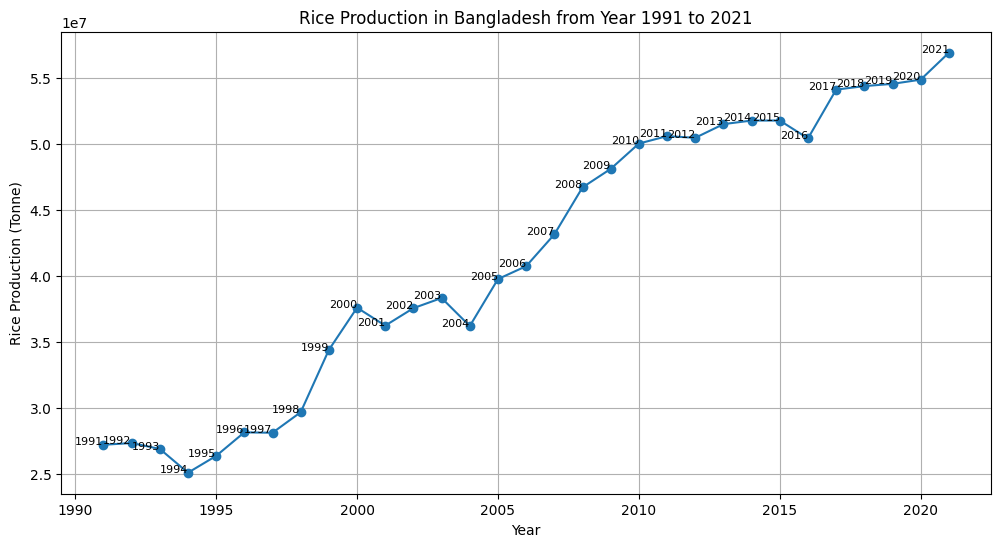

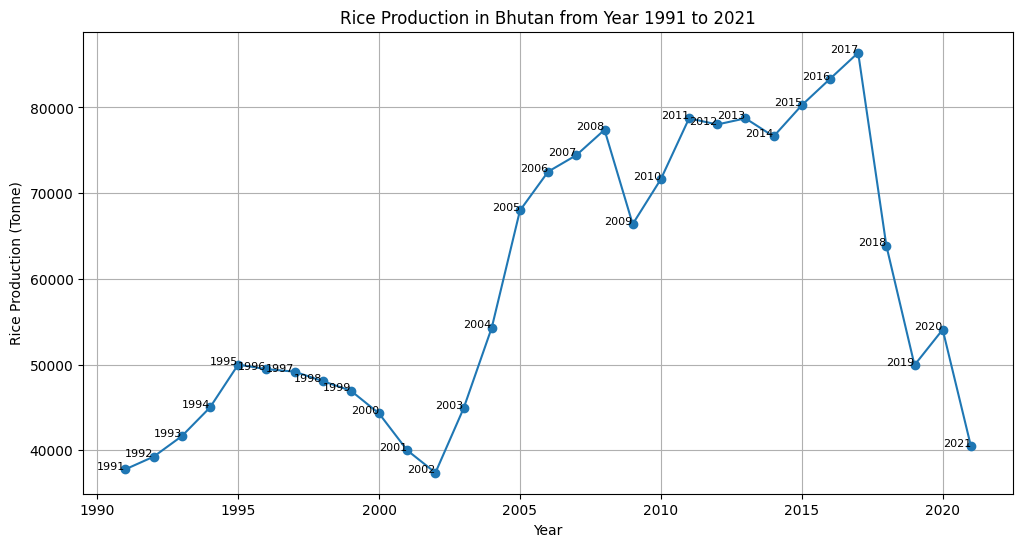

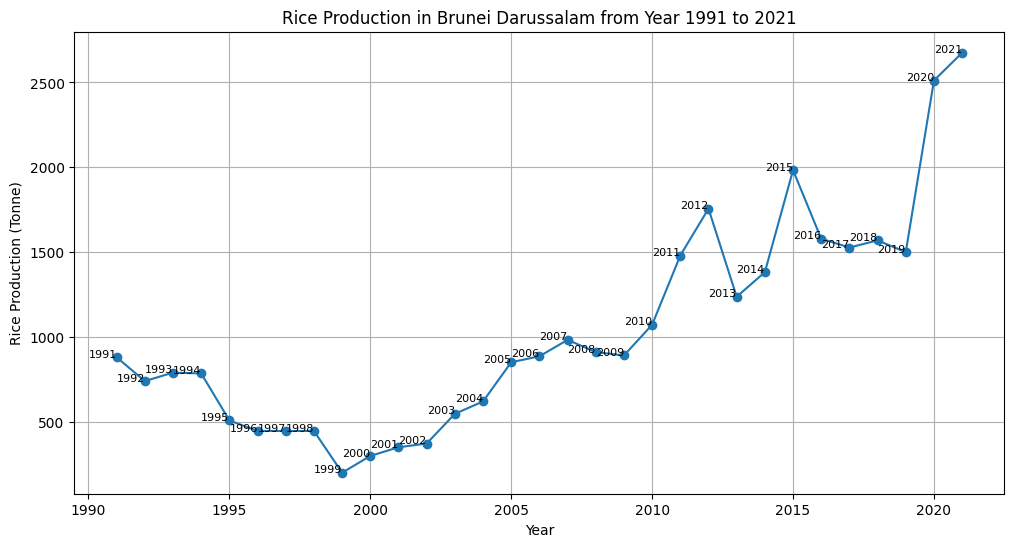

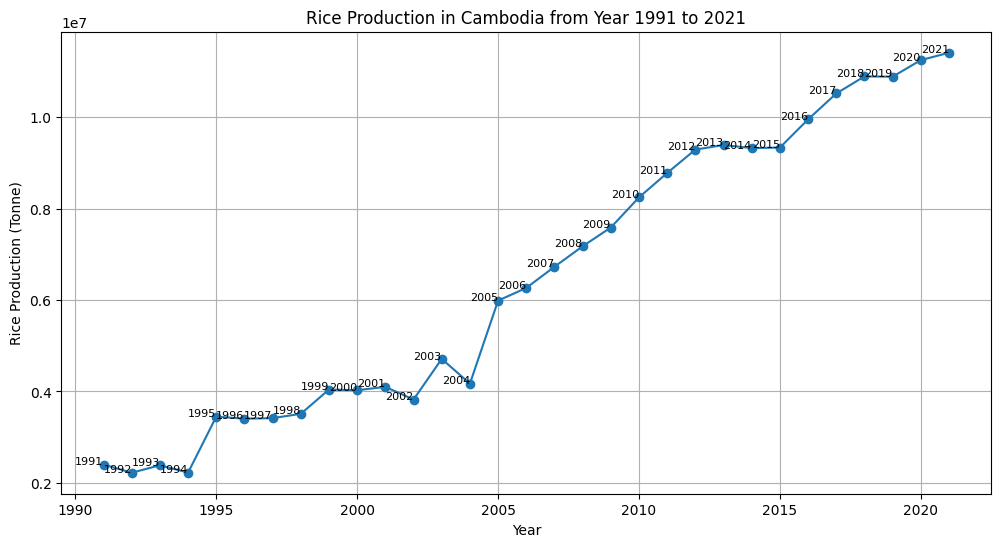

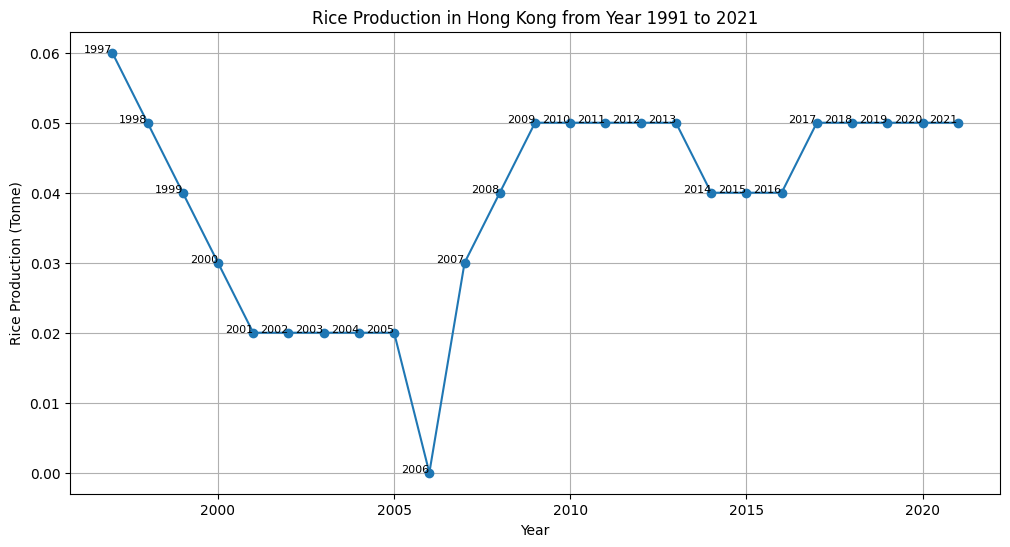

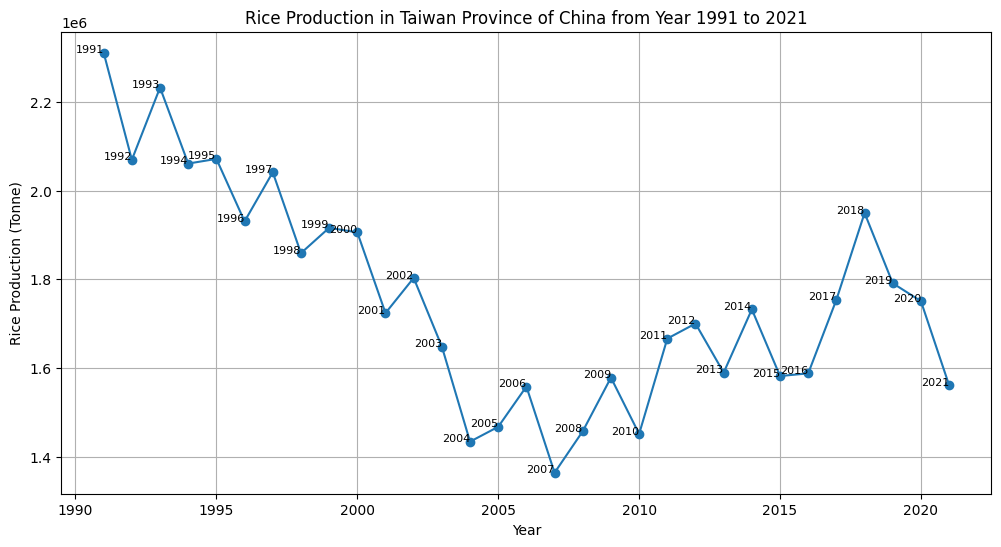

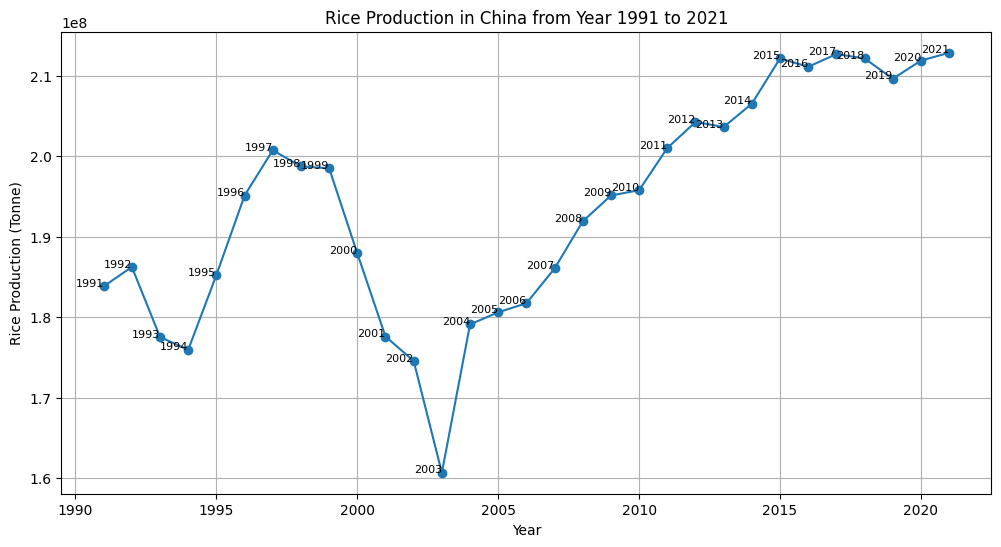

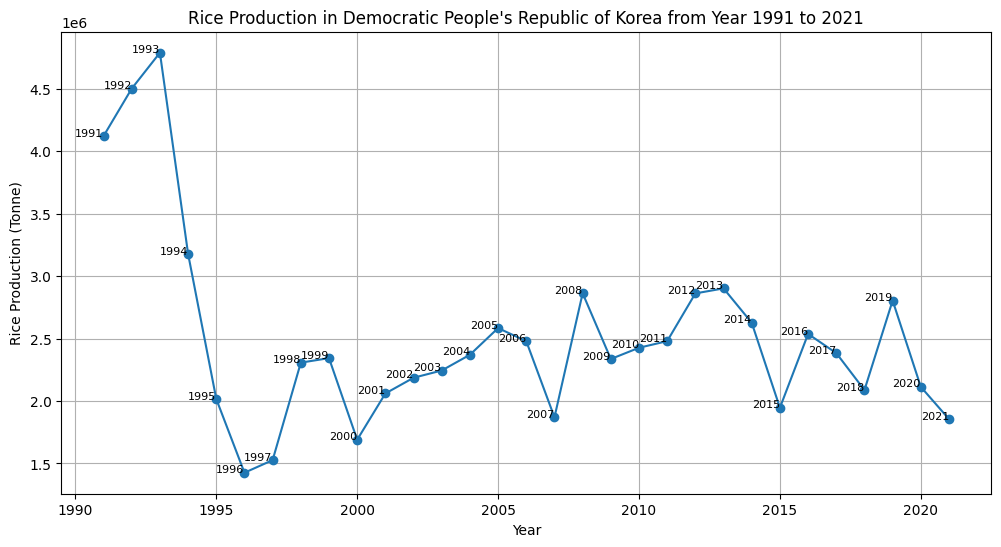

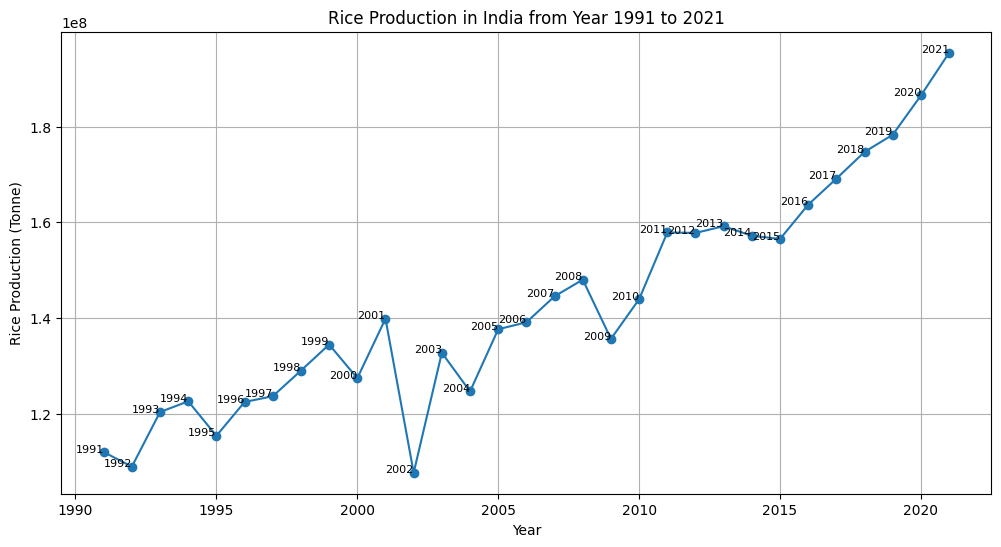

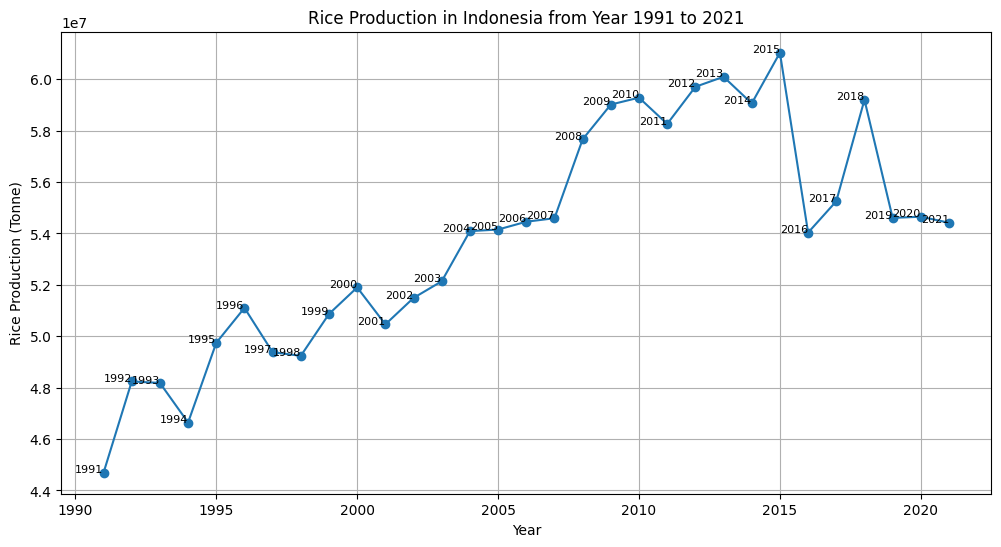

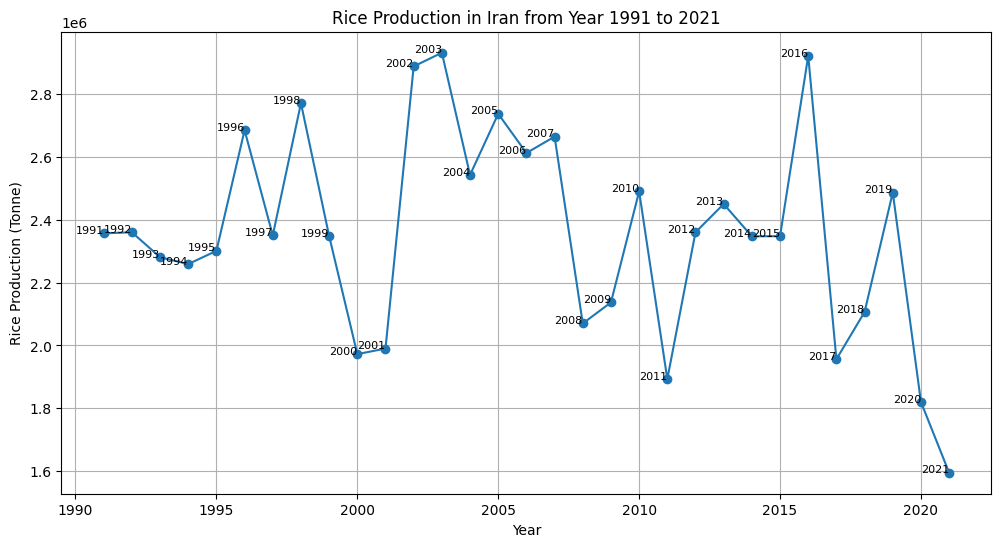

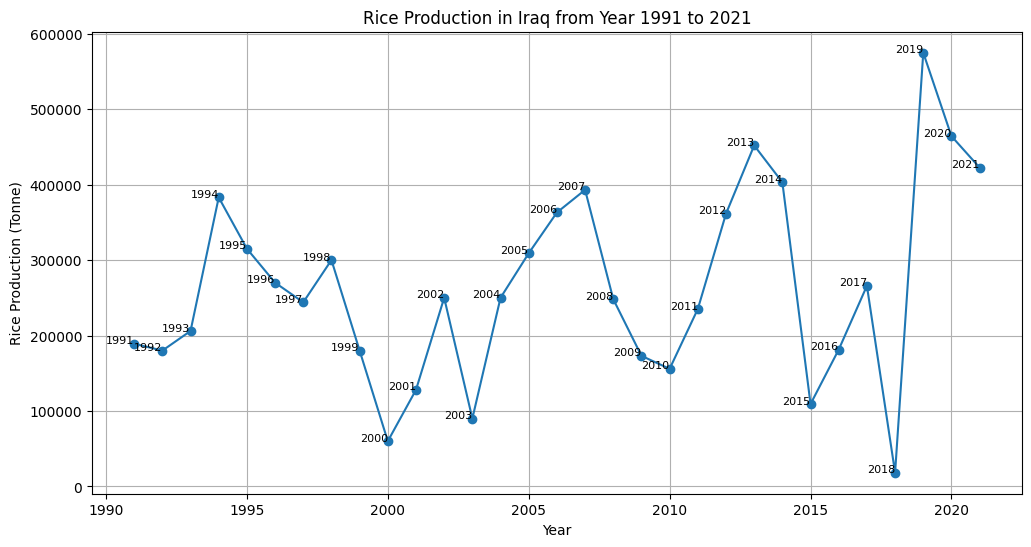

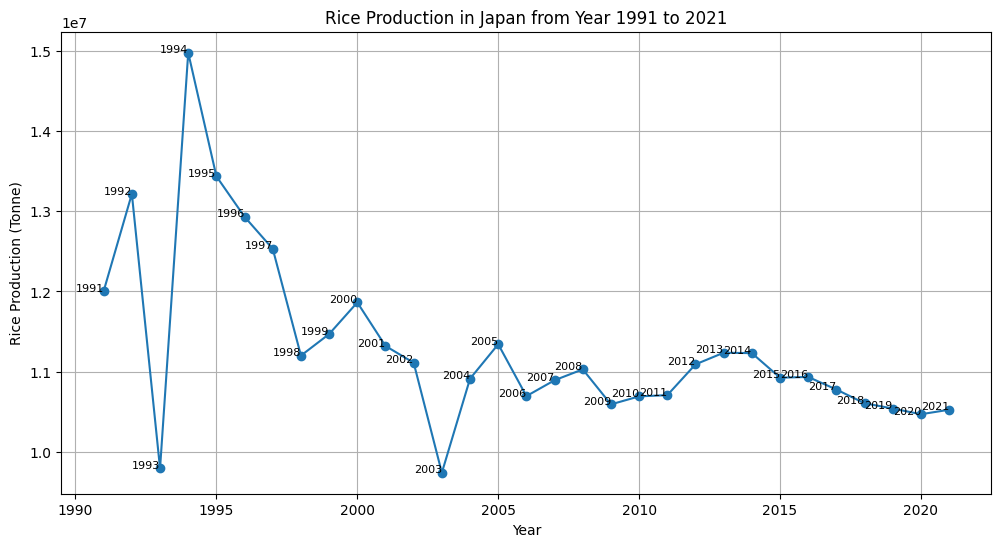

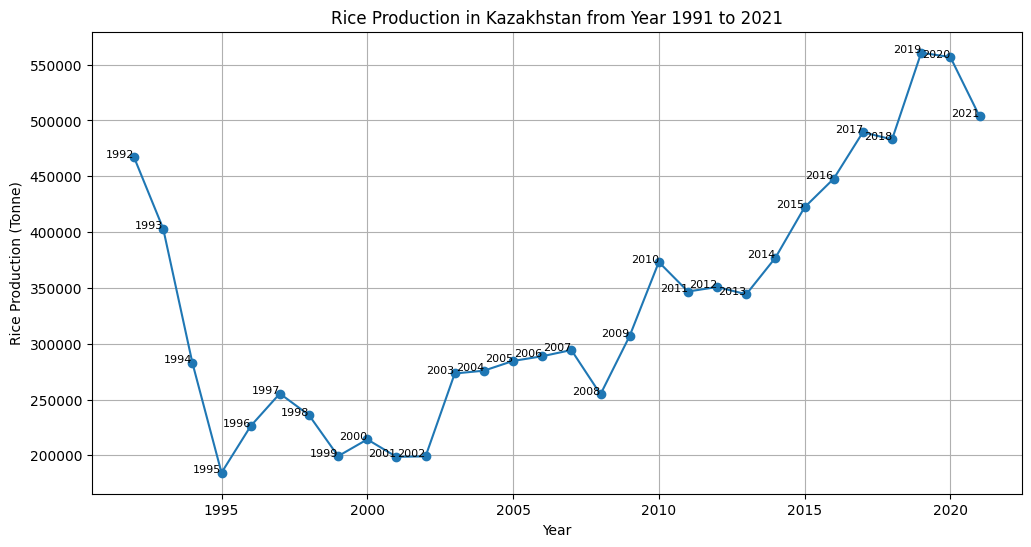

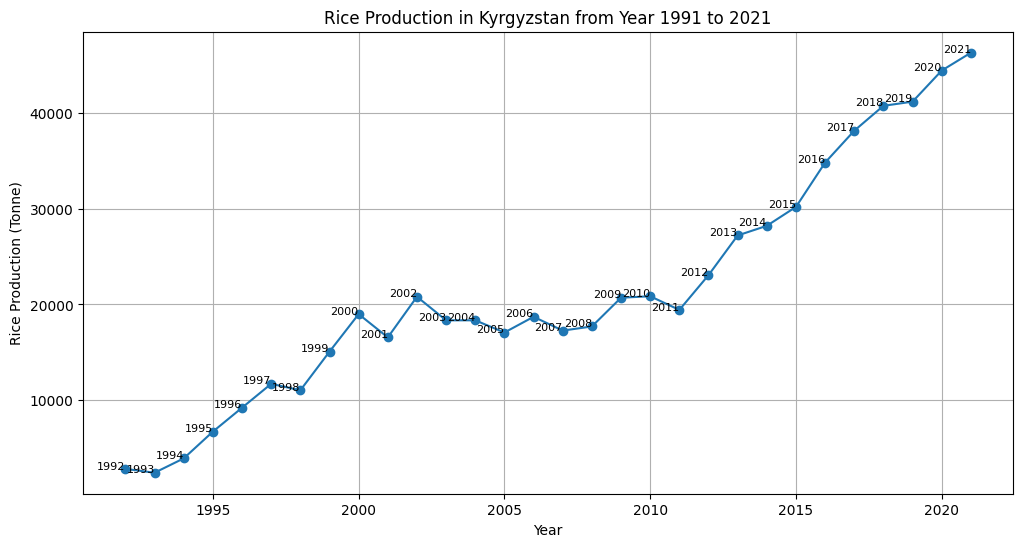

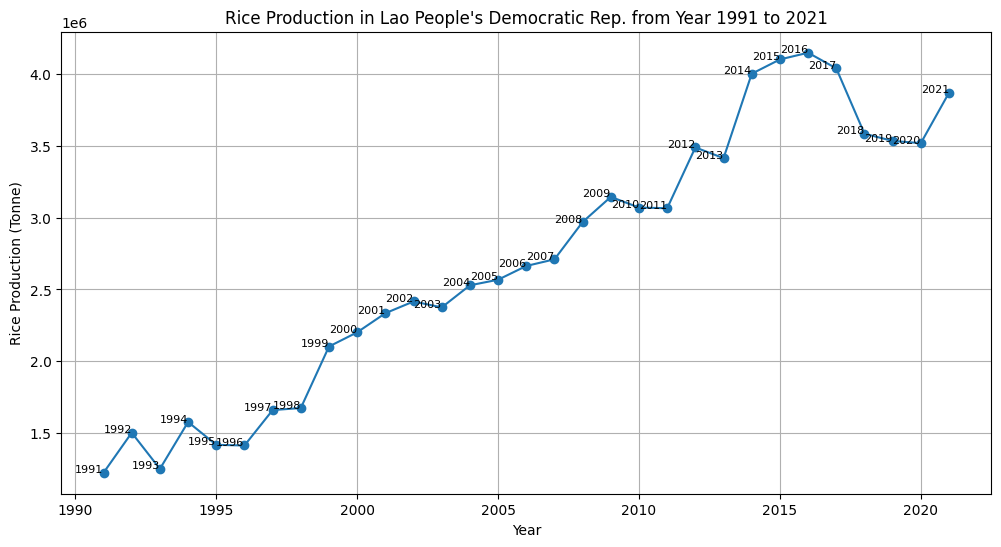

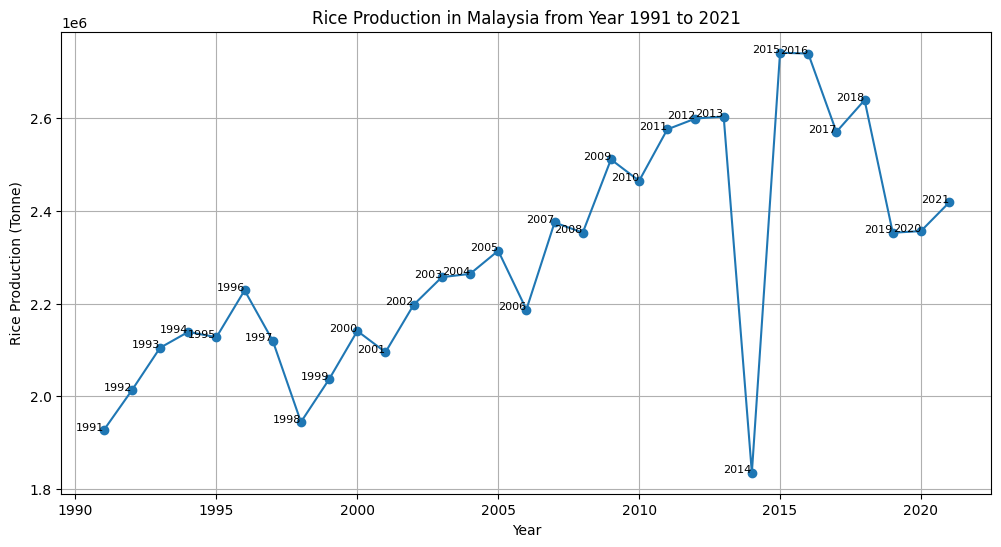

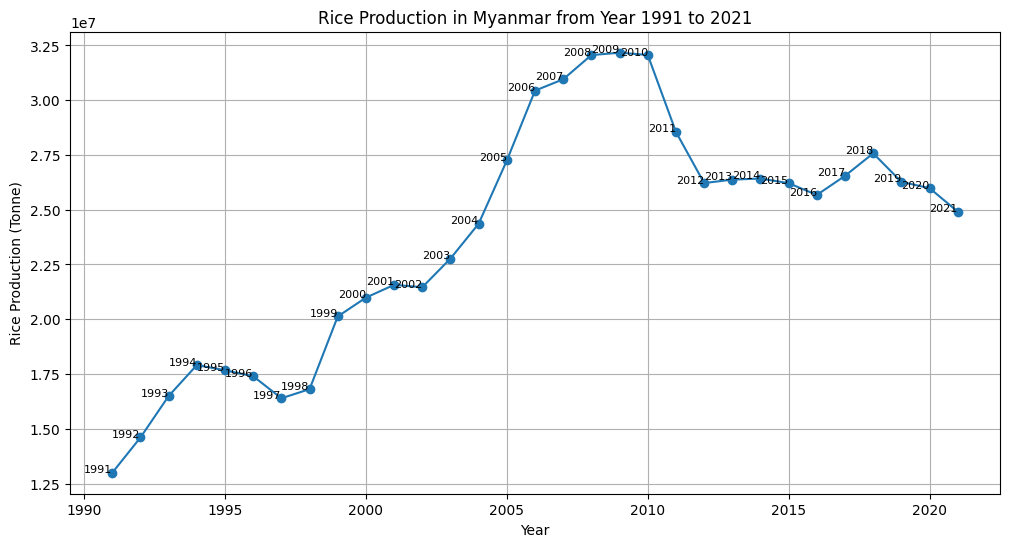

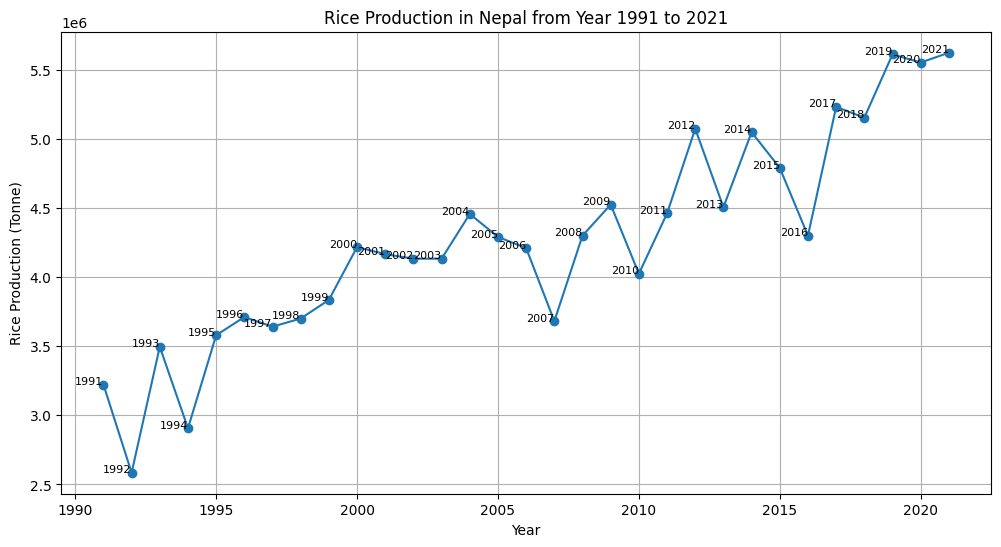

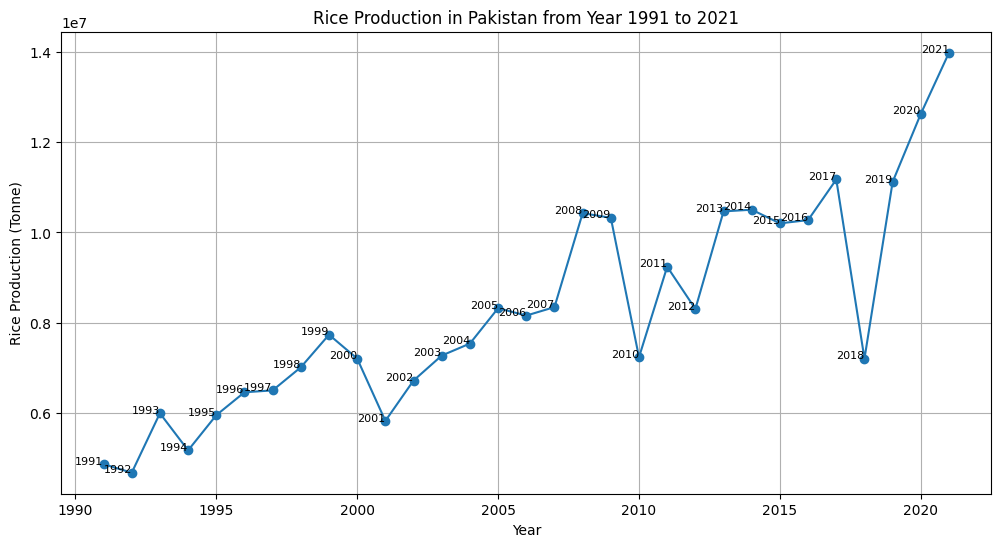

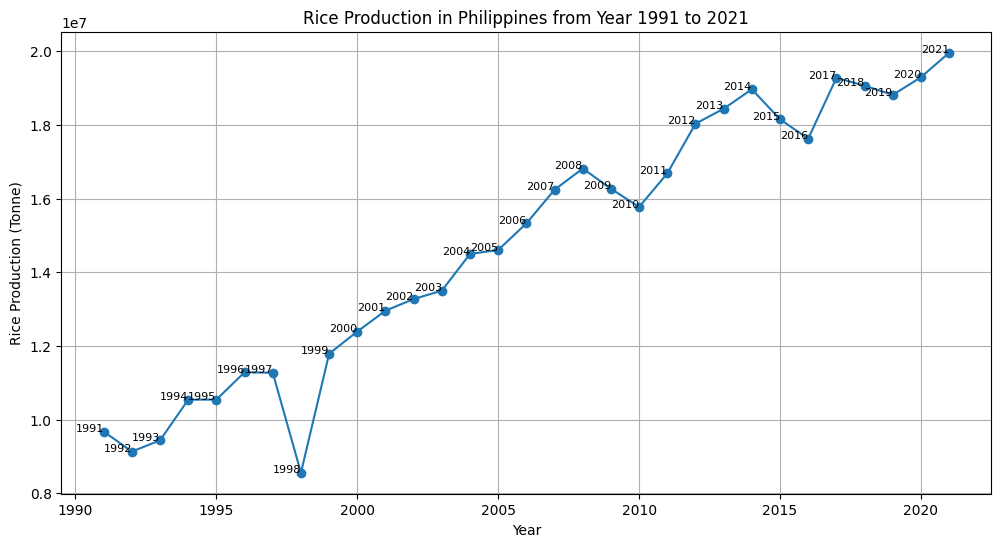

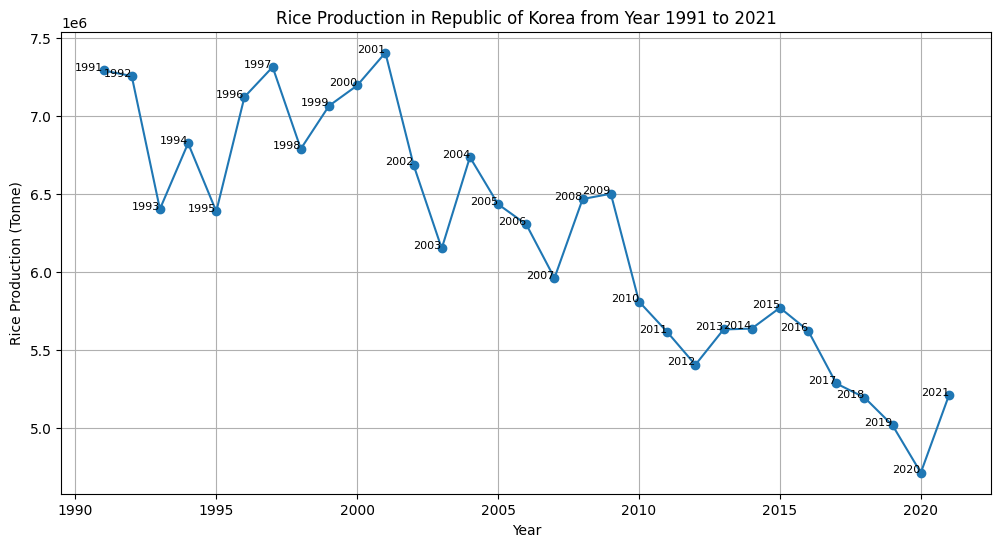

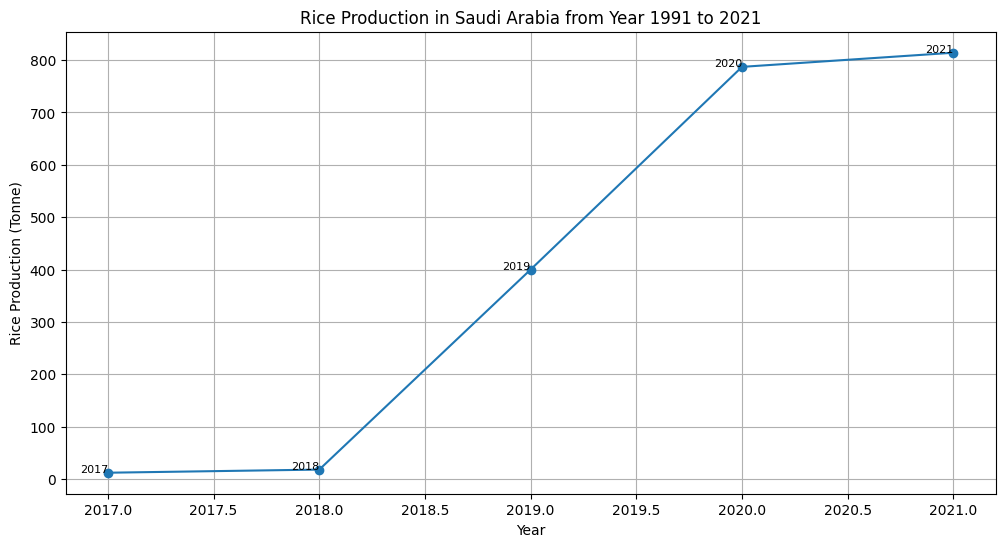

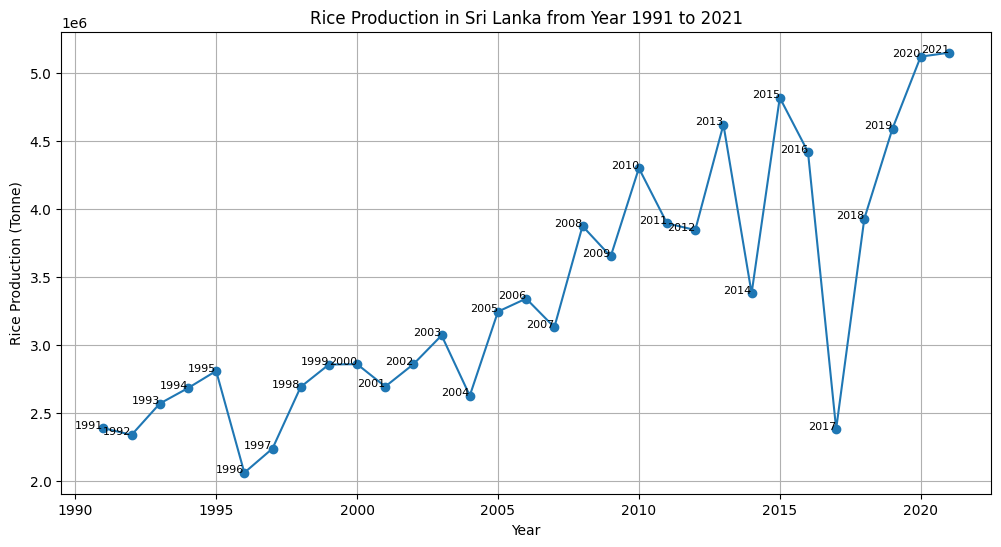

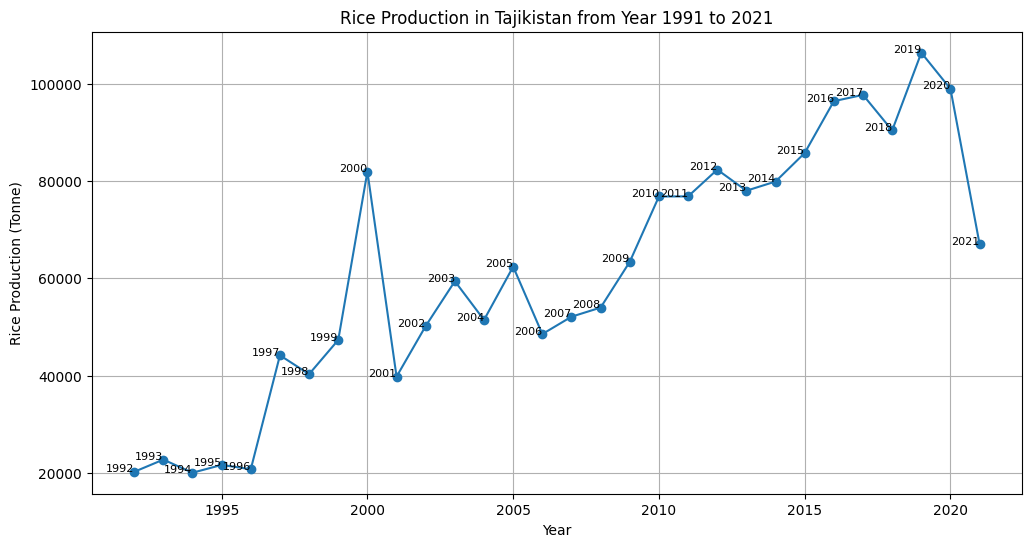

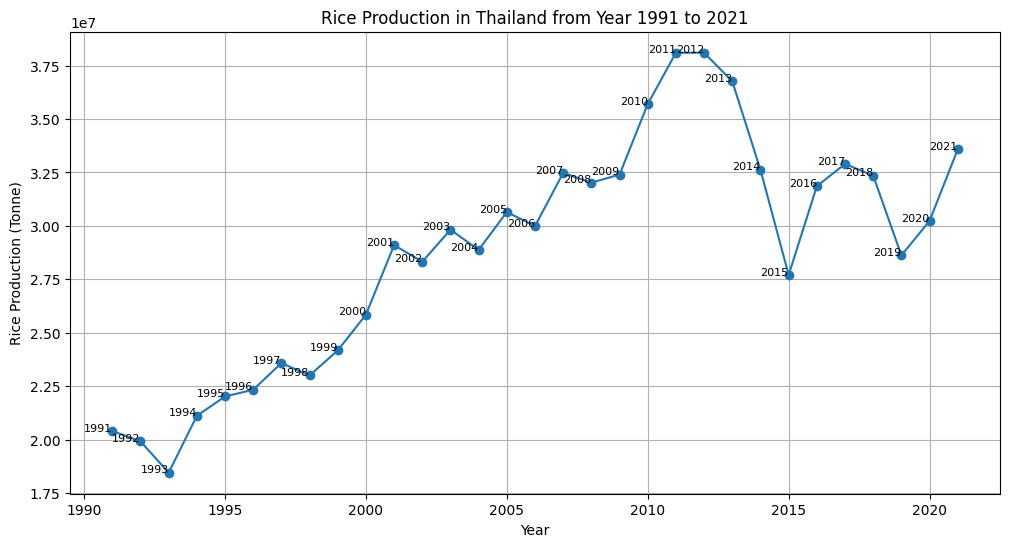

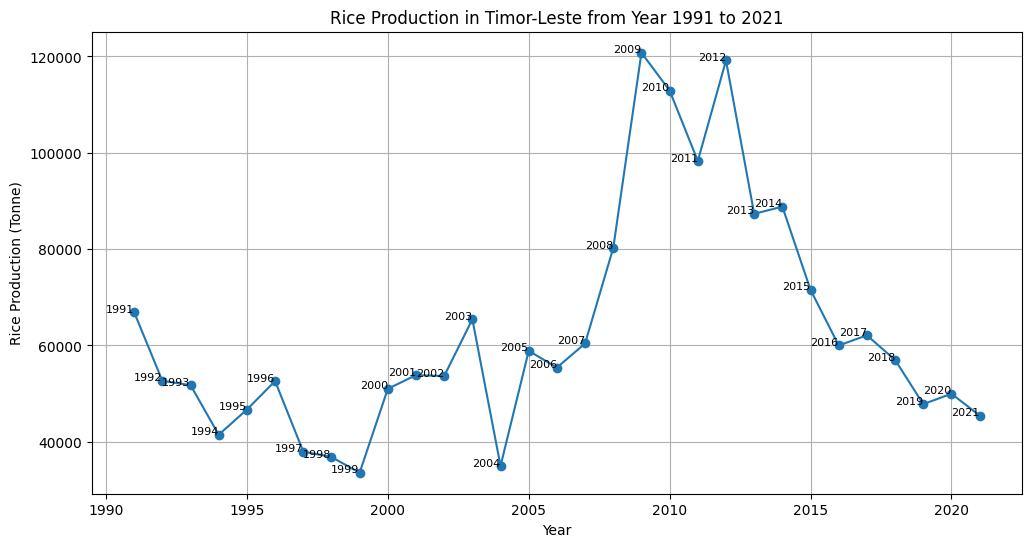

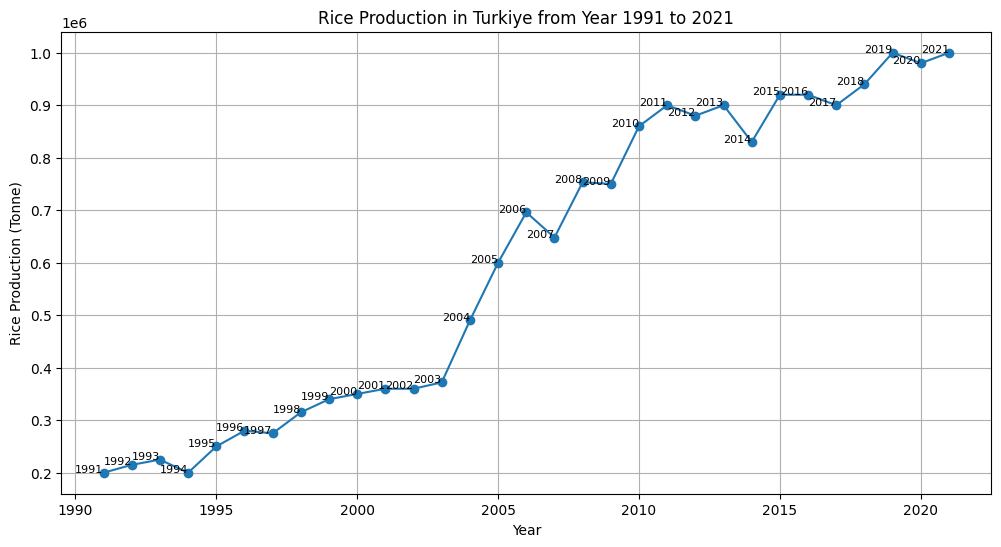

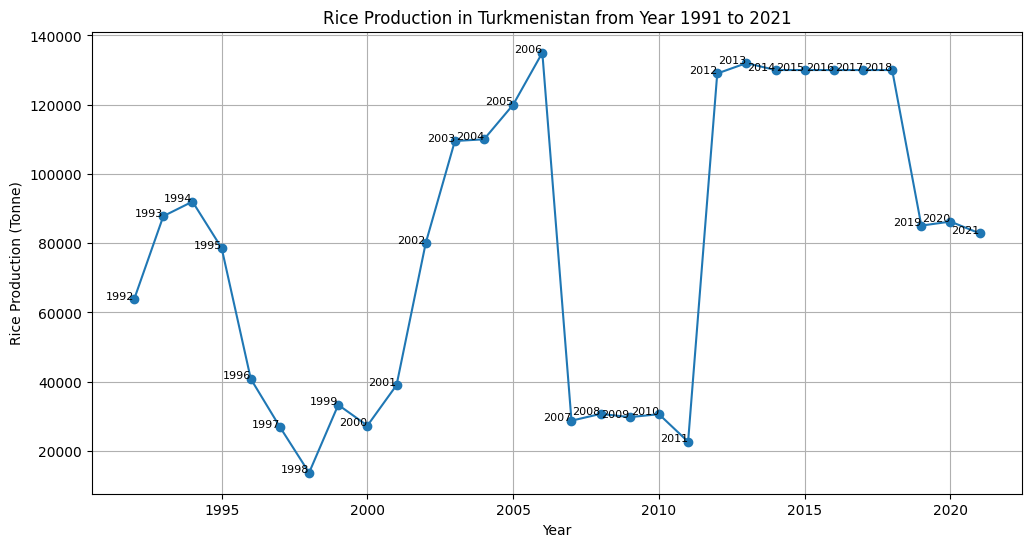

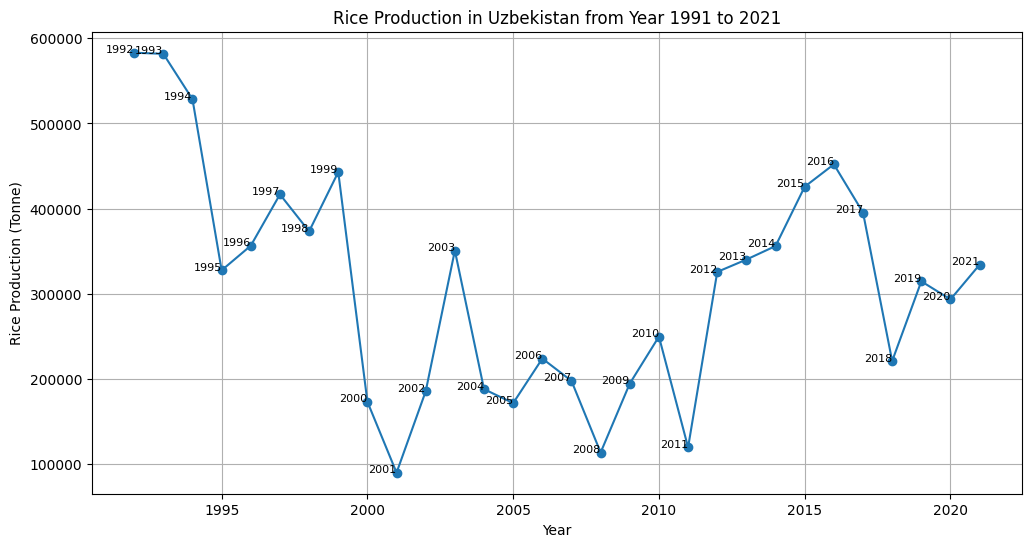

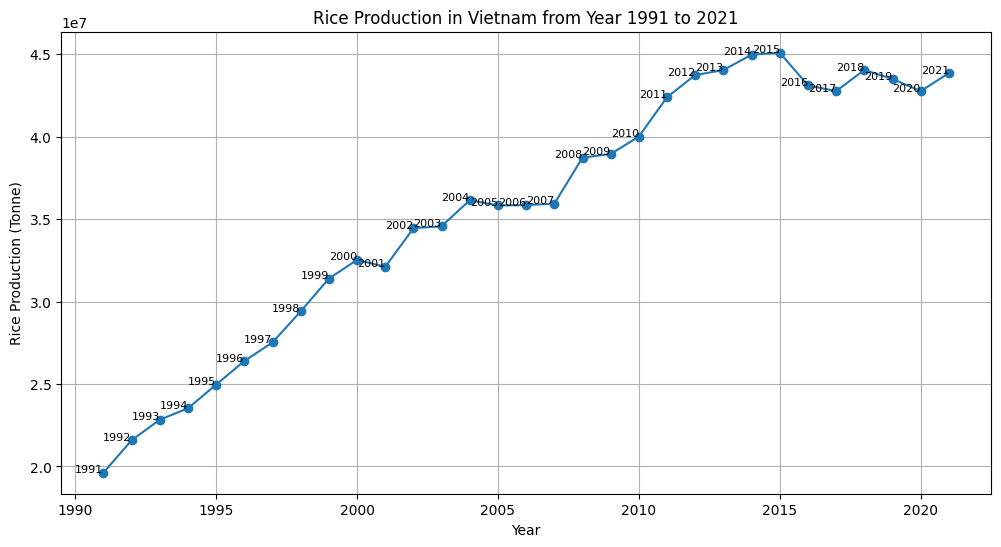

In [ ]:
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Year'], country_data['Rice Production(Tonne)'], marker='o', linestyle='-')

    for year, production in zip(country_data['Year'], country_data['Rice Production(Tonne)']):
        plt.text(year, production, str(year), fontsize=8, ha='right')

    plt.xlabel('Year')
    plt.ylabel('Rice Production (Tonne)')
    plt.title(f'Rice Production in {country} from Year 1991 to 2021')
    plt.grid(True)
    plt.show()



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          985 non-null    object 
 1   Year                                             985 non-null    int64  
 2   Emissions (N2O)_Crop Residues                    985 non-null    float64
 3   Emissions (N2O)_Burning - Crop residues          985 non-null    float64
 4   Emissions (CH4)_Burning - Crop residues          985 non-null    float64
 5   Emissions (CH4)_Rice Cultivation                 985 non-null    float64
 6   Emissions (CH4)_Agrifood Systems Waste Disposal  985 non-null    float64
 7   Emissions (N2O)_Waste                            985 non-null    float64
 8   Emissions (N2O)_Synthetic Fertilizers            985 non-null    float64
 9   Emissions (CH4)_Manure Managemen

In [ ]:
# Assuming your DataFrame is named df
rows_saudi_arabia = df[df['Country'] == 'Saudi Arabia']
rows_saudi_arabia


Country  Year  Emissions (N2O)_Crop Residues  \
735  Saudi Arabia  2017                         0.3500   
736  Saudi Arabia  2018                         0.3470   
737  Saudi Arabia  2019                         0.3088   
738  Saudi Arabia  2020                         0.2879   
739  Saudi Arabia  2021                         0.2899   

     Emissions (N2O)_Burning - Crop residues  \
735                                   0.0036   
736                                   0.0040   
737                                   0.0030   
738                                   0.0034   
739                                   0.0035   

     Emissions (CH4)_Burning - Crop residues  \
735                                   0.1382   
736                                   0.1524   
737                                   0.1138   
738                                   0.1302   
739                                   0.1343   

     Emissions (CH4)_Rice Cultivation  \
735                            0.0347   
736                            0.0356   
737                            0.0644   
738                            0.0944   
739                            0.0949   

     Emissions (CH4)_Agrifood Systems Waste Disposal  Emissions (N2O)_Waste  \
735                                         362.3169                 1.8300   
736                                         364.8460                 1.8600   
737                                         367.1417                 1.9700   
738                                         369.1455                 2.0200   
739                                         371.2043                 2.0516   

     Emissions (N2O)_Synthetic Fertilizers  Emissions (CH4)_Manure Management  \
735                                 3.7187                             7.6292   
736                                 3.7104                             7.8341   
737                                 3.7104                             8.0000   
738                                 3.6562                             8.6568   
739                                 3.6562                             8.6849   

     Emissions (N2O)_Manure applied to Soils  Emissions (CH4)_Waste  \
735                                   0.4984              1050.0000   
736                                   0.5309              1080.0000   
737                                   0.5391              1140.0000   
738                                   0.5556              1170.0000   
739                                   0.5632              1196.5514   

     Rice Production(Tonne)  
735                    12.0  
736                    18.0  
737                   400.0  
738                   787.0  
739                   814.0

In [ ]:
# Remove Saudi Arabia as it only contains 5 years of data
df = df[df['Country'] != 'Saudi Arabia']
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 984
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          980 non-null    object 
 1   Year                                             980 non-null    int64  
 2   Emissions (N2O)_Crop Residues                    980 non-null    float64
 3   Emissions (N2O)_Burning - Crop residues          980 non-null    float64
 4   Emissions (CH4)_Burning - Crop residues          980 non-null    float64
 5   Emissions (CH4)_Rice Cultivation                 980 non-null    float64
 6   Emissions (CH4)_Agrifood Systems Waste Disposal  980 non-null    float64
 7   Emissions (N2O)_Waste                            980 non-null    float64
 8   Emissions (N2O)_Synthetic Fertilizers            980 non-null    float64
 9   Emissions (CH4)_Manure Management    

In [ ]:
# Ensure data is sorted by Country and Year
df = df.sort_values(by=['Country', 'Year'])

# Define feature columns and target column
feature_columns = df.columns.difference(['Country', 'Year', 'Rice Production(Tonne)'])

# Split the data into training and test sets by year for each country
train, test = {}, {}
countries = df['Country'].unique()

for country in countries:
    country_data = df[df['Country'] == country]
    train[country] = country_data.iloc[:-5]
    test[country] = country_data.iloc[-5:]


# Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Stationarity Check for each country's training data
results_table = []
for country in countries:
    try:
        result = adfuller(train[country]['Rice Production(Tonne)'])
        results_table.append([country, result[0], result[1]])
    except Exception as e:
        print(f"Error occurred for country {country}: {e}")

# Print results in a table format
print(tabulate(results_table, headers=["Country", "ADF Statistic", "p-value"]))



Country                                  ADF Statistic     p-value
-------------------------------------  ---------------  ----------
Afghanistan                                 -1.45943    0.553475
Azerbaijan                                  -2.93442    0.0414895
Bangladesh                                  -0.494685   0.893049
Bhutan                                      -0.564039   0.878902
Brunei Darussalam                            0.369029   0.980299
Cambodia                                     0.372799   0.980449
China                                       -0.927037   0.778938
Democratic People's Republic of Korea       -2.47641    0.12132
Hong Kong                                   -1.97562    0.297365
India                                       -0.84409    0.805827
Indonesia                                   -2.25589    0.18659
Iran                                        -3.63561    0.0051156
Iraq                                        -3.65374    0.00481291
Japan              

In [ ]:
# Define a significance level
significance_level = 0.05

# Filter out data for countries where differencing is needed
differencing_needed = [country for country, adf_statistic, p_value in results_table if p_value > significance_level]

# Print countries where differencing is needed
print("Countries where differencing is needed:")
print(differencing_needed)


Countries where differencing is needed:
['Afghanistan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', "Democratic People's Republic of Korea", 'Hong Kong', 'India', 'Indonesia', 'Kazakhstan', 'Kyrgyzstan', "Lao People's Democratic Rep.", 'Malaysia', 'Myanmar', 'Pakistan', 'Philippines', 'Republic of Korea', 'Sri Lanka', 'Taiwan Province of China', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkiye', 'Turkmenistan', 'Uzbekistan', 'Vietnam']


In [ ]:
# Define non-stationary country names
non_stationary_countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Democratic People\'s Republic of Korea', 'Hong Kong', 'India', 'Indonesia', 'Kazakhstan', 'Kyrgyzstan', 'Lao People\'s Democratic Rep.', 'Malaysia', 'Myanmar', 'Pakistan', 'Philippines', 'Republic of Korea', 'Sri Lanka', 'Taiwan Province of China', 'Thailand', 'Timor-Leste', 'Turkiye', 'Turkmenistan', 'Uzbekistan', 'Vietnam']

# Perform differencing for non-stationary country data
for country in non_stationary_countries:
    df.loc[df['Country'] == country, 'Rice Production(Tonne)'] = df[df['Country'] == country]['Rice Production(Tonne)'].diff()

# Use backfilling to fill NaN values
df.fillna(method='bfill', inplace=True)

# Print the updated DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 984
Data columns (total 60 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          980 non-null    object 
 1   Year                                             980 non-null    int64  
 2   Emissions (CH4)_Agrifood Systems Waste Disposal  980 non-null    float64
 3   Emissions (CO2)_Agrifood Systems Waste Disposal  980 non-null    float64
 4   Emissions (N2O)_Agrifood Systems Waste Disposal  980 non-null    float64
 5   Emissions (CH4)_Burning - Crop residues          980 non-null    float64
 6   Emissions (N2O)_Burning - Crop residues          980 non-null    float64
 7   Emissions (N2O)_Crop Residues                    980 non-null    float64
 8   Emissions (CO2)_Drained organic soils (CO2)      980 non-null    float64
 9   Emissions (N2O)_Drained organic soils

In [ ]:
from pmdarima.arima import auto_arima

# Dictionary to store the best models for each country
best_models = {}

# Iterate over each unique country
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    stepwise_fit = auto_arima(country_data['Rice Production(Tonne)'],
                              trace=True,
                              suppress_warnings=True)

    # Store the best model for the current country
    best_models[country] = stepwise_fit

    # Print the summary of the best model for the current country
    print(f"Best model for {country}:")
    print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=787.098, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=779.361, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=781.081, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=781.185, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=777.420, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=782.823, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.083 seconds
Best model for Afghanistan:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                        SARIMAX   Log Likelihood                -387.710
Date:                Sun, 02 Jun 2024   AIC                            777.420
Time:                        02:15:59   BIC                            778.854
Sample:                             0   HQIC                       

In [ ]:
# Define the list of countries with their corresponding ARIMA parameters
country_params = {
    'Afghanistan': (0, 0, 1),
    'Azerbaijan': (0, 0, 1),
    'Bangladesh': (0, 0, 1),
    'Bhutan': (1, 0, 2),
    'Brunei Darussalam': (2, 0, 1),
    'Cambodia': (1, 0, 2),
    'China': (0, 0, 1),
    'Democratic People\'s Republic of Korea': (0, 0, 1),
    'Hong Kong': (0, 0, 1),
    'India': (0, 0, 1),
    'Indonesia': (2, 0, 2),
    'Iran': (0, 0, 1),
    'Iraq': (0, 0, 1),
    'Japan': (0, 1, 0),
    'Kazakhstan': (0, 0, 1),
    'Kyrgyzstan': (0, 0, 1),
    'Lao People\'s Democratic Rep.': (0, 0, 1),
    'Malaysia': (0, 0, 2),
    'Myanmar': (0, 0, 1),
    'Nepal': (1, 1, 1),
    'Pakistan': (2, 0, 3),
    'Philippines': (0, 0, 1),
    'Republic of Korea': (0, 0, 1),
    'Sri Lanka': (2, 0, 2),
    'Taiwan Province of China': (0, 0, 1),
    'Tajikistan': (2, 1, 1),
    'Thailand': (0, 0, 1),
    'Timor-Leste': (2, 0, 1),
    'Turkiye': (0, 0, 1),
    'Turkmenistan': (0, 0, 1),
    'Uzbekistan': (0, 0, 1),
    'Vietnam': (0, 0, 1)
}

Processing country: Afghanistan
Test Values: [-18145.    13757.    30323.    57049.    19022.64]
Predictions: [-4400.69393669  -516.73076934  -516.73076934  -516.73076934
  -516.73076934]


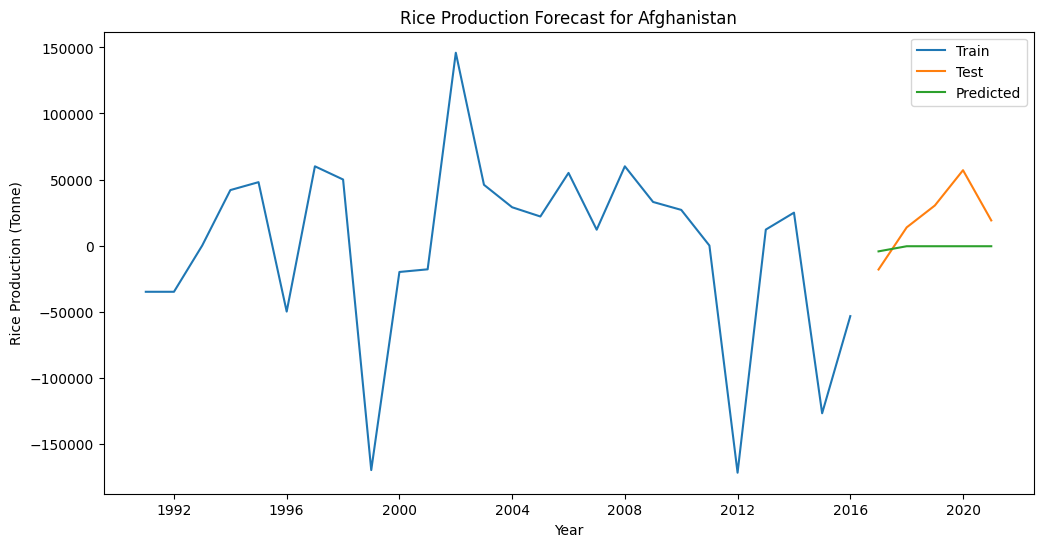

Processing country: Azerbaijan
Test Values: [15915.7 11974.6 11070.   9397.3 10062.3]
Predictions: [ 7213.47118602  8990.42384335 10548.59809247 11760.7623375
 12541.17043053]


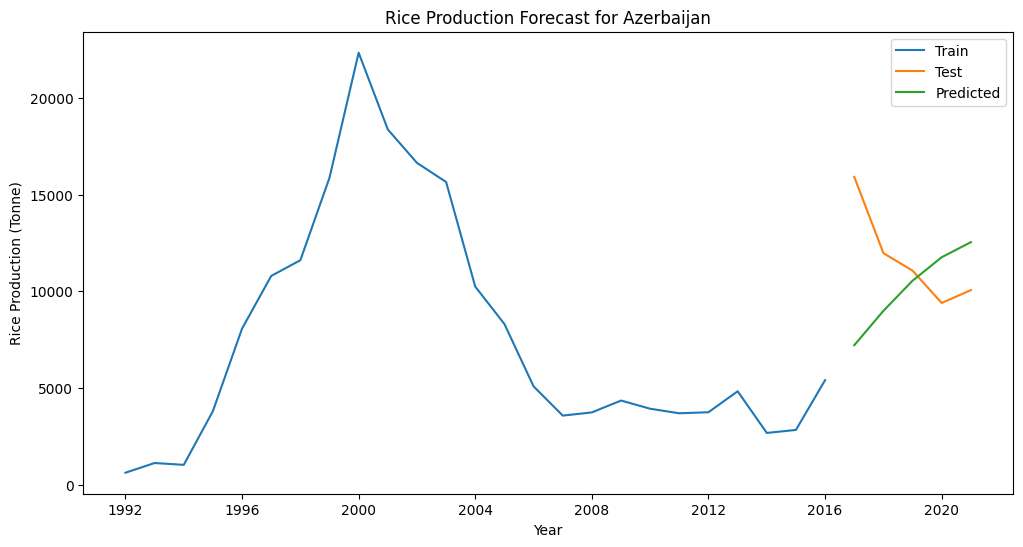

Processing country: Bangladesh
Test Values: [3695134.    268000.    170344.    319547.   2038662.97]
Predictions: [897764.07692308 897764.07692308 897764.07692308 897764.07692308
 897764.07692308]


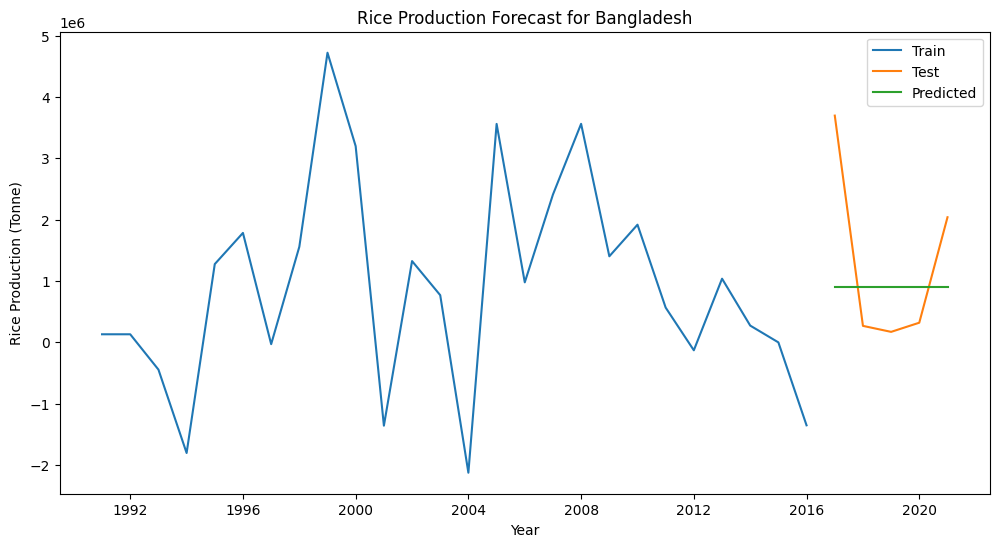

Processing country: Bhutan
Test Values: [  3053.   -22495.18 -13941.77   4140.35 -13580.5 ]
Predictions: [2502. 1933. 1364.  795.  226.]


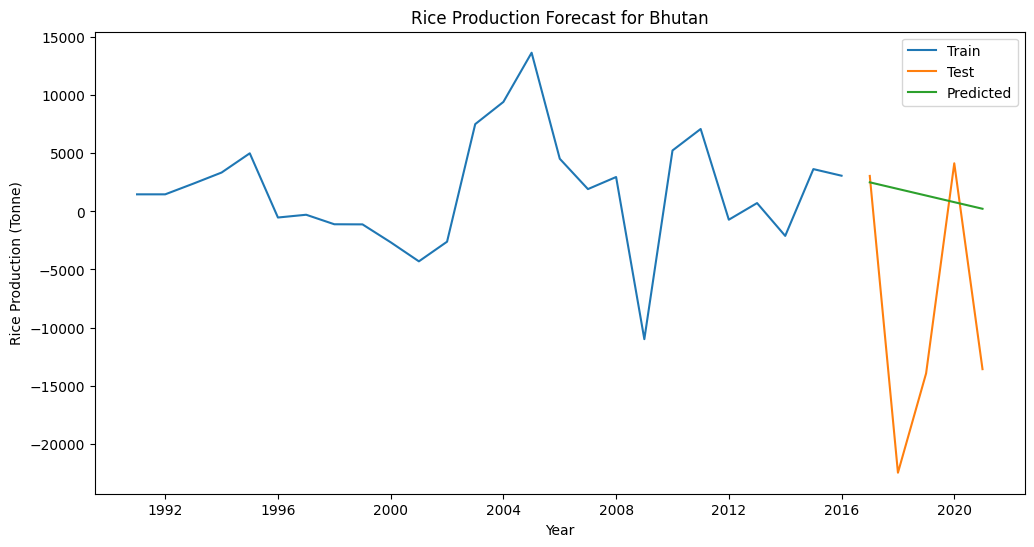

Processing country: Brunei Darussalam
Test Values: [ -52.     42.    -69.05 1011.35  163.7 ]
Predictions: [-161.34420101  118.84953189  -44.75857748   50.77394273   -5.00851483]


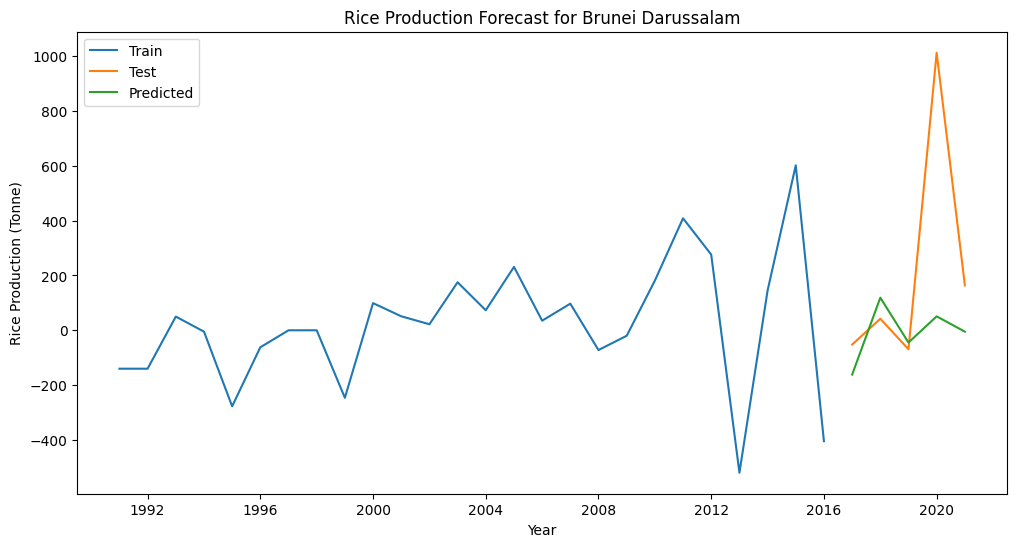

Processing country: Cambodia
Test Values: [566000. 374000.  -6300. 362300. 162000.]
Predictions: [270323.26438782 232823.44410303 195323.62381824 157823.80353344
 120323.98324865]


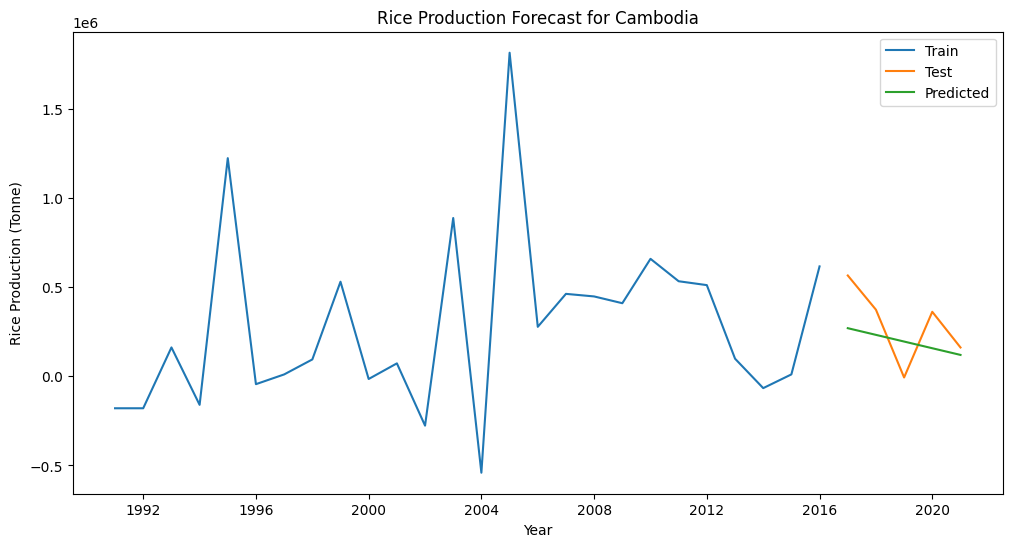

Processing country: China
Test Values: [ 1581900.  -546900. -2515000.  2246000.   983000.]
Predictions: [-156285.84028296  363203.90623566  532498.44333404  664988.13297156
  768674.39574827]


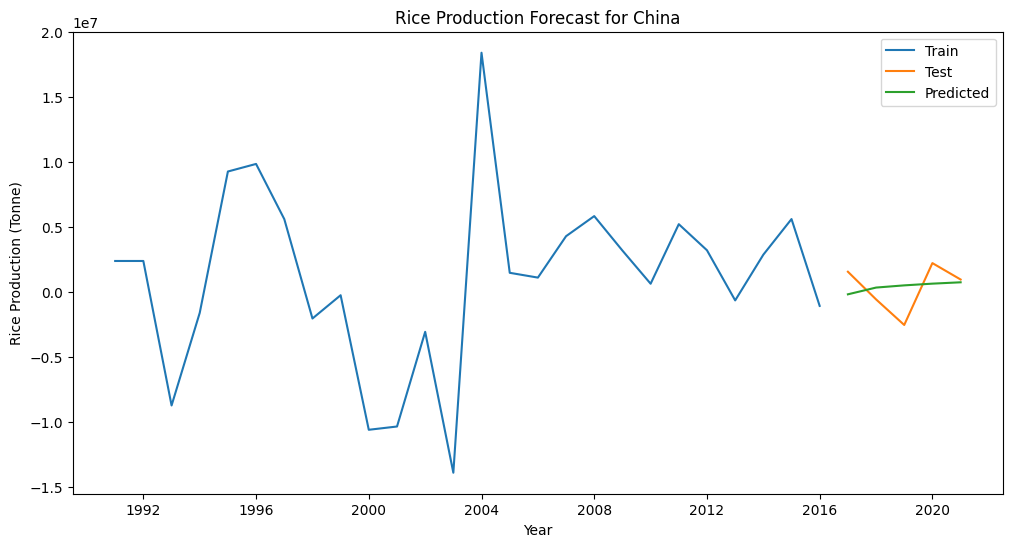

Processing country: Democratic People's Republic of Korea
Test Values: [-153142.7  -295653.8   716090.5  -690694.7  -258177.19]
Predictions: [  50688.96678518 -130028.80563206   39515.60928034 -119546.27070799
   29681.18499142]


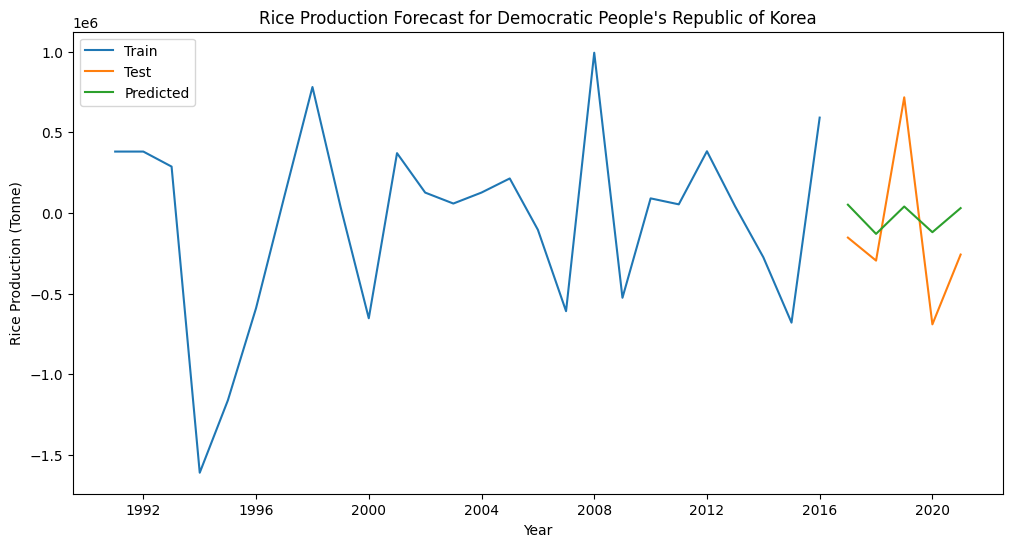

Processing country: Hong Kong
Test Values: [0.01 0.   0.   0.   0.  ]
Predictions: [0.00069508 0.00102751 0.00154915 0.00197207 0.0024465 ]


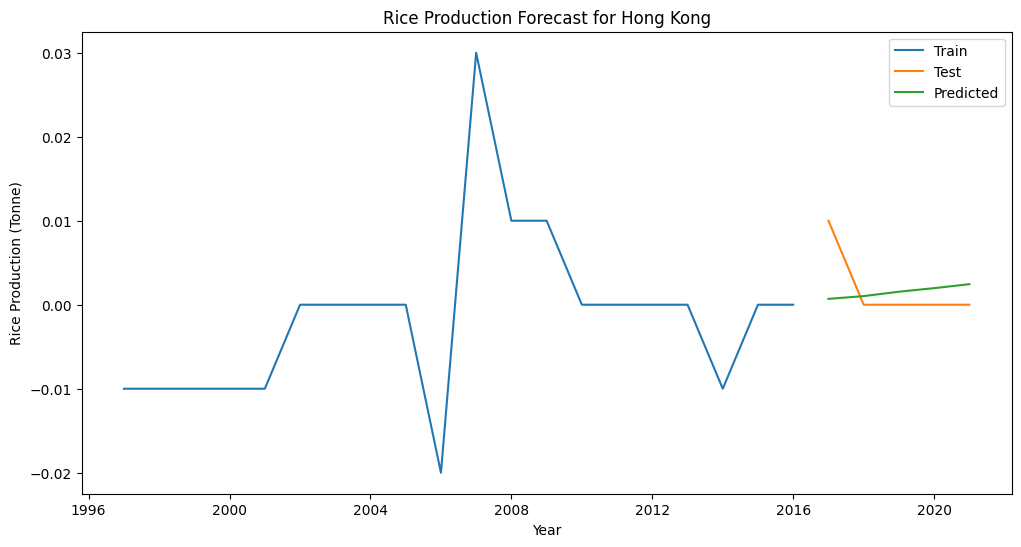

Processing country: India
Test Values: [5436415. 5580315. 3588750. 8194520. 8925000.]
Predictions: [7160000. 7160000. 7160000. 7160000. 7160000.]


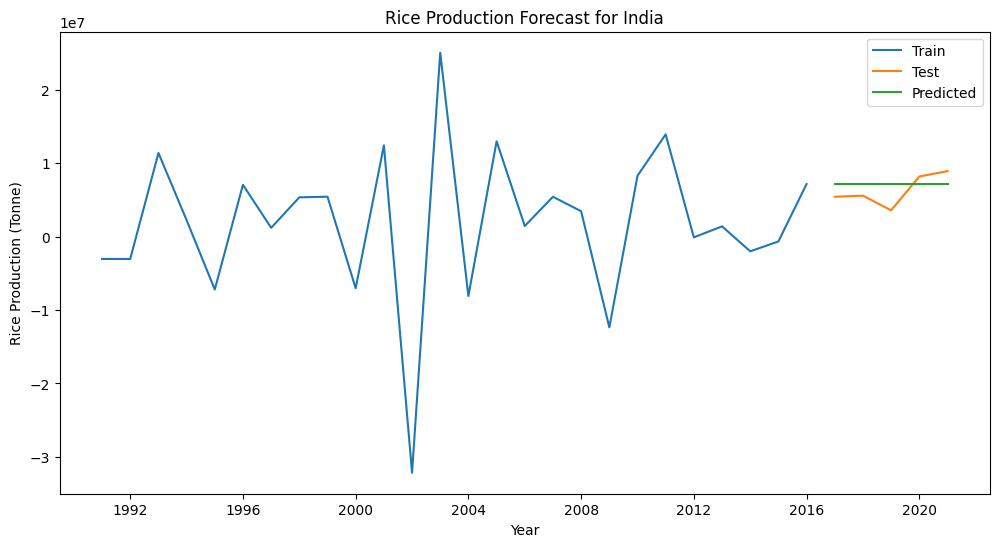

Processing country: Indonesia
Test Values: [ 1221000.    3948534.   -4596501.      45169.24  -233908.24]
Predictions: [ -356605.27006579  1231029.16977078 -2234198.50429634 -1709441.31395242
  -378019.3196449 ]


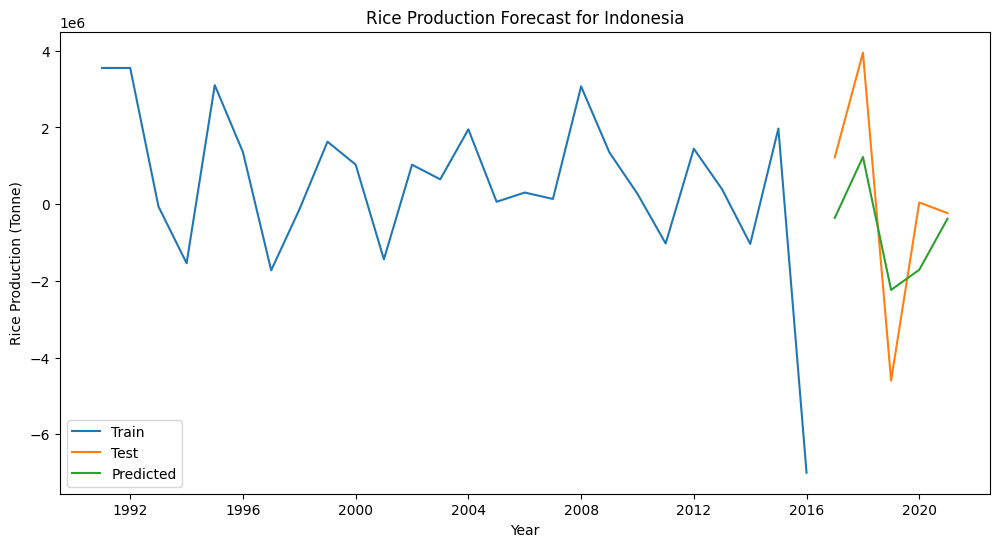

Processing country: Iran
Test Values: [1956281.   2106598.47 2486418.61 1820368.22 1595344.62]
Predictions: [2425547.24230769 2425547.24230769 2425547.24230769 2425547.24230769
 2425547.24230769]


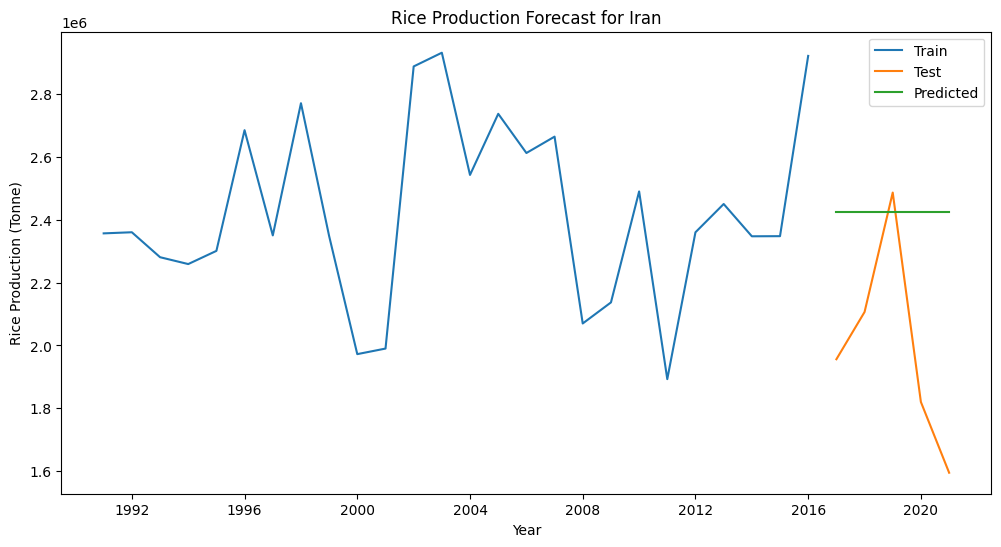

Processing country: Iraq
Test Values: [265852.  18196. 574705. 464159. 422463.]
Predictions: [253431. 325542. 397653. 469764. 541875.]


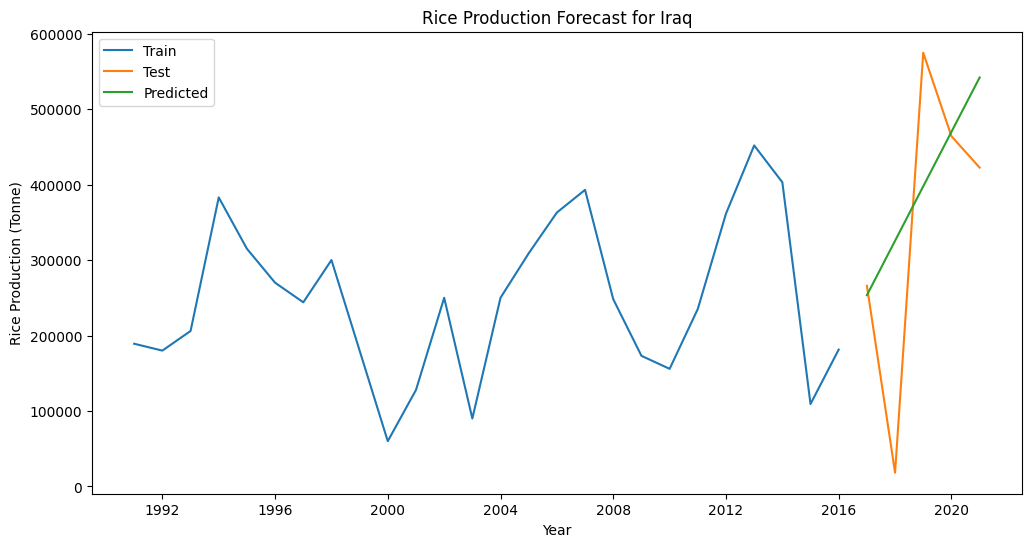

Processing country: Japan
Test Values: [10777000. 10606000. 10540100. 10469000. 10525400.]
Predictions: [10915663.28635047 10741028.06394922 10677005.90535797 10631178.09531523
 10513466.00154665]


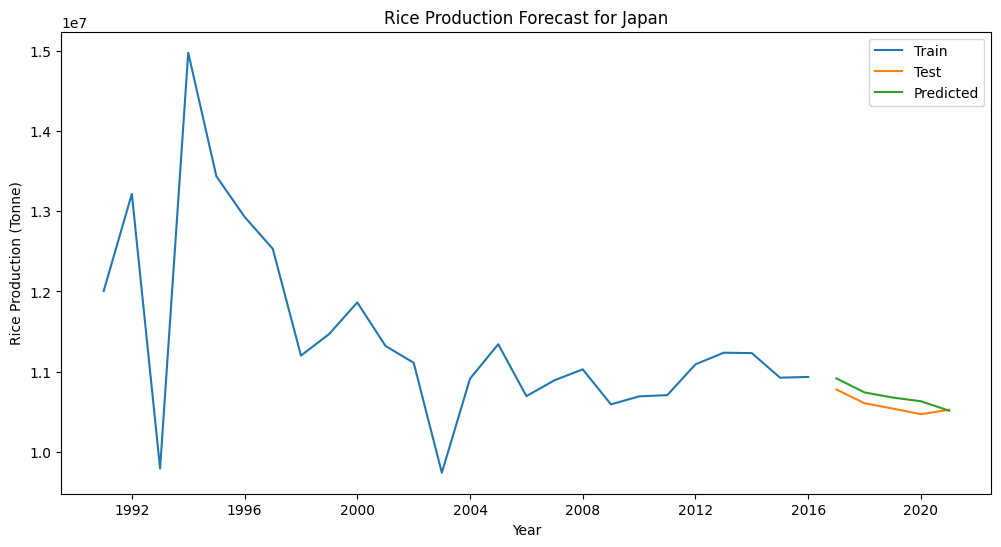

Processing country: Kazakhstan
Test Values: [ 41655.    -6540.    77722.72  -3892.95 -53003.47]
Predictions: [ 19918.83665571   8206.09928756   -892.38917374 -11124.904583
 -20865.49394982]


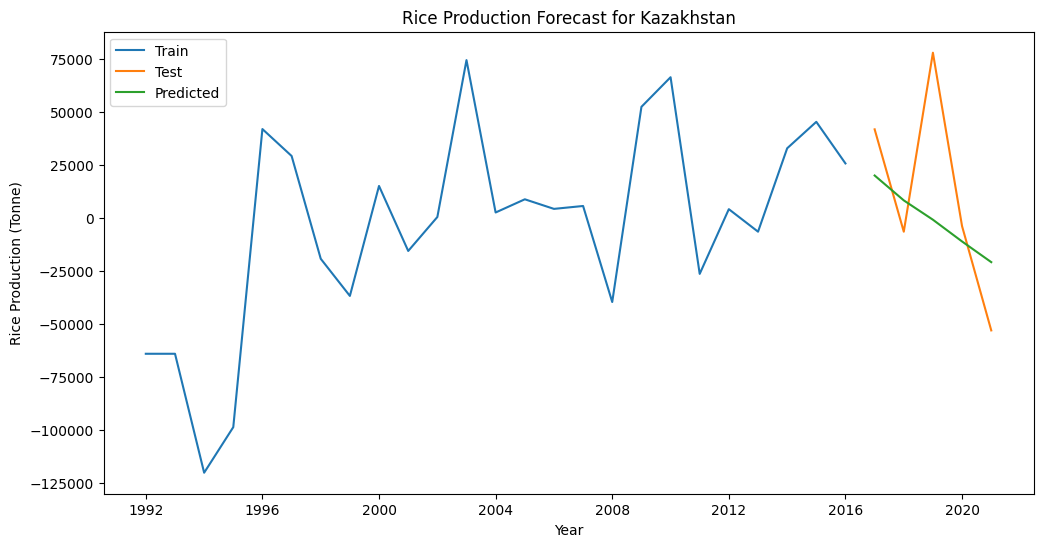

Processing country: Kyrgyzstan
Test Values: [3332.9 2603.4  436.1 3254.5 1864.4]
Predictions: [1177.82966533 2357.91373785 1956.40294301 1703.18792018 1543.49645332]


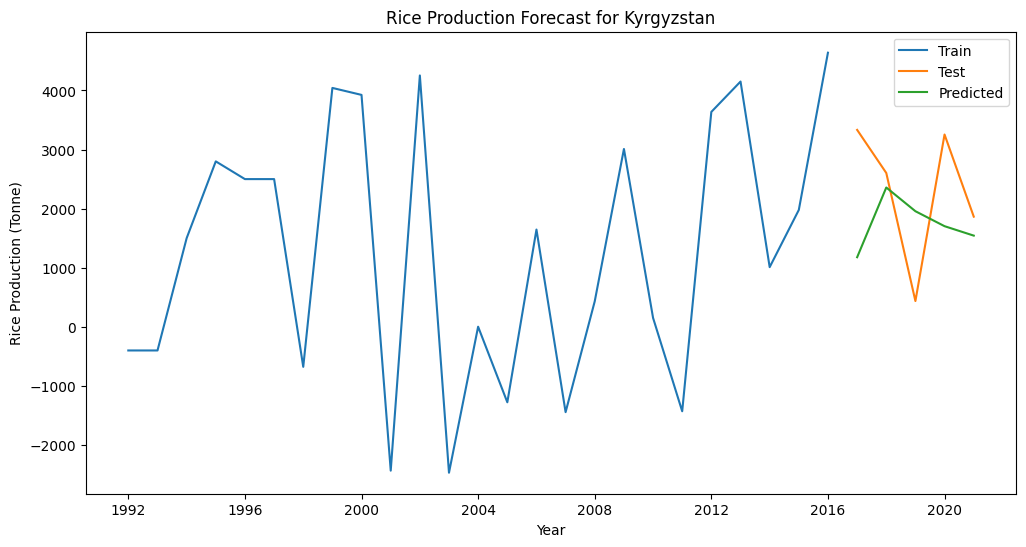

Processing country: Lao People's Democratic Rep.
Test Values: [-109021. -455079.  -50200.  -15400.  350900.]
Predictions: [46584.28925543 46368.57851085 46152.86776628 45937.1570217
 45721.44627713]


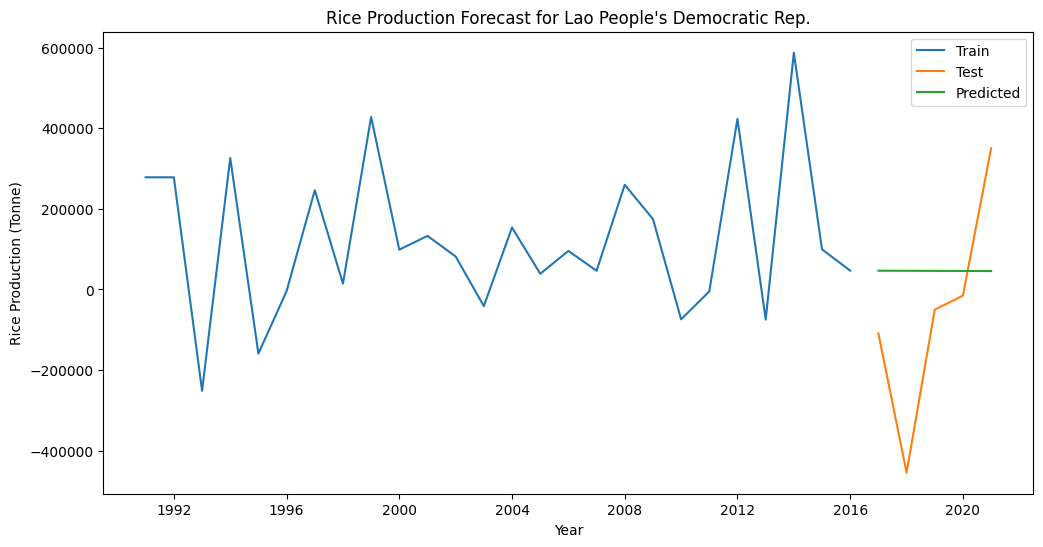

Processing country: Malaysia
Test Values: [-169093.    68689.  -286332.     3521.9   61756.1]
Predictions: [-125632.06743315   28303.15831495   28303.15831495   28303.15831495
   28303.15831495]


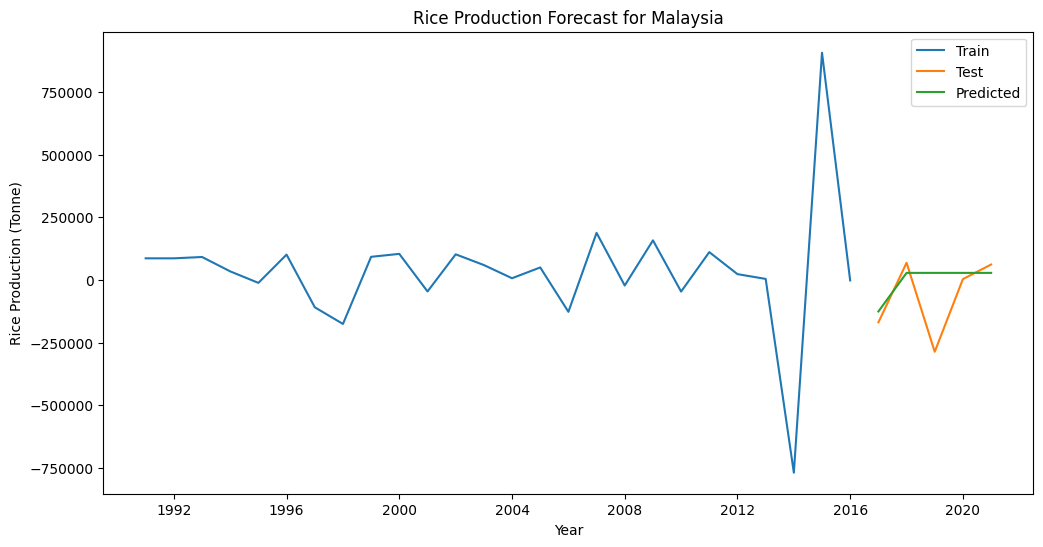

Processing country: Myanmar
Test Values: [  873553.88  1027203.25 -1303775.13  -287118.   -1072696.  ]
Predictions: [-366547.49438721 -213270.35294638 -213270.35294638 -213270.35294638
 -213270.35294638]


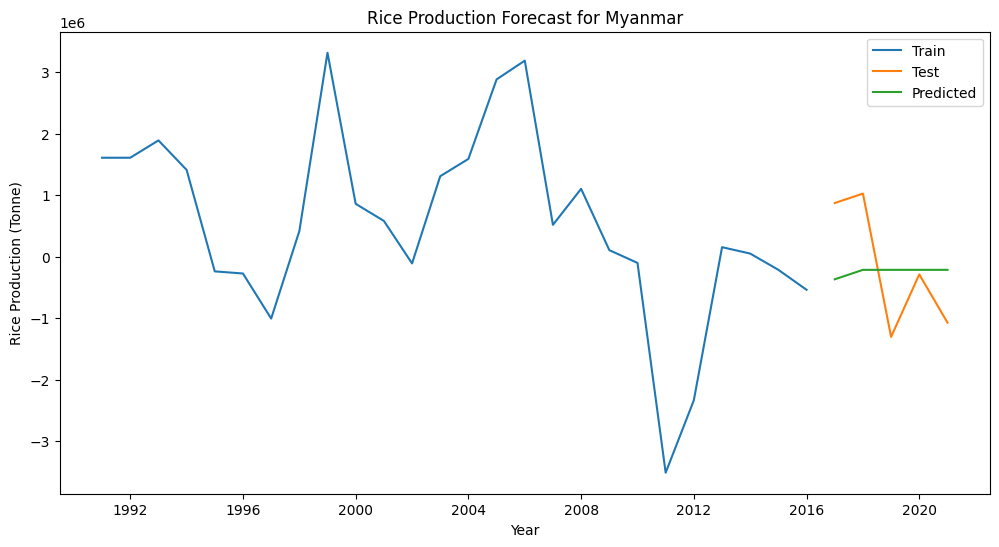

Processing country: Nepal
Test Values: [5230327. 5151925. 5610011. 5550878. 5621710.]
Predictions: [4572456.76276786 4453847.71692445 4468188.18406589 4438918.23500011
 4425359.6263485 ]


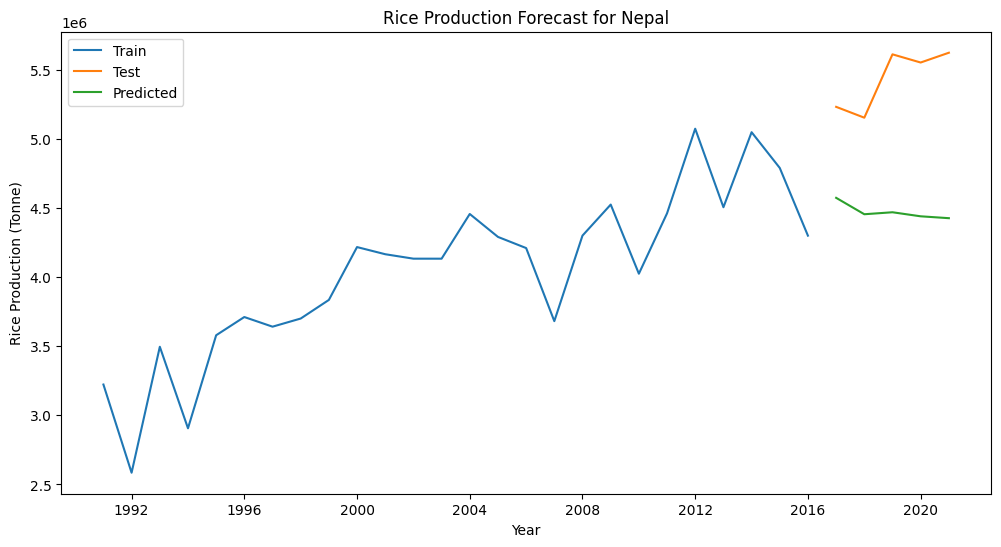

Processing country: Pakistan
Test Values: [  900847.5 -3972849.5  3918517.   1509031.   1354495. ]
Predictions: [ 446616.  821104. 1195592. 1570080. 1944568.]


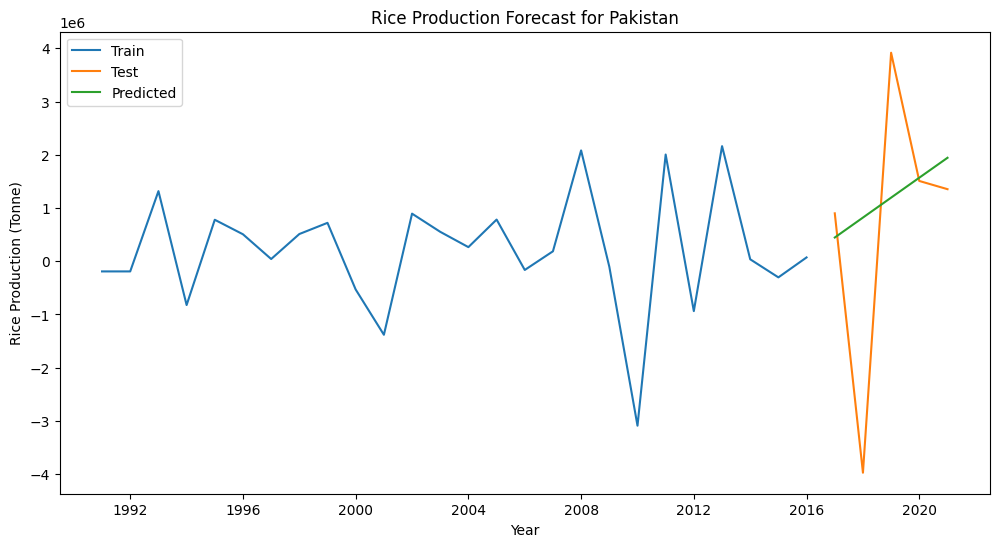

Processing country: Philippines
Test Values: [1649101.63 -210252.69 -251266.65  480028.22  665314.68]
Predictions: [911683.43411981 284986.96154134 284986.96154134 284986.96154134
 284986.96154134]


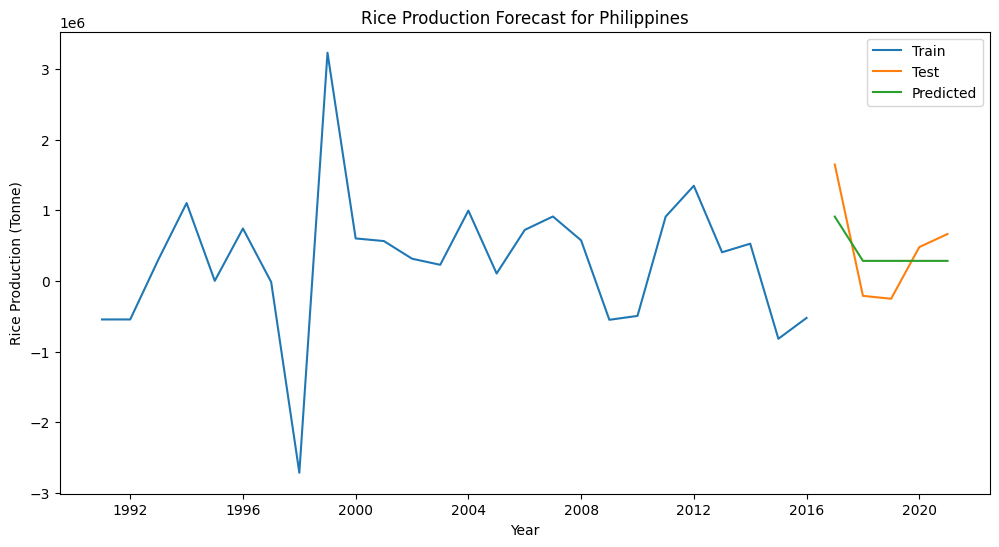

Processing country: Republic of Korea
Test Values: [-339056.  -90114. -179354. -302921.  497875.]
Predictions: [-121761.3220792   -65521.80769162  -65521.80769162  -65521.80769162
  -65521.80769162]


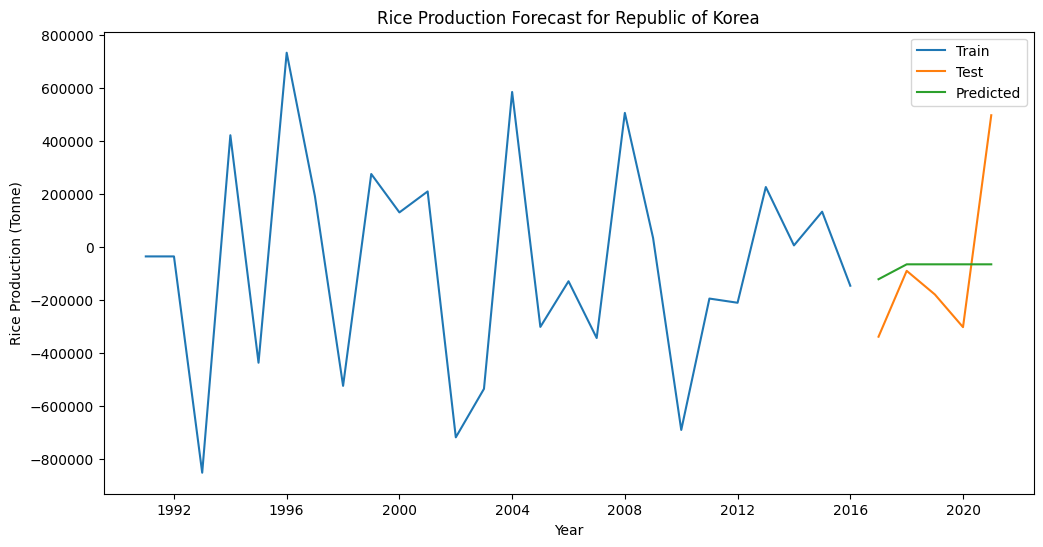

Processing country: Sri Lanka
Test Values: [-2036932.  1546678.   662225.   528868.    28672.]
Predictions: [ -97042.99558355  451511.88311216 -194085.97402041  157887.21697713
  122360.50510292]


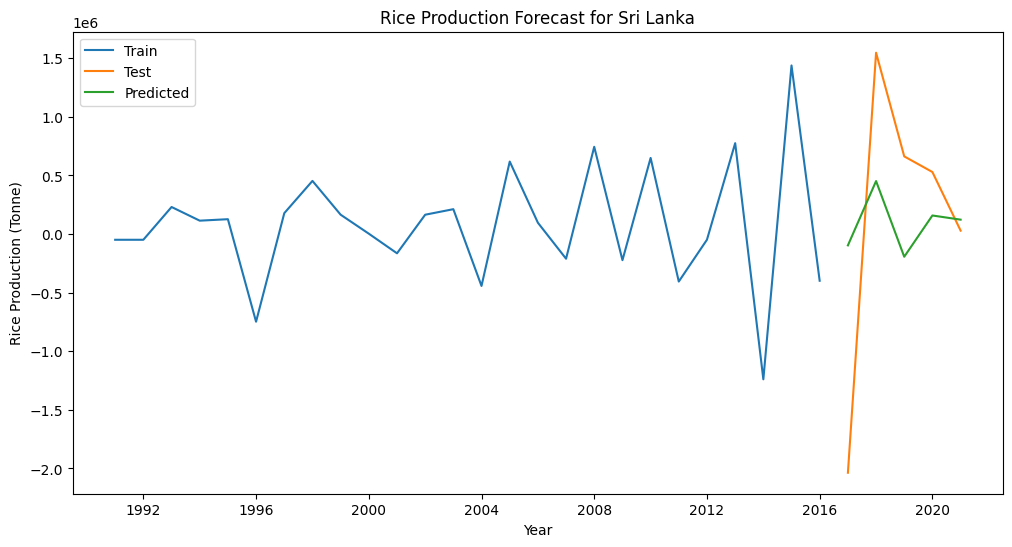

Processing country: Taiwan Province of China
Test Values: [ 166273.  195747. -158585.  -40482. -189859.]
Predictions: [-15499.628564     3861.28255927 -94251.80417798 -23712.88068454
   3832.56917273]


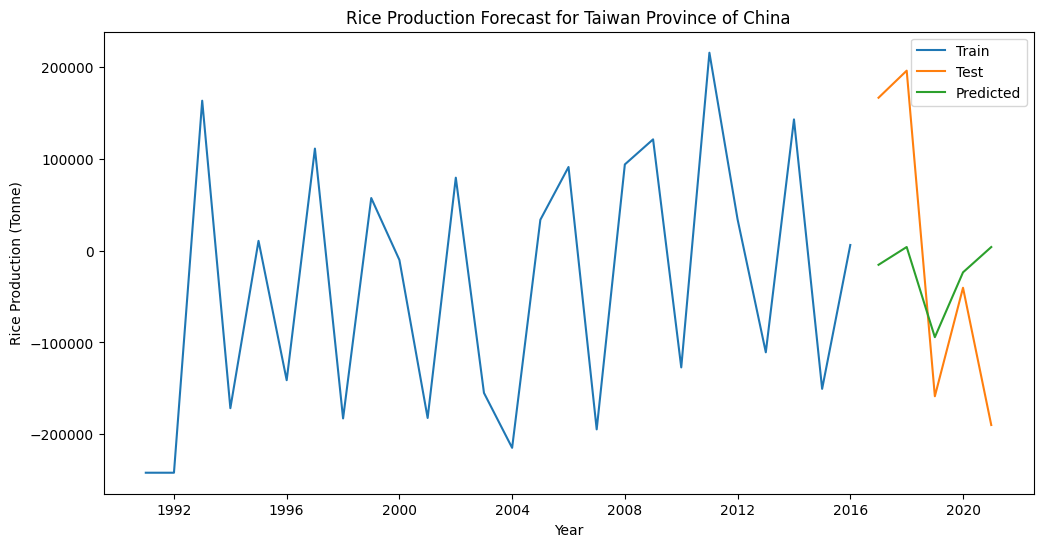

Processing country: Tajikistan
Test Values: [ 97763.   90446.  106441.7  99000.   67000. ]
Predictions: [88426.85352713 89661.79058659 87196.71128329 84907.27047282
 82780.9537991 ]


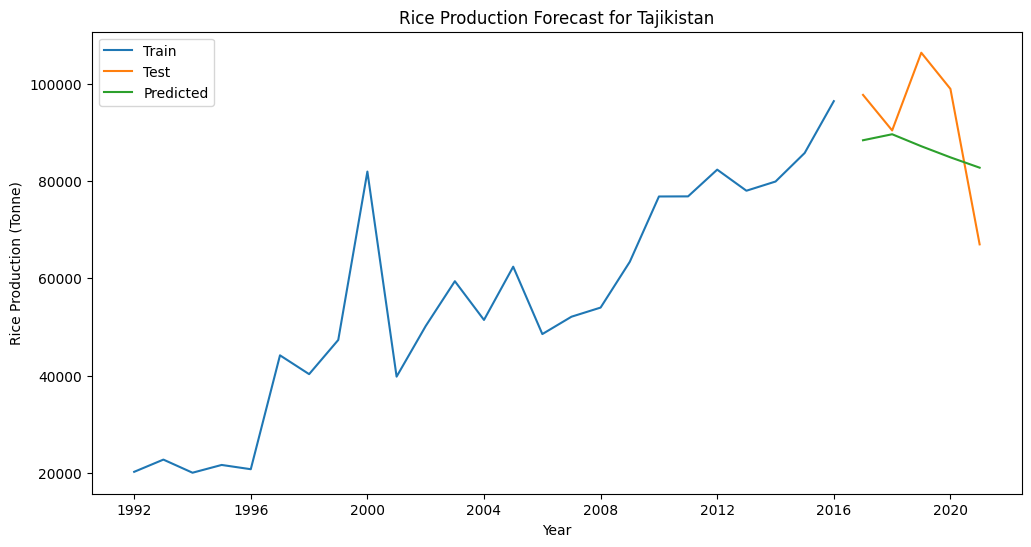

Processing country: Thailand
Test Values: [ 1041903.  -550789. -3730166.  1613077.  3350975.]
Predictions: [1042112.03329575  244588.43367945  370377.41696223  428767.57259296
  425757.36942832]


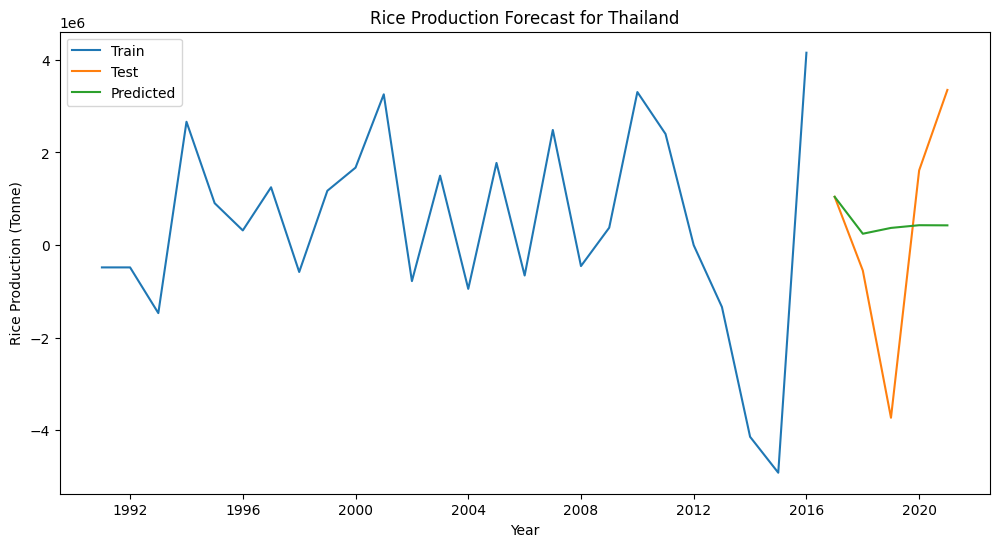

Processing country: Timor-Leste
Test Values: [ 2114.64 -5114.64 -9178.    2161.   -4528.  ]
Predictions: [ -149.44553161 -5984.75231664 -3903.53098567   288.6880008
  1407.57741562]


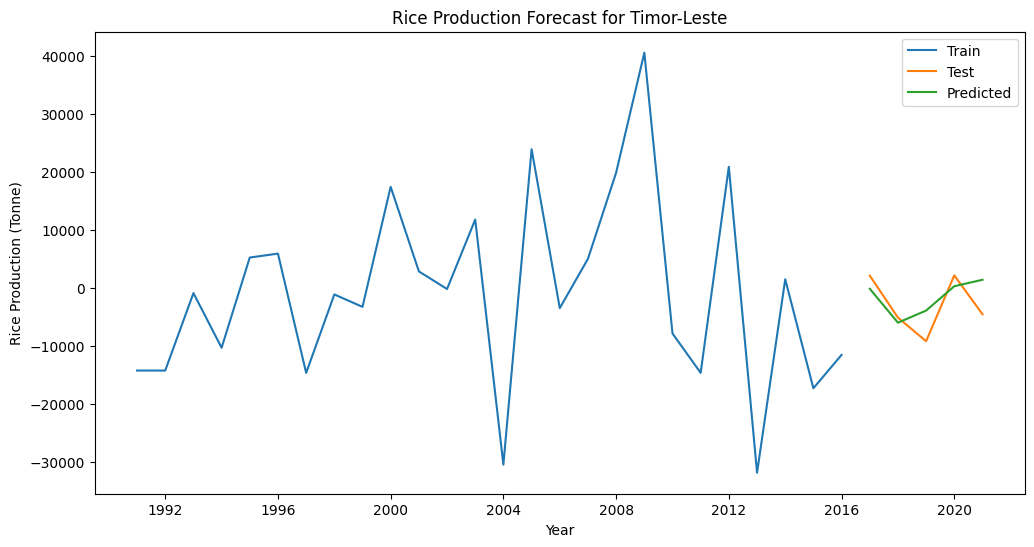

Processing country: Turkiye
Test Values: [-20000.  40000.  60000. -20000.  20000.]
Predictions: [25507.11184983 23027.77946767 23027.77946767 23027.77946767
 23027.77946767]


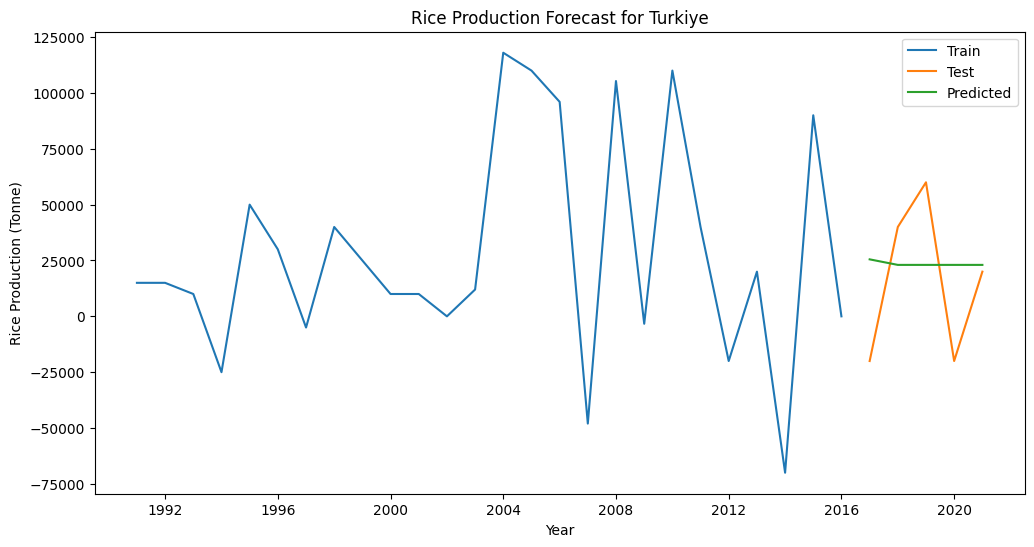

Processing country: Turkmenistan
Test Values: [     0.        0.   -44930.3    1164.4   -3406.12]
Predictions: [ -947.59130827 -1540.51305855 -2084.08684617 -2732.86398156
 -3342.89955917]


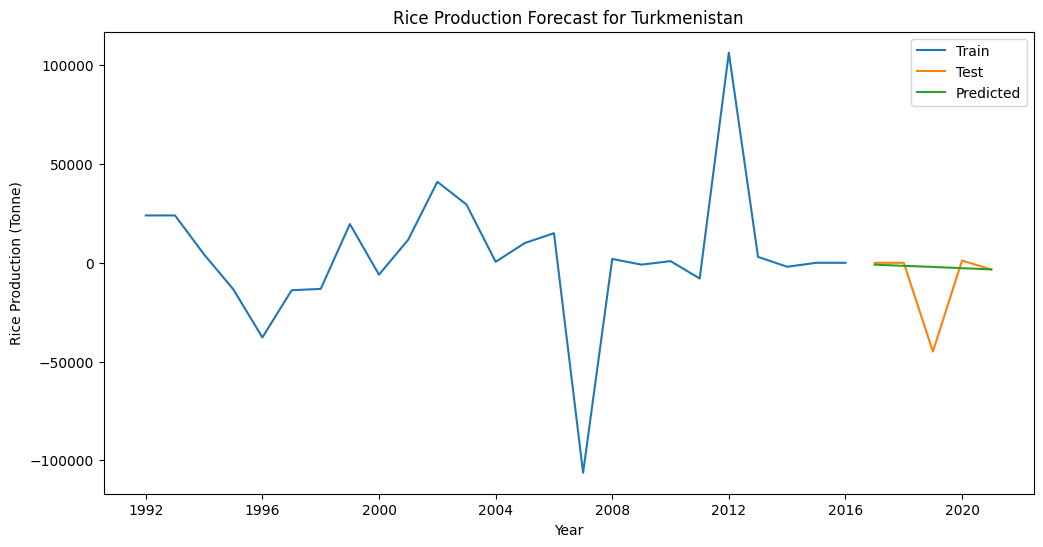

Processing country: Uzbekistan
Test Values: [ -56559. -174333.   93570.  -21208.   40775.]
Predictions: [-34101.13811778 -17676.24499741  -5292.76000211  -5292.76000211
  -5292.76000211]


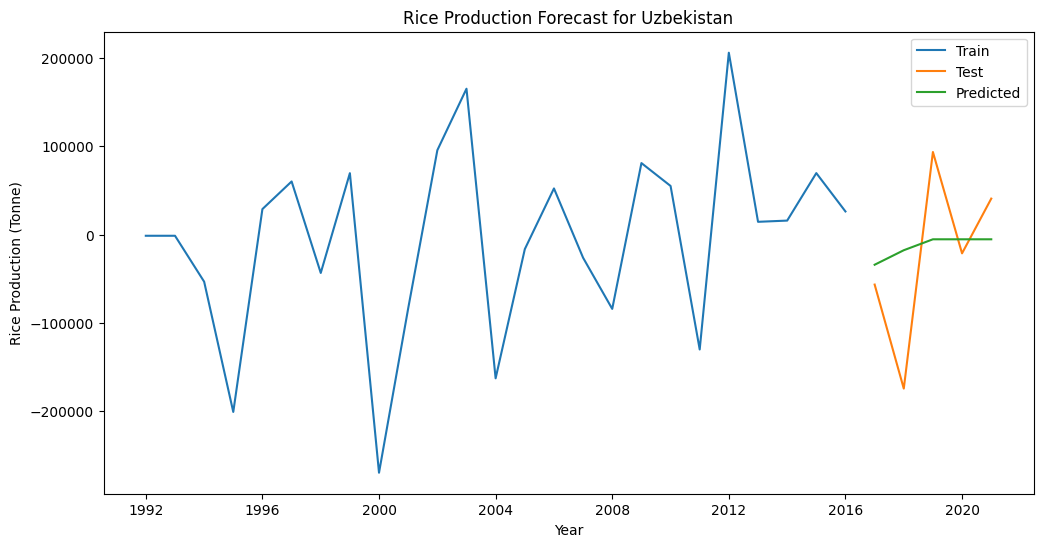

Processing country: Vietnam
Test Values: [-348327.41999999 1282567.18       -550761.98       -730487.83
 1087728.94      ]
Predictions: [487416.76072136 328405.10530182 328405.10530182 328405.10530182
 328405.10530182]


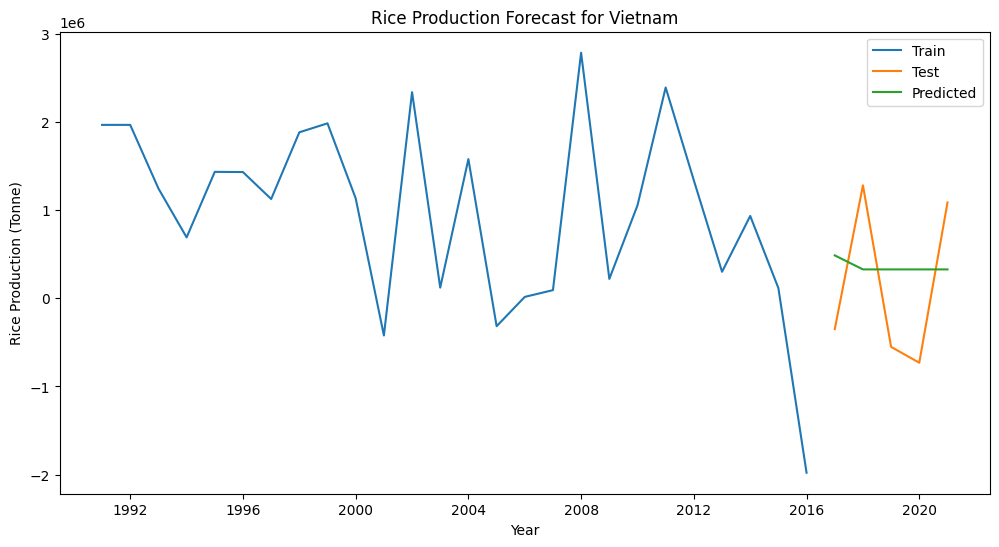

In [ ]:
import warnings
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Initialize a list to store results
best_models = {}

# Define the range of parameter values to search over
p_values = range(0, 3)  # range for p
d_values = range(0, 3)  # range for d
q_values = range(0, 3)  # range for q

# Get the list of countries
countries = df['Country'].unique()

# Loop through each country
for country in countries:
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

    # Ensure the data is sorted by 'Year'
    country_data.sort_index(inplace=True)

    # Check if there is enough data for train-test split
    if len(country_data) > 5:
        train = country_data.iloc[:-5]
        test = country_data.iloc[-5:]

        best_rmse = float('inf')  # Initialize the best RMSE to infinity
        best_order = None  # Initialize the best ARIMA order to None

        # Perform grid search over ARIMA parameters
        for p, d, q in product(p_values, d_values, q_values):
            try:
                # Fit the ARIMA model with the current parameters
                model = ARIMA(train['Rice Production(Tonne)'], order=(p, d, q))
                model_fit = model.fit()

                # Make predictions
                predictions = model_fit.forecast(steps=len(test))

                # Calculate RMSE
                rmse = np.sqrt(mean_squared_error(test['Rice Production(Tonne)'], predictions))

                # Update best RMSE and ARIMA parameters if current RMSE is better
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)

            except Exception as e:
                print(f"Error fitting model for {country} with order {(p, d, q)}: {e}")
                continue  # Skip if model fitting fails

        # Fit the best ARIMA model found during grid search
        try:
            best_model = ARIMA(train['Rice Production(Tonne)'], order=best_order)
            best_model_fit = best_model.fit()

            # Make predictions
            predictions = best_model_fit.forecast(steps=len(test))

            # Align predictions with test index
            predictions = pd.Series(predictions, index=test.index)

            # Print predictions and actual values for debugging
            print(f"Test Values: {test['Rice Production(Tonne)'].values}")
            print(f"Predictions: {predictions.values}")

            # Plot the results
            plt.figure(figsize=(12, 6))
            plt.plot(train.index, train['Rice Production(Tonne)'], label='Train')
            plt.plot(test.index, test['Rice Production(Tonne)'], label='Test')
            plt.plot(test.index, predictions, label='Predicted')
            plt.xlabel('Year')
            plt.ylabel('Rice Production (Tonne)')
            plt.title(f'Rice Production Forecast for {country}')
            plt.legend()
            plt.show()

            # Store the best model and RMSE
            best_models[country] = (best_model_fit, best_rmse)

        except Exception as e:
            print(f"An error occurred for {country}: {e}")

    else:
        print(f"Not enough data for {country} to perform train-test split.")




In [ ]:
# Initialize lists to store parameter values and RMSE
countries_list = []
p_list = []
d_list = []
q_list = []
rmse_list = []

# Extract the information from best_models dictionary
for country, (model, rmse) in best_models.items():
    p = len(model.arparams) - 1
    d = model.model.order[1]
    q = len(model.maparams) - 1

    countries_list.append(country)
    p_list.append(p)
    d_list.append(d)
    q_list.append(q)
    rmse_list.append(rmse)

# Create a DataFrame
results_df = pd.DataFrame({
    'Country': countries_list,
    'p': p_list,
    'd': d_list,
    'q': q_list,
    'RMSE': rmse_list
})

# Display the DataFrame
print("Best ARIMA Parameters and RMSE for Each Country:")
print(results_df)



Best ARIMA Parameters and RMSE for Each Country:
                                  Country  p  d  q          RMSE
0                             Afghanistan -1  0  0  3.174692e+04
1                              Azerbaijan  1  0  1  4.396287e+03
2                              Bangladesh -1  0 -1  1.441319e+06
3                                  Bhutan -1  2 -1  1.437440e+04
4                       Brunei Darussalam  0  0  0  4.403683e+02
5                                Cambodia -1  2  1  1.957320e+05
6                                   China  0  0  1  1.771009e+06
7   Democratic People's Republic of Korea  0  1  1  4.326212e+05
8                               Hong Kong  0  2  0  4.470157e-03
9                                   India -1  1 -1  2.116858e+06
10                              Indonesia  1  1  0  1.926321e+06
11                                   Iran -1  0 -1  5.255706e+05
12                                   Iraq -1  2 -1  1.674837e+05
13                                  Japan

Processing country: Afghanistan
Processing country: Azerbaijan
Processing country: Bangladesh
Processing country: Bhutan
Processing country: Brunei Darussalam
Processing country: Cambodia
Processing country: China
Processing country: Democratic People's Republic of Korea
Processing country: Hong Kong
Processing country: India
Processing country: Indonesia
Processing country: Iran
Processing country: Iraq
Processing country: Japan
Processing country: Kazakhstan
Processing country: Kyrgyzstan
Processing country: Lao People's Democratic Rep.
Processing country: Malaysia
Processing country: Myanmar
Processing country: Nepal
Processing country: Pakistan
Processing country: Philippines
Processing country: Republic of Korea
Processing country: Sri Lanka
Processing country: Taiwan Province of China
Processing country: Tajikistan
Processing country: Thailand
Processing country: Timor-Leste
Processing country: Turkiye
Processing country: Turkmenistan
Processing country: Uzbekistan
Processing cou

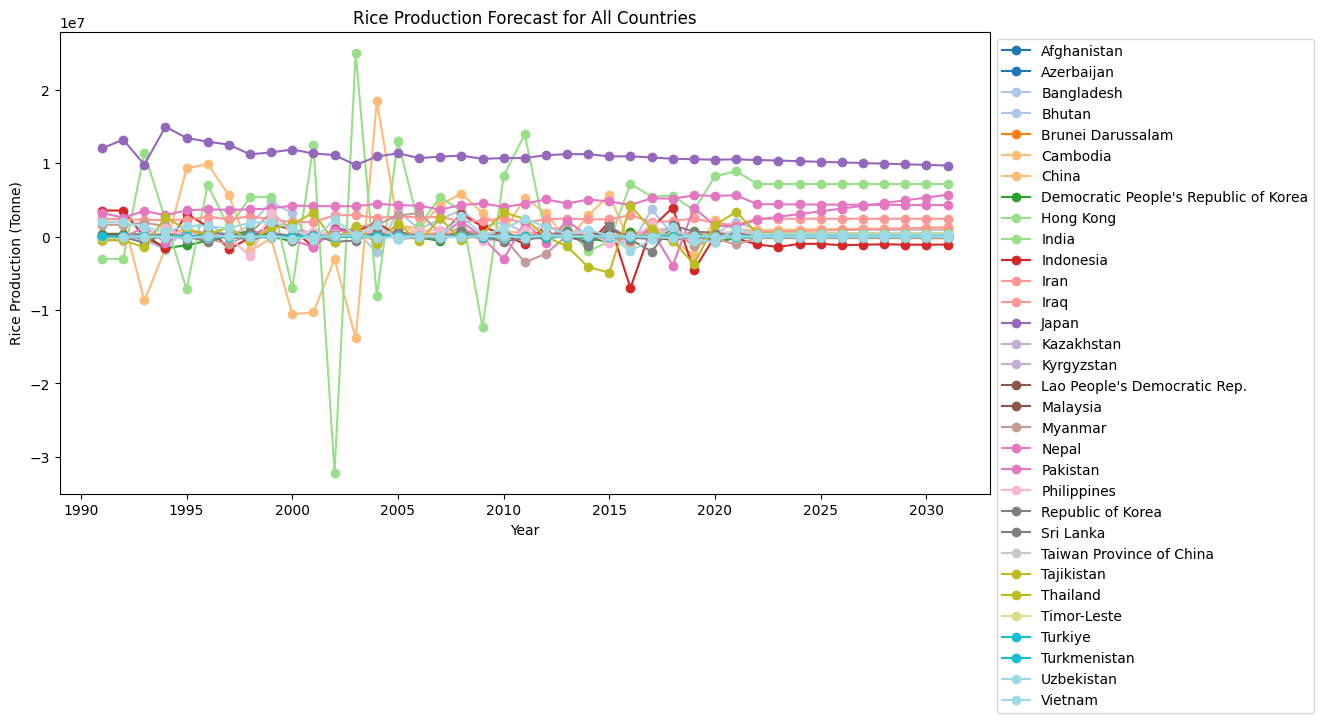

In [ ]:
import matplotlib.cm as cm

# Create a single figure
plt.figure(figsize=(12, 6))

# Generate a colormap with distinct colors for each country
colors = plt.cm.get_cmap('tab20', len(countries))

# Loop through each country
for i, country in enumerate(countries):
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

        if country in best_models:
            model_fit, best_rmse = best_models[country]

            # Make predictions for the next 10 years
            start_year = country_data.index[-1] + pd.DateOffset(years=1)
            end_year = start_year + pd.DateOffset(years=9)
            predictions = model_fit.predict(start=start_year, end=end_year, typ='levels')

            # Create a DataFrame for predictions with the correct years
            prediction_years = pd.date_range(start=start_year, end=end_year, freq='AS-JAN')  # Adjust the frequency as needed
            predictions_df = pd.DataFrame(predictions.values, index=prediction_years, columns=['Rice Production(Tonne)'])

            # Combine the historical data with predictions
            combined_data = pd.concat([country_data, predictions_df])

            # Plot the results with distinct color from the colormap
            plt.plot(combined_data.index, combined_data['Rice Production(Tonne)'], label=f'{country}', color=colors(i), marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Rice Production (Tonne)')
plt.title('Rice Production Forecast for All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



# Exponential Smoothing

Processing country: Afghanistan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

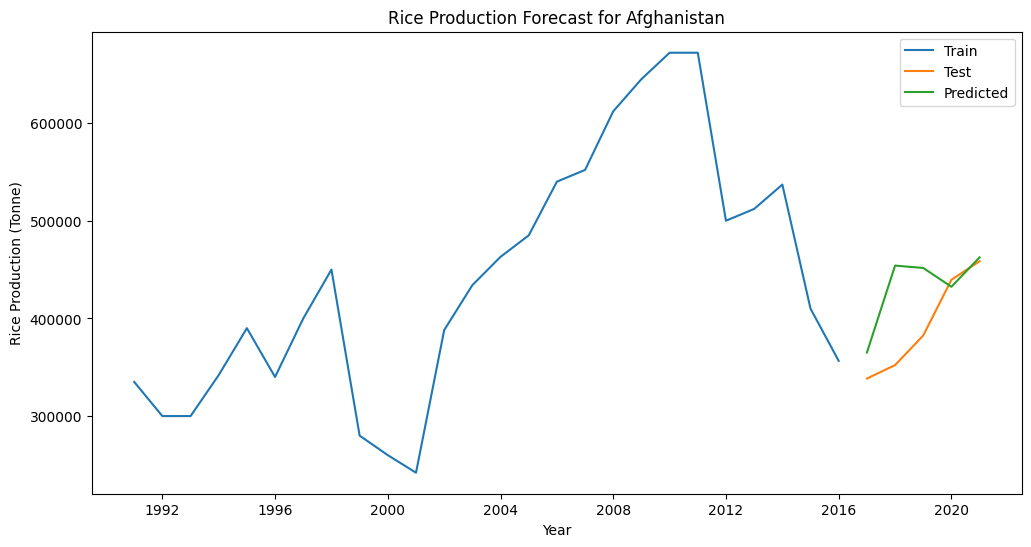

Processing country: Azerbaijan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

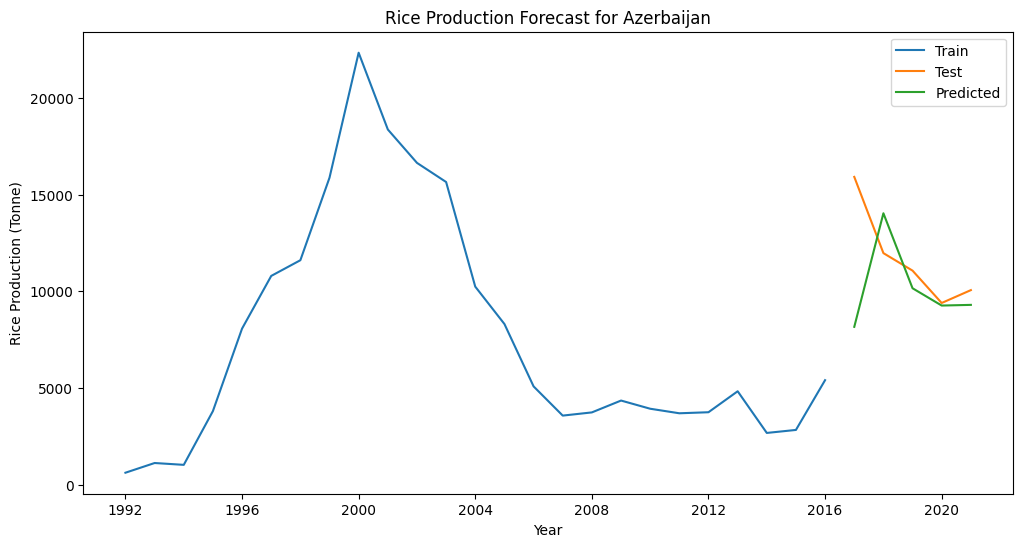

Processing country: Bangladesh


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

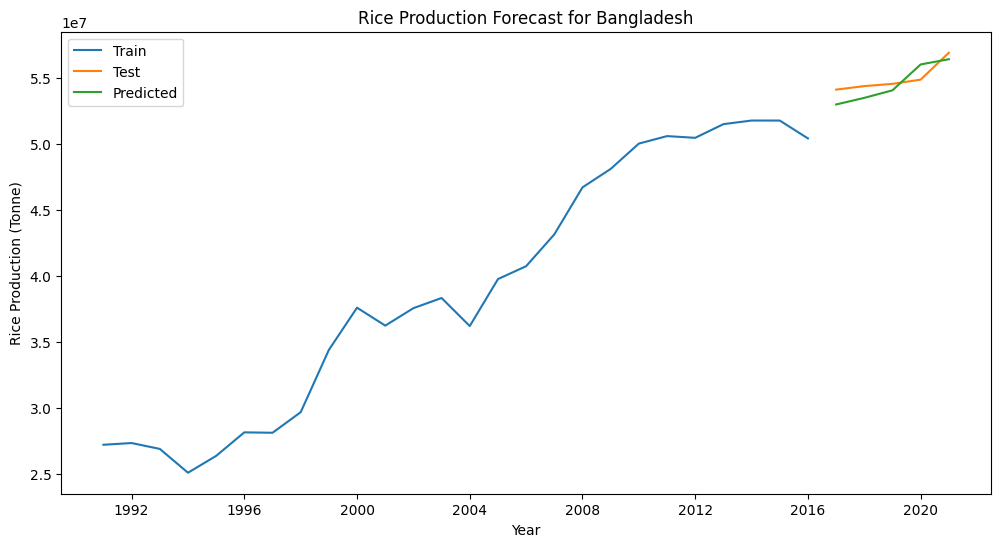

Processing country: Bhutan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

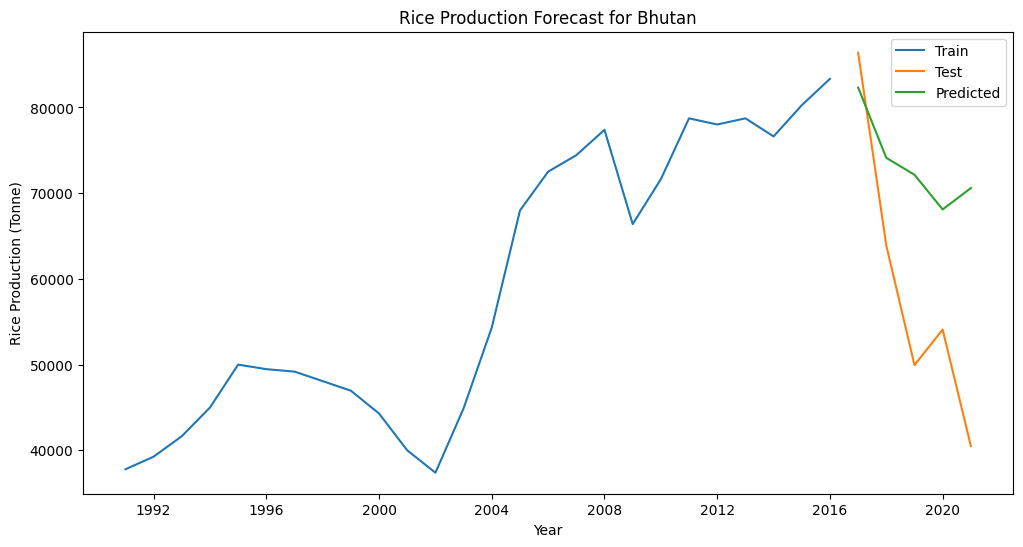

Processing country: Brunei Darussalam


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

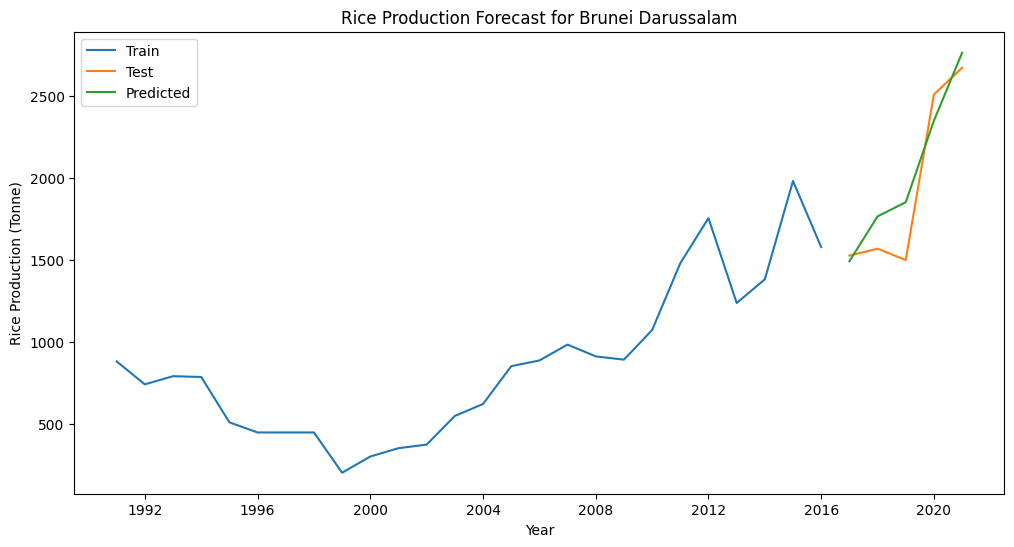

Processing country: Cambodia


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

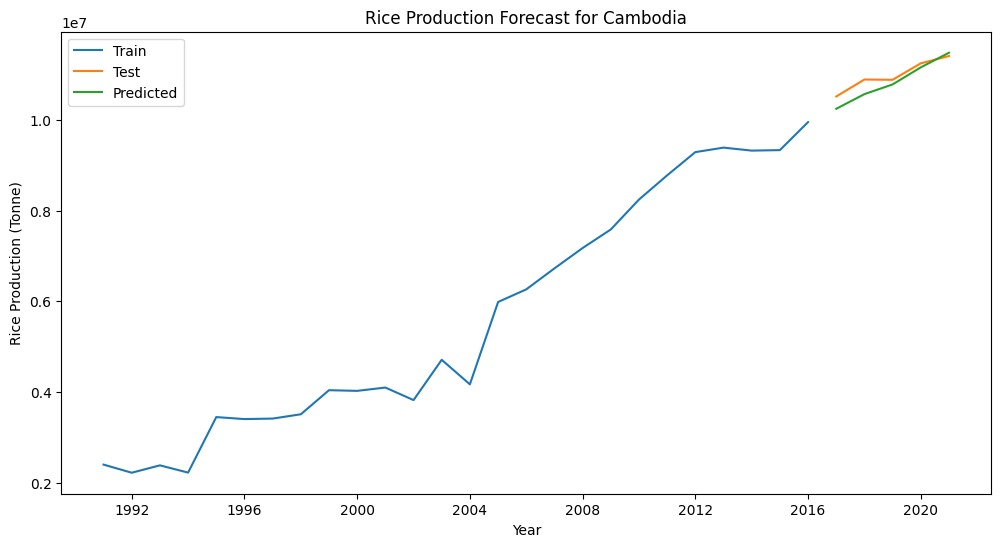

Processing country: China


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

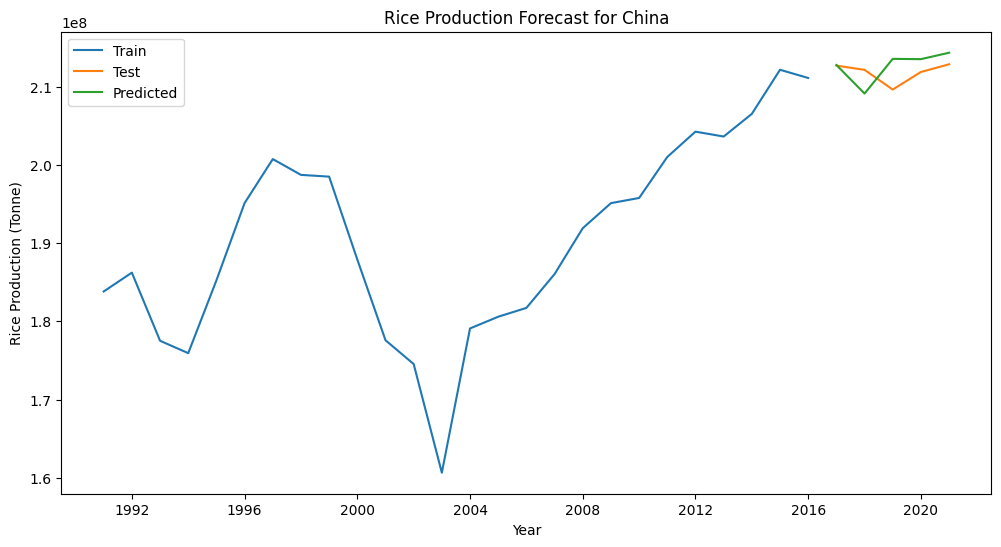

Processing country: Democratic People's Republic of Korea


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

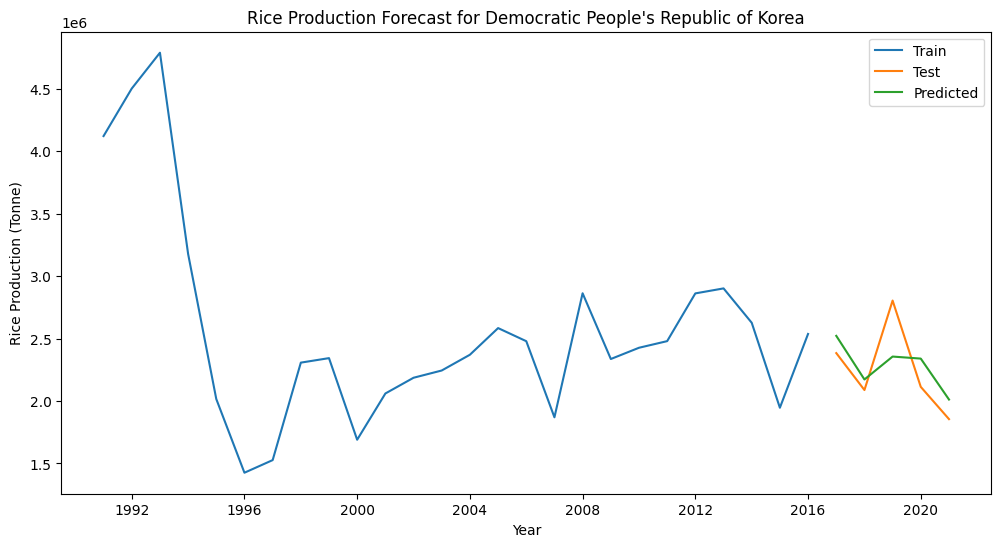

Processing country: Hong Kong


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

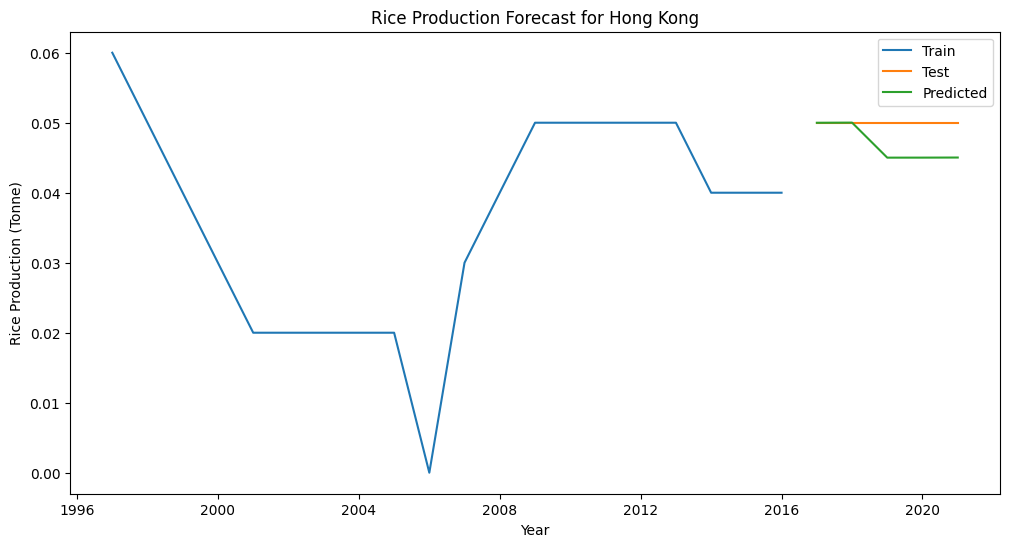

Processing country: India


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

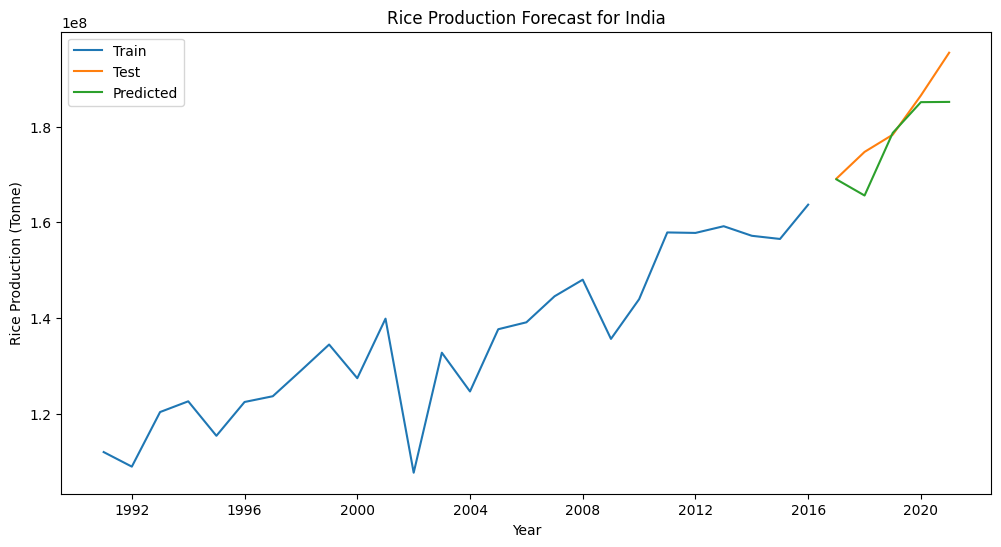

Processing country: Indonesia


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

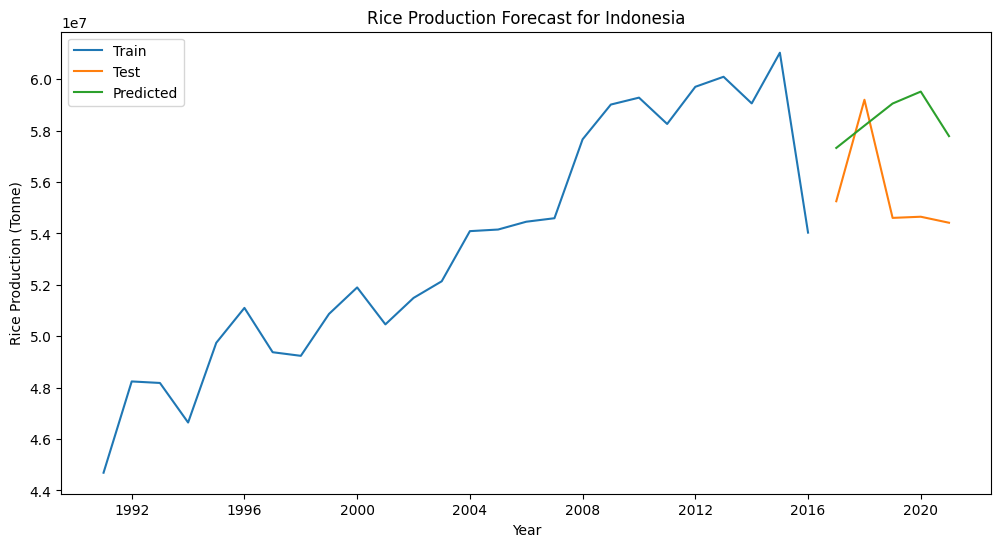

Processing country: Iran


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

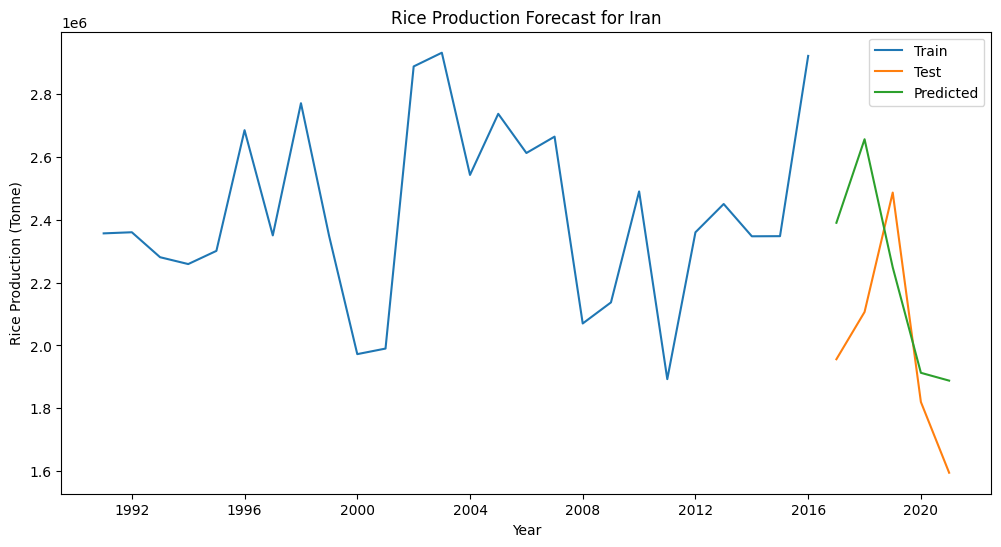

Processing country: Iraq


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

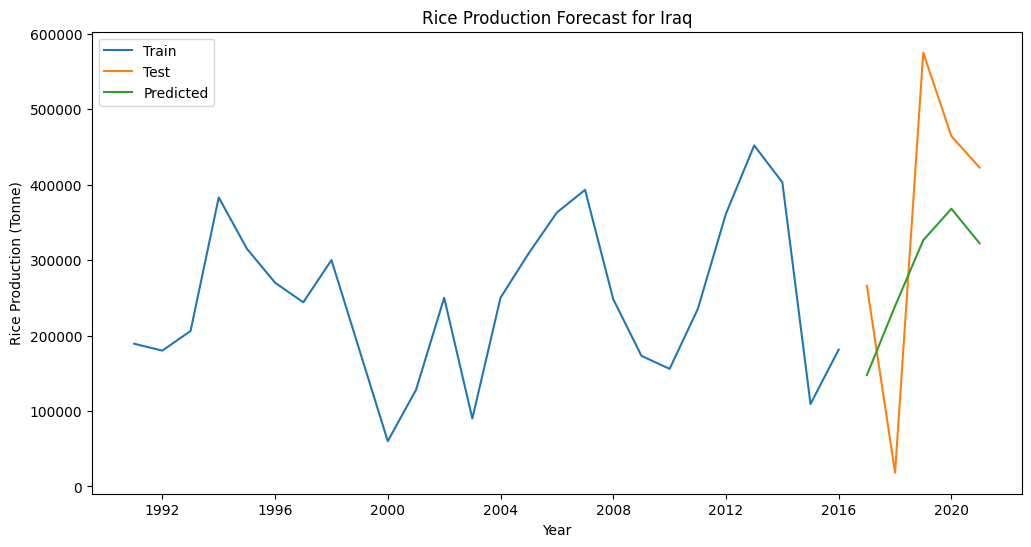

Processing country: Japan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

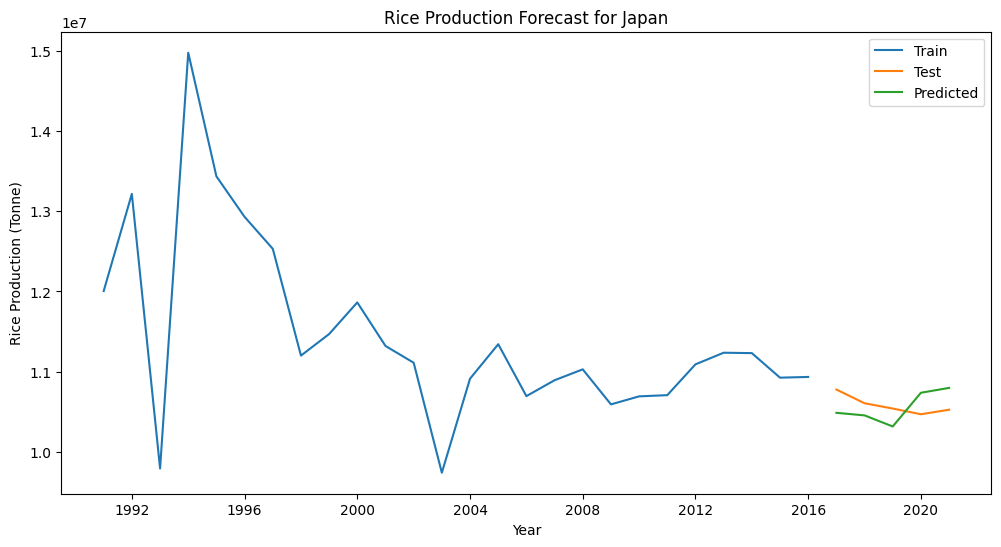

Processing country: Kazakhstan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

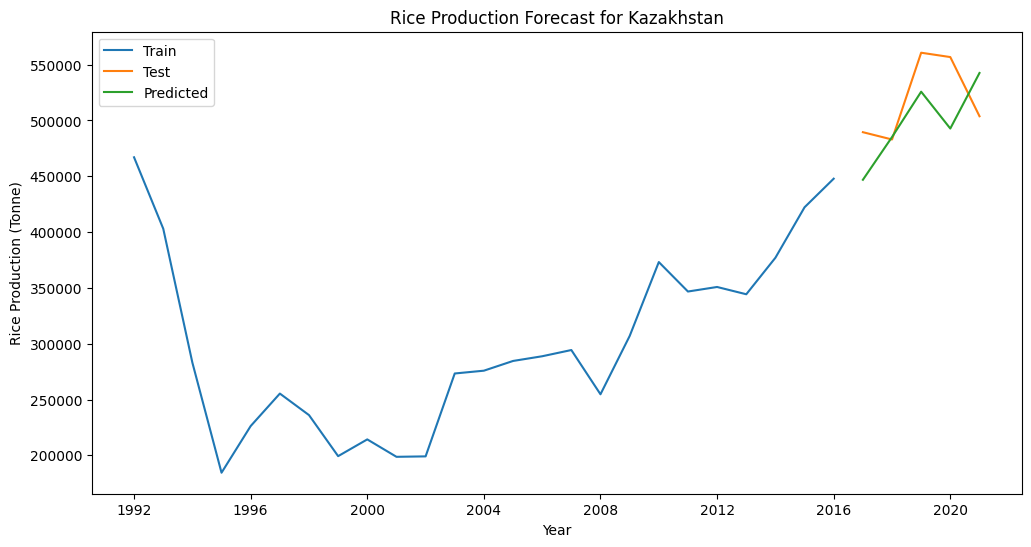

Processing country: Kyrgyzstan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packag

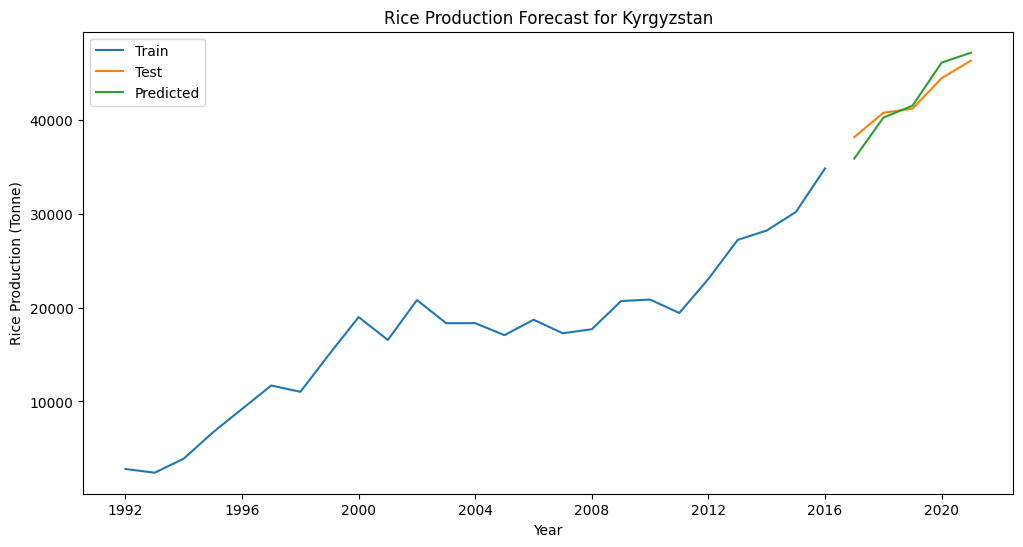

Processing country: Lao People's Democratic Rep.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

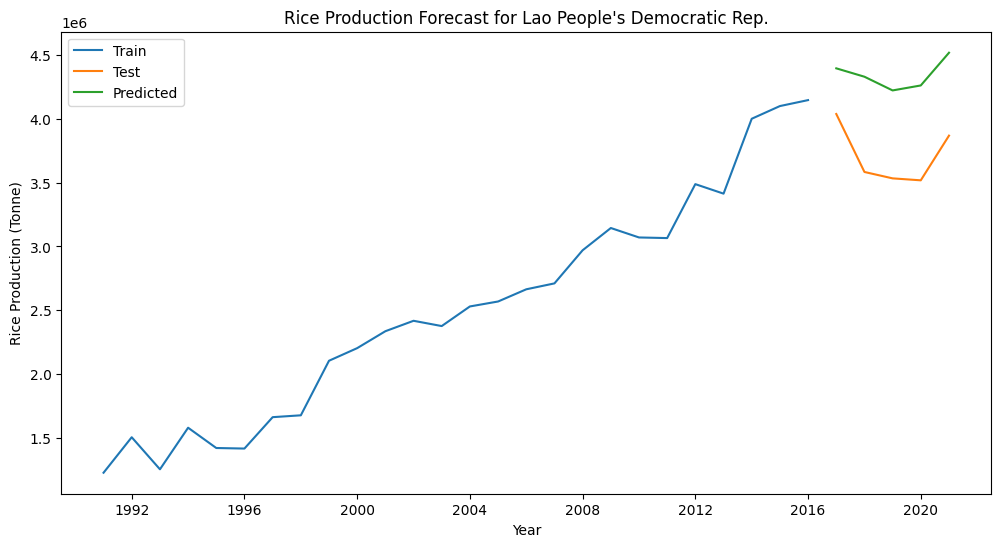

Processing country: Malaysia


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

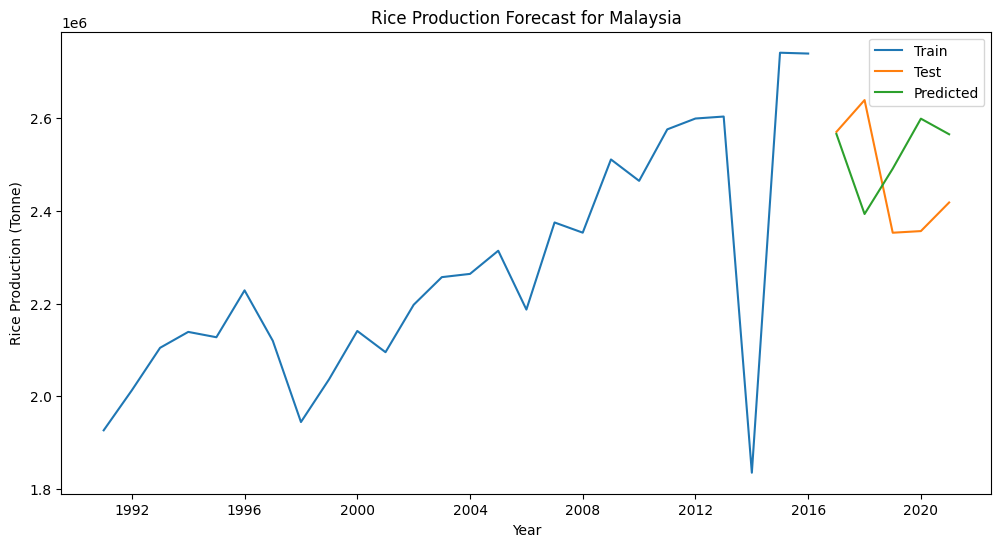

Processing country: Myanmar


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

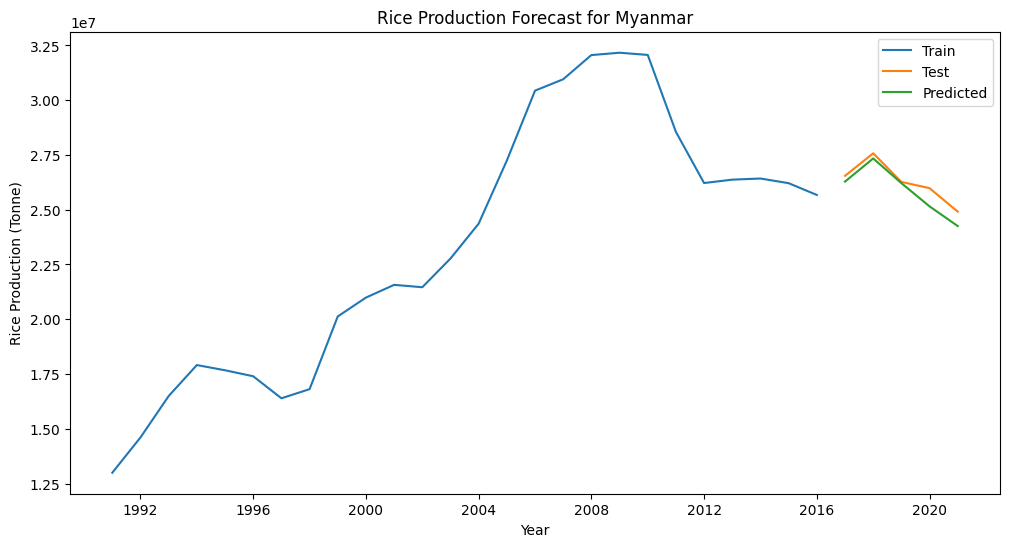

Processing country: Nepal


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

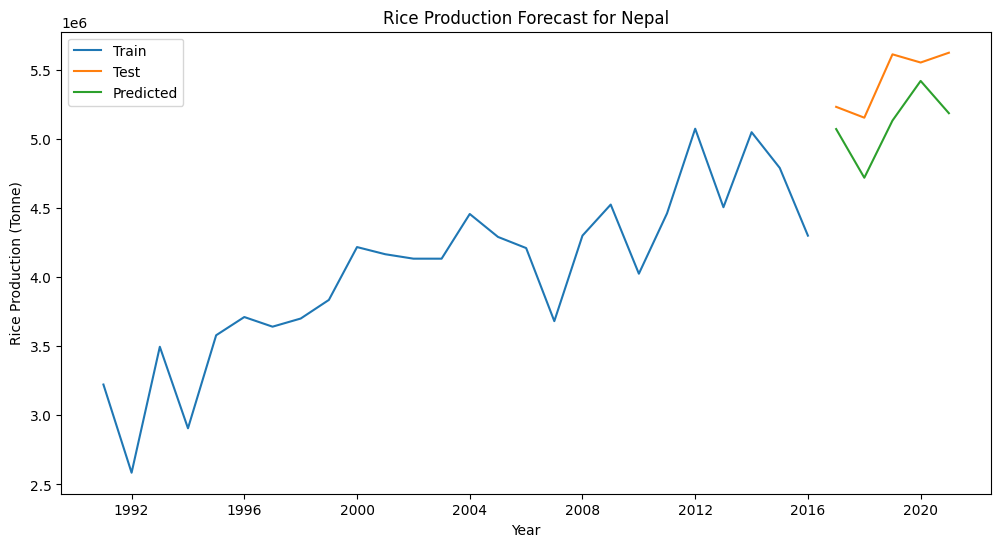

Processing country: Pakistan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

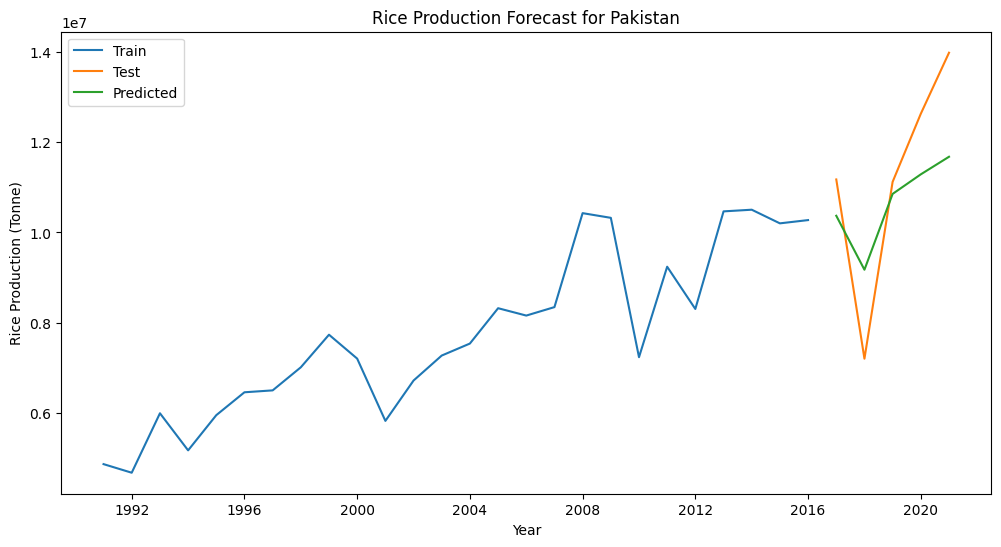

Processing country: Philippines


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

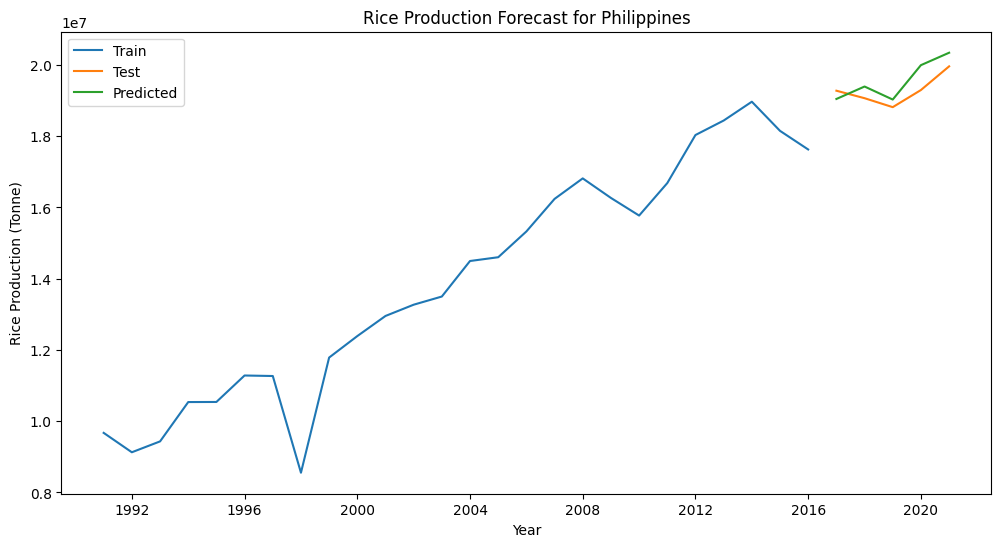

Processing country: Republic of Korea


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

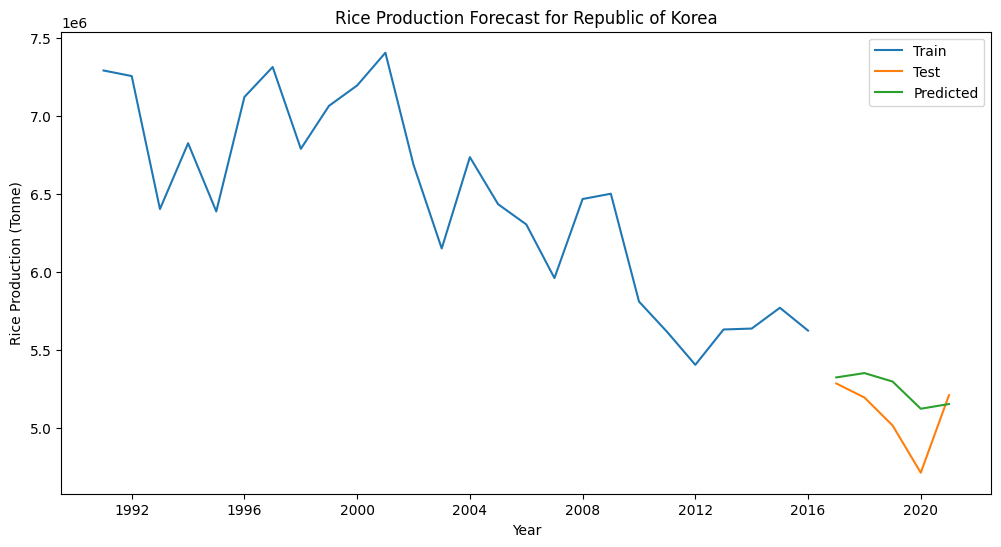

Processing country: Sri Lanka


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

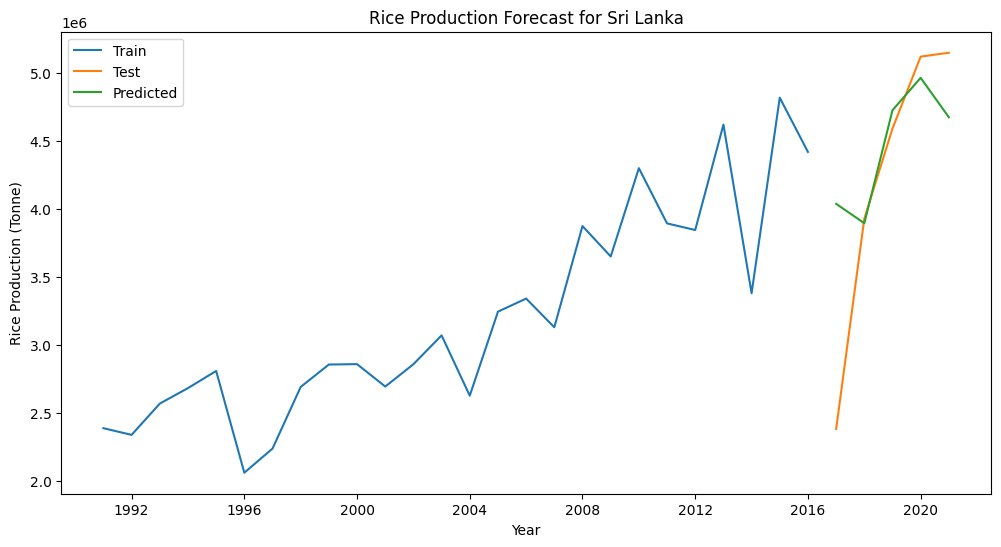

Processing country: Taiwan Province of China


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

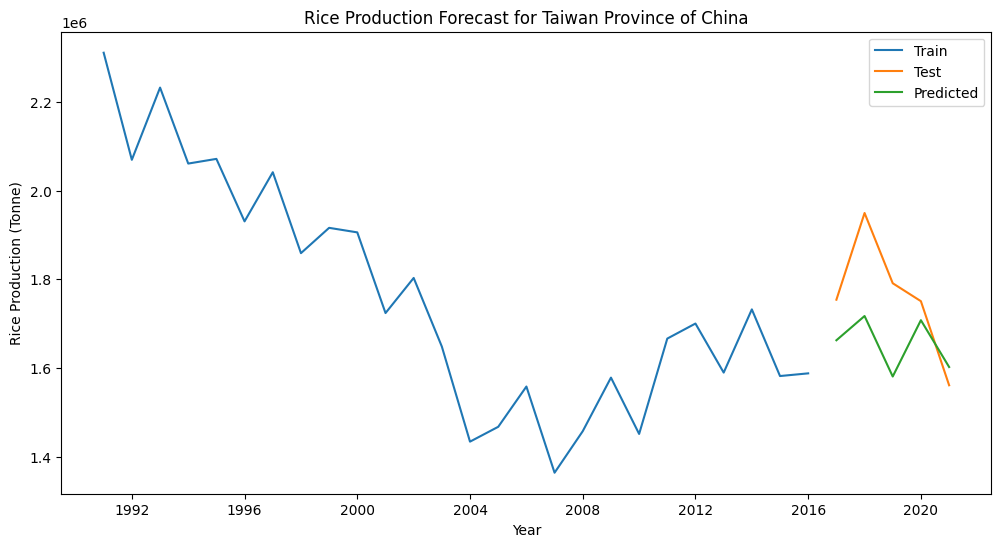

Processing country: Tajikistan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

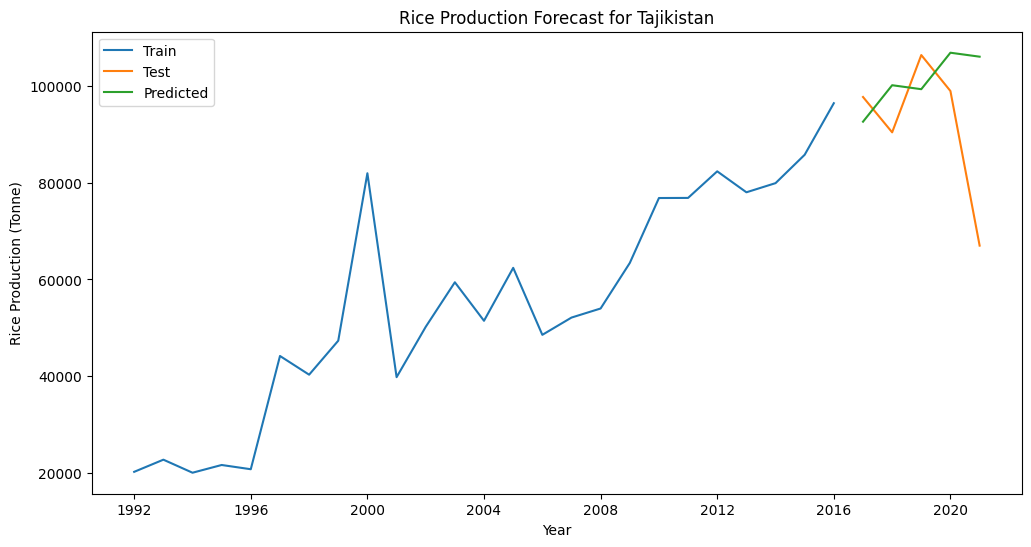

Processing country: Thailand


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

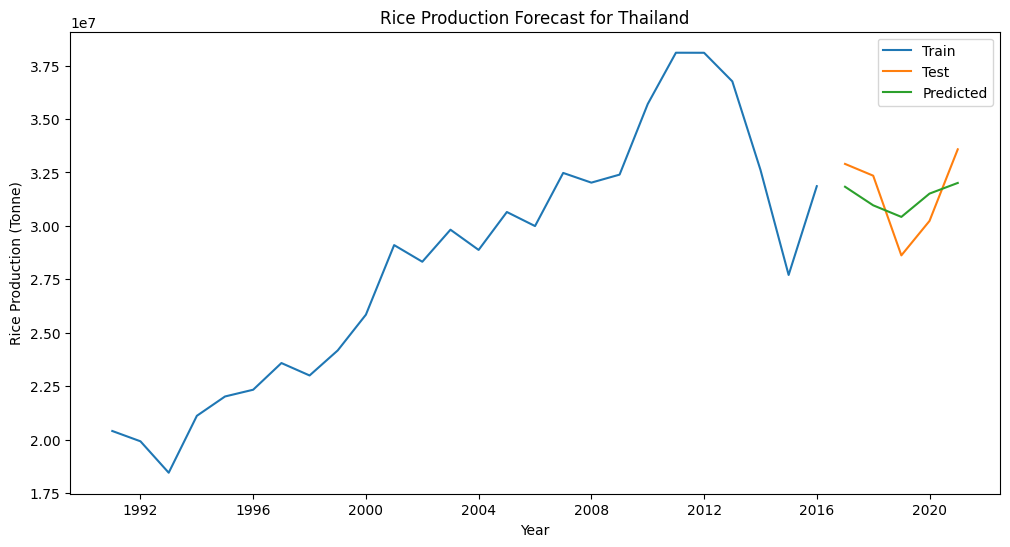

Processing country: Timor-Leste


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

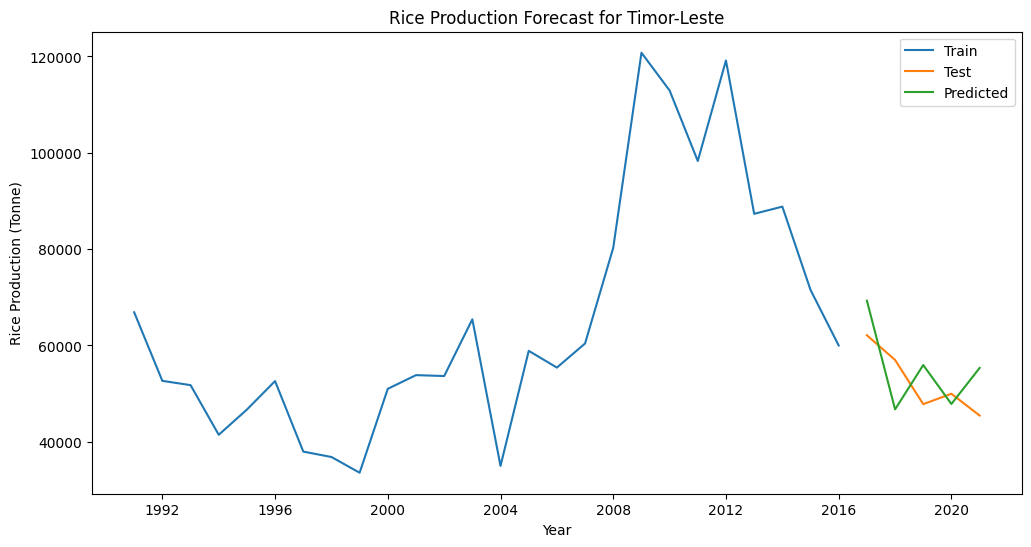

Processing country: Turkiye


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

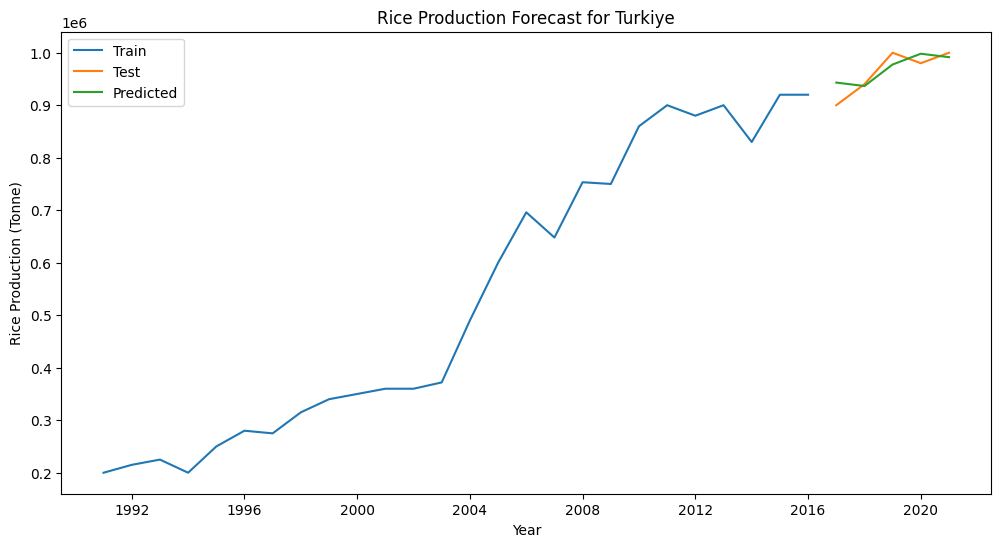

Processing country: Turkmenistan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

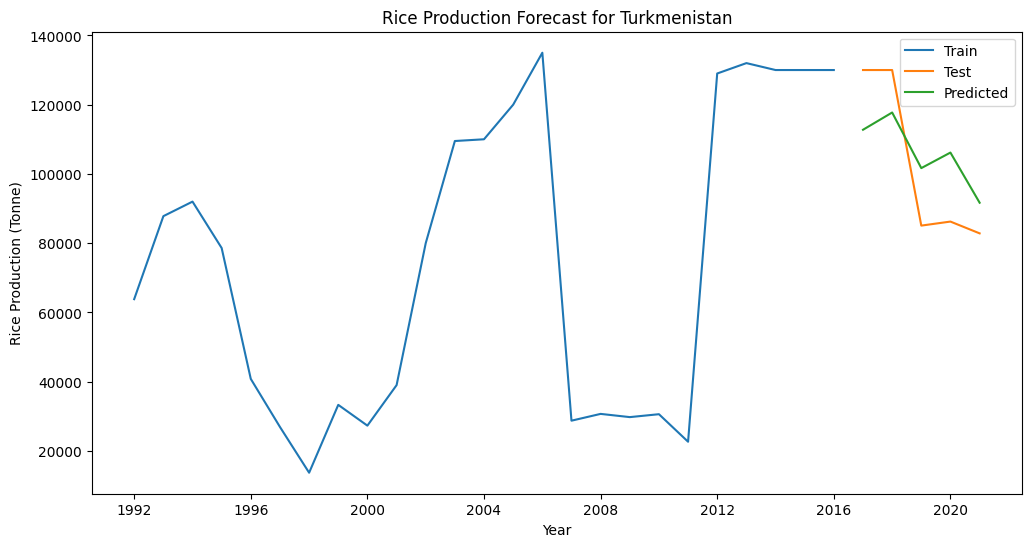

Processing country: Uzbekistan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

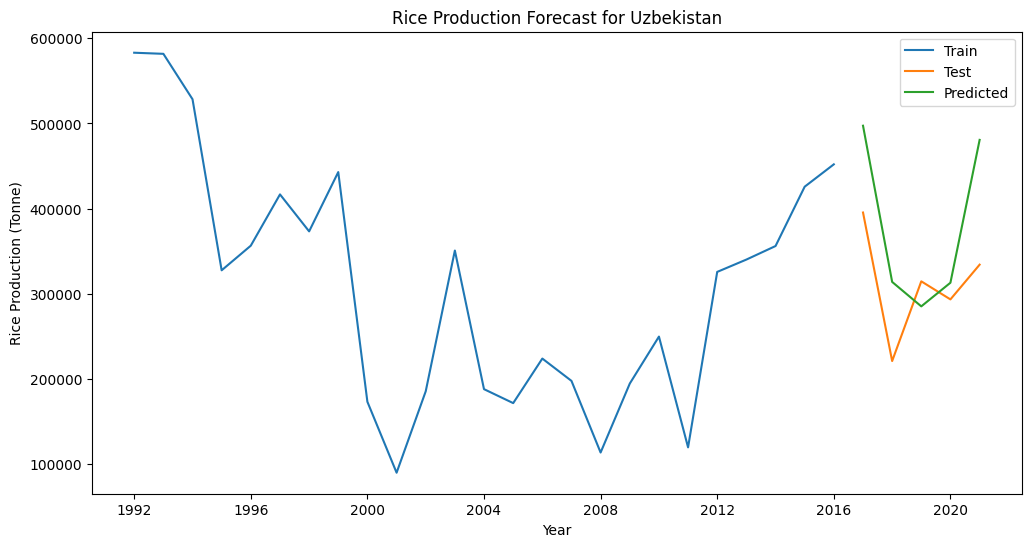

Processing country: Vietnam


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packag

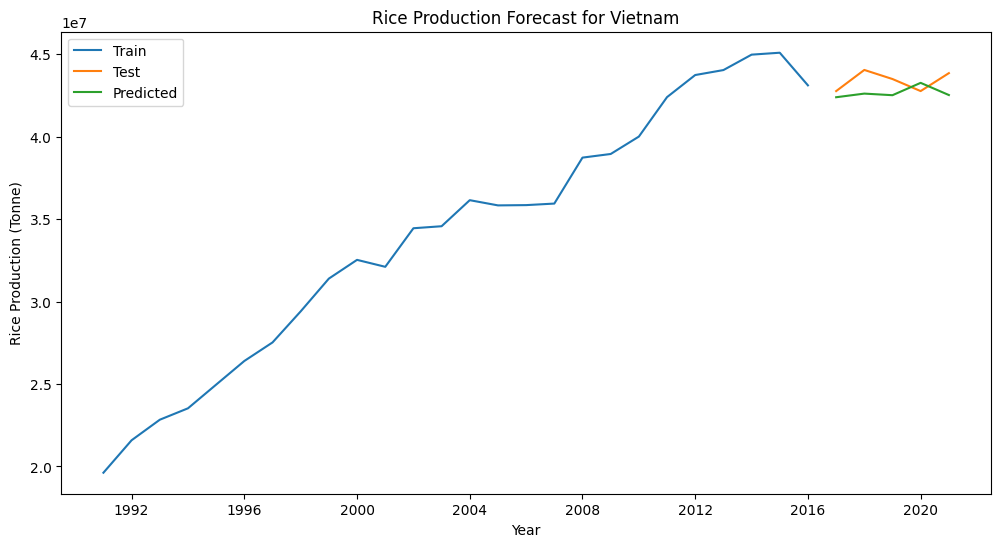

Best model for Afghanistan: MSE = 3187099793.3046
Best model for Azerbaijan: MSE = 13152744.5518
Best model for Bangladesh: MSE = 772235151005.5079
Best model for Bhutan: MSE = 343191967.7565
Best model for Brunei Darussalam: MSE = 39828.6078
Best model for Cambodia: MSE = 40175028773.7977
Best model for China: MSE = 5882384997051.8613
Best model for Democratic People's Republic of Korea: MSE = 60569455805.6738
Best model for Hong Kong: MSE = 0.0000
Best model for India: MSE = 38102845761823.2344
Best model for Indonesia: MSE = 12038433146116.1836
Best model for Iran: MSE = 128223420057.5836
Best model for Iraq: MSE = 28751753904.7687
Best model for Japan: MSE = 60566686267.1407
Best model for Kazakhstan: MSE = 1728286570.7874
Best model for Kyrgyzstan: MSE = 1806660.0060
Best model for Lao People's Democratic Rep.: MSE = 428447647672.5707
Best model for Malaysia: MSE = 32039037652.7161
Best model for Myanmar: MSE = 249675735591.6033
Best model for Nepal: MSE = 130498849211.2016
Best m

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data

# Get the list of countries
countries = df['Country'].unique()

# Initialize a list to store results
results = []
best_models = {}

# Loop through each country
for country in countries:
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

    # Check if there is enough data for train-test split
    if len(country_data) > 5:
        train = country_data.iloc[:-5]
        test = country_data.iloc[-5:]

        # Fine-tune the Exponential Smoothing model
        try:
            best_mse = float('inf')  # Initialize the best MSE to infinity
            best_params = None  # Initialize the best parameters to None

            # Determine if the data has zero or negative values
            has_negative_or_zero = (train['Rice Production(Tonne)'] <= 0).any()

            # Define the parameters to try
            trends = ['add']
            seasonals = ['add']
            seasonal_periods = [2, 3, 4, 5, 6, 7, 8, 9, 10]

            # Include multiplicative options if there are no zero or negative values
            if not has_negative_or_zero:
                trends.append('mul')
                seasonals.append('mul')

            # Perform tuning on trend, seasonal, and seasonal_periods parameters
            for trend in trends:
                for seasonal in seasonals:
                    for seasonal_period in seasonal_periods:  # Changed variable name to seasonal_period
                        model = ExponentialSmoothing(train['Rice Production(Tonne)'],
                                                     trend=trend,
                                                     seasonal=seasonal,
                                                     seasonal_periods=seasonal_period)  # Changed variable name to seasonal_period
                        fitted_model = model.fit()

                        # Make predictions
                        predictions = fitted_model.forecast(len(test))

                        # Calculate MSE
                        mse = mean_squared_error(test['Rice Production(Tonne)'], predictions)

                        # Update best parameters if current MSE is better
                        if mse < best_mse:
                            best_mse = mse
                            best_params = (trend, seasonal, seasonal_period)

            # Fit the Exponential Smoothing model with the best parameters
            model = ExponentialSmoothing(train['Rice Production(Tonne)'],
                                         trend=best_params[0],
                                         seasonal=best_params[1],
                                         seasonal_periods=best_params[2])
            fitted_model = model.fit()

            # Make predictions
            predictions = fitted_model.forecast(len(test))

            # Plot the results
            plt.figure(figsize=(12, 6))
            plt.plot(train.index, train['Rice Production(Tonne)'], label='Train')
            plt.plot(test.index, test['Rice Production(Tonne)'], label='Test')
            plt.plot(test.index, predictions, label='Predicted')
            plt.xlabel('Year')
            plt.ylabel('Rice Production (Tonne)')
            plt.title(f'Rice Production Forecast for {country}')
            plt.legend()
            plt.show()

            # Store the best model and MSE
            best_models[country] = (fitted_model, best_mse)

        except Exception as e:
            print(f"An error occurred for {country}: {e}")

    else:
        print(f"Not enough data for {country} to perform train-test split.")

# Display the results
for country, (model, mse) in best_models.items():
    print(f'Best model for {country}: MSE = {mse:.4f}')



In [ ]:
# Initialize lists to store parameter values and RMSE
countries_list = []
trend_list = []
seasonal_list = []
seasonal_period_list = []
rmse_list = []

# Extract the information from best_models dictionary
for country, (model, rmse) in best_models.items():
    trend = model.model.trend
    seasonal = model.model.seasonal
    seasonal_period = model.model.seasonal_periods

    countries_list.append(country)
    trend_list.append(trend)
    seasonal_list.append(seasonal)
    seasonal_period_list.append(seasonal_period)
    rmse_list.append(rmse)

# Create a DataFrame
results_df = pd.DataFrame({
    'Country': countries_list,
    'Trend': trend_list,
    'Seasonal': seasonal_list,
    'Seasonal Period': seasonal_period_list,
    'RMSE': rmse_list
})

# Display the DataFrame
print("Best Exponential Smoothing Parameters and RMSE for Each Country:")
print(results_df.to_string(index=False))


Best Exponential Smoothing Parameters and RMSE for Each Country:
                              Country Trend Seasonal  Seasonal Period         RMSE
                          Afghanistan   add      add                8 3.187100e+09
                           Azerbaijan   add      add                9 1.315274e+07
                           Bangladesh   mul      add                6 7.722352e+11
                               Bhutan   add      mul                9 3.431920e+08
                    Brunei Darussalam   mul      mul                9 3.982861e+04
                             Cambodia   add      add                3 4.017503e+10
                                China   mul      add                5 5.882385e+12
Democratic People's Republic of Korea   add      mul                3 6.056946e+10
                            Hong Kong   add      add                9 1.489645e-05
                                India   mul      mul                7 3.810285e+13
                      

<ipython-input-26-e99da966e8cc>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(countries))


Processing country: Afghanistan
Processing country: Azerbaijan
Processing country: Bangladesh
Processing country: Bhutan
Processing country: Brunei Darussalam
Processing country: Cambodia
Processing country: China
Processing country: Democratic People's Republic of Korea
Processing country: Hong Kong
Processing country: India
Processing country: Indonesia
Processing country: Iran
Processing country: Iraq
Processing country: Japan
Processing country: Kazakhstan
Processing country: Kyrgyzstan
Processing country: Lao People's Democratic Rep.
Processing country: Malaysia
Processing country: Myanmar
Processing country: Nepal
Processing country: Pakistan
Processing country: Philippines
Processing country: Republic of Korea
Processing country: Sri Lanka
Processing country: Taiwan Province of China
Processing country: Tajikistan
Processing country: Thailand
Processing country: Timor-Leste
Processing country: Turkiye
Processing country: Turkmenistan
Processing country: Uzbekistan
Processing cou

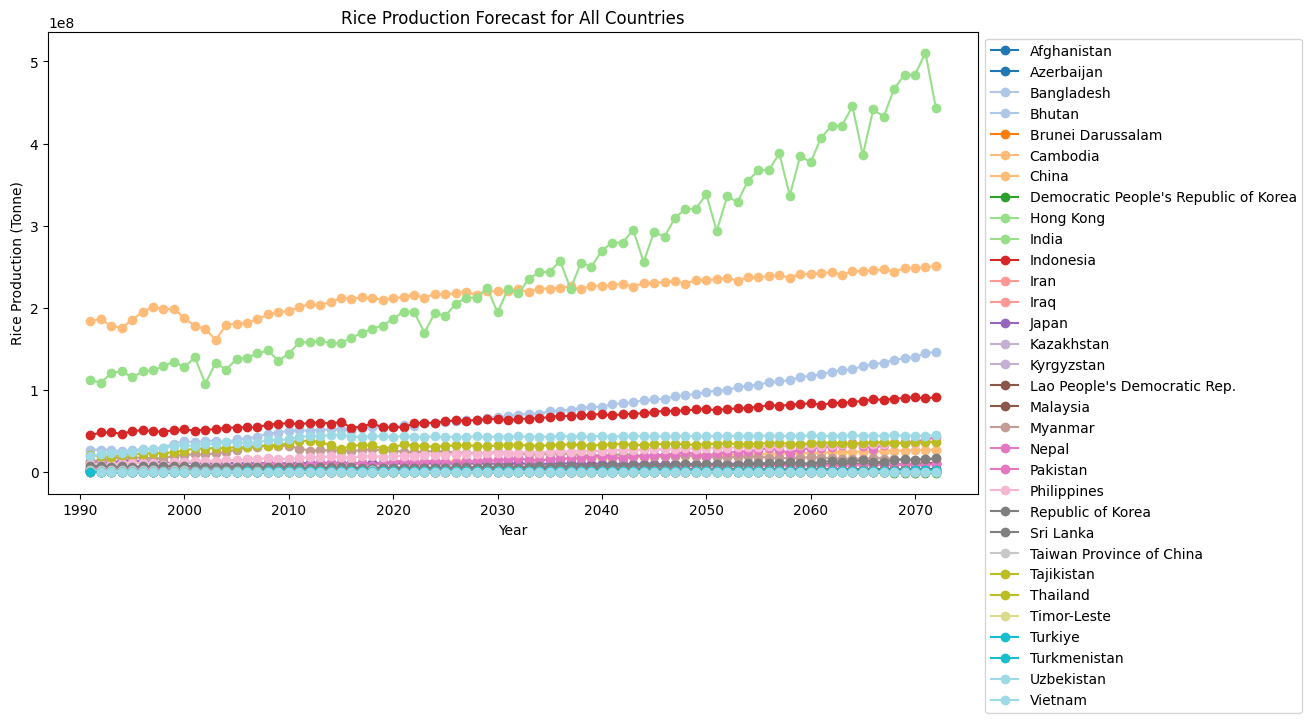

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your dataframe and best_models is your dictionary of models
# Get the list of countries
countries = df['Country'].unique()

# Create a single figure
plt.figure(figsize=(12, 6))

# Generate a colormap with distinct colors for each country
colors = plt.cm.get_cmap('tab20', len(countries))

# Loop through each country
for i, country in enumerate(countries):
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

        if country in best_models:
            model_fit, best_rmse = best_models[country]

            # Make predictions for the next 10 years
            start_year = country_data.index[-1] + pd.DateOffset(years=1)
            end_year = start_year + pd.DateOffset(years=50)
            predictions = model_fit.predict(start=start_year, end=end_year)

            # Create a DataFrame for predictions with the correct years
            prediction_years = pd.date_range(start=start_year, end=end_year, freq='AS-JAN')  # Adjust the frequency as needed
            predictions_df = pd.DataFrame(predictions.values, index=prediction_years, columns=['Rice Production(Tonne)'])

            # Combine the historical data with predictions
            combined_data = pd.concat([country_data, predictions_df])

            # Plot the results with distinct color
            plt.plot(combined_data.index, combined_data['Rice Production(Tonne)'], label=f'{country}', color=colors(i), marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Rice Production (Tonne)')
plt.title('Rice Production Forecast for All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-27-7d8da3891153>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(countries))


Processing country: Afghanistan
Processing country: Azerbaijan
Processing country: Bangladesh
Processing country: Bhutan
Processing country: Brunei Darussalam
Processing country: Cambodia
Processing country: China
Processing country: Democratic People's Republic of Korea
Processing country: Hong Kong
Processing country: India
Processing country: Indonesia
Processing country: Iran
Processing country: Iraq
Processing country: Japan
Processing country: Kazakhstan
Processing country: Kyrgyzstan
Processing country: Lao People's Democratic Rep.
Processing country: Malaysia
Processing country: Myanmar
Processing country: Nepal
Processing country: Pakistan
Processing country: Philippines
Processing country: Republic of Korea
Processing country: Sri Lanka
Processing country: Taiwan Province of China
Processing country: Tajikistan
Processing country: Thailand
Processing country: Timor-Leste
Processing country: Turkiye
Processing country: Turkmenistan
Processing country: Uzbekistan
Processing cou

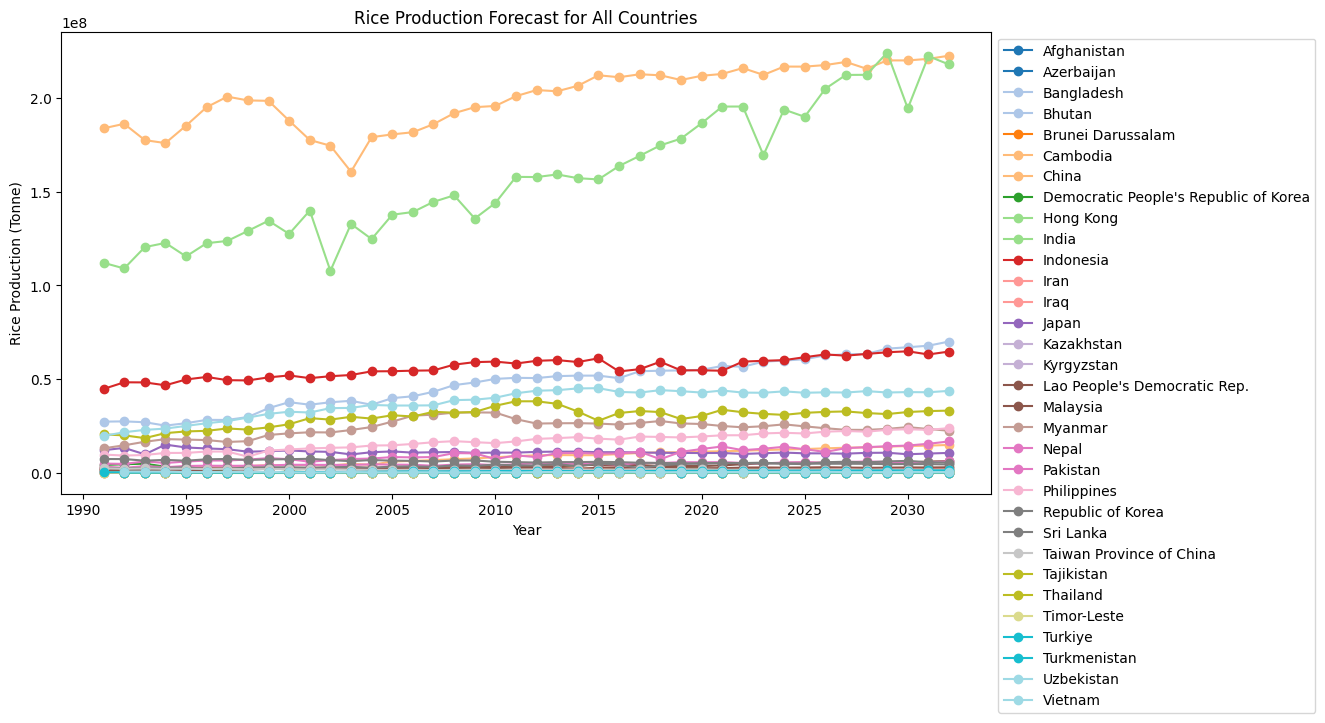

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your dataframe and best_models is your dictionary of models
# Get the list of countries
countries = df['Country'].unique()

# Create a single figure
plt.figure(figsize=(12, 6))

# Generate a colormap with distinct colors for each country
colors = plt.cm.get_cmap('tab20', len(countries))

# Loop through each country
for i, country in enumerate(countries):
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

        if country in best_models:
            model_fit, best_rmse = best_models[country]

            # Make predictions for the next 10 years
            start_year = country_data.index[-1] + pd.DateOffset(years=1)
            end_year = start_year + pd.DateOffset(years=10)
            predictions = model_fit.predict(start=start_year, end=end_year)

            # Create a DataFrame for predictions with the correct years
            prediction_years = pd.date_range(start=start_year, end=end_year, freq='AS-JAN')  # Adjust the frequency as needed
            predictions_df = pd.DataFrame(predictions.values, index=prediction_years, columns=['Rice Production(Tonne)'])

            # Combine the historical data with predictions
            combined_data = pd.concat([country_data, predictions_df])

            # Plot the results with distinct color
            plt.plot(combined_data.index, combined_data['Rice Production(Tonne)'], label=f'{country}', color=colors(i), marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Rice Production (Tonne)')
plt.title('Rice Production Forecast for All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-28-b12788ea48be>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(countries))


Processing country: Afghanistan
Processing country: Azerbaijan
Processing country: Bangladesh
Processing country: Bhutan
Processing country: Brunei Darussalam
Processing country: Cambodia
Processing country: China
Processing country: Democratic People's Republic of Korea
Processing country: Hong Kong
Processing country: India
Processing country: Indonesia
Processing country: Iran
Processing country: Iraq
Processing country: Japan
Processing country: Kazakhstan
Processing country: Kyrgyzstan
Processing country: Lao People's Democratic Rep.
Processing country: Malaysia
Processing country: Myanmar
Processing country: Nepal
Processing country: Pakistan
Processing country: Philippines
Processing country: Republic of Korea
Processing country: Sri Lanka
Processing country: Taiwan Province of China
Processing country: Tajikistan
Processing country: Thailand
Processing country: Timor-Leste
Processing country: Turkiye
Processing country: Turkmenistan
Processing country: Uzbekistan
Processing cou

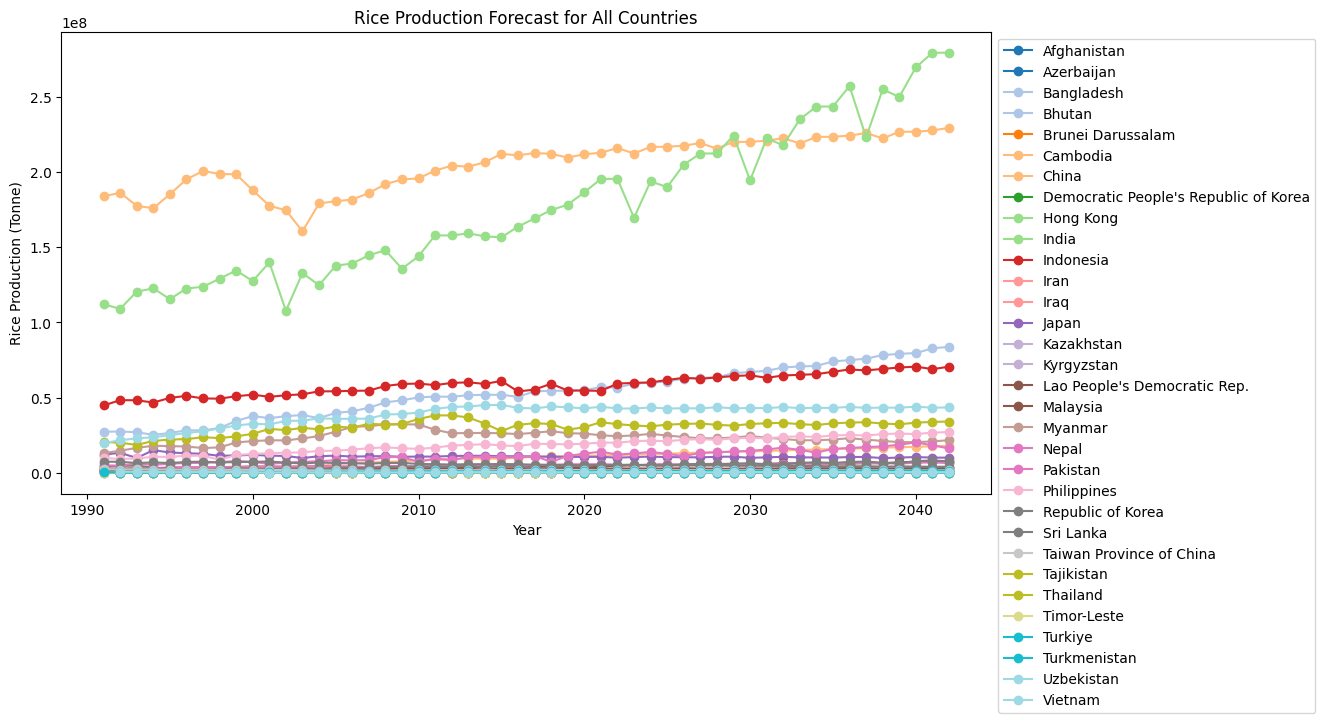

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your dataframe and best_models is your dictionary of models
# Get the list of countries
countries = df['Country'].unique()

# Create a single figure
plt.figure(figsize=(12, 6))

# Generate a colormap with distinct colors for each country
colors = plt.cm.get_cmap('tab20', len(countries))

# Loop through each country
for i, country in enumerate(countries):
    print(f"Processing country: {country}")

    # Filter the data for the current country
    country_data = df[df['Country'] == country].copy()

    # Set 'Year' as index if not already set and specify frequency
    if 'Year' in country_data.columns:
        country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
        country_data.set_index('Year', inplace=True)

        if country in best_models:
            model_fit, best_rmse = best_models[country]

            # Make predictions for the next 10 years
            start_year = country_data.index[-1] + pd.DateOffset(years=1)
            end_year = start_year + pd.DateOffset(years=20)
            predictions = model_fit.predict(start=start_year, end=end_year)

            # Create a DataFrame for predictions with the correct years
            prediction_years = pd.date_range(start=start_year, end=end_year, freq='AS-JAN')  # Adjust the frequency as needed
            predictions_df = pd.DataFrame(predictions.values, index=prediction_years, columns=['Rice Production(Tonne)'])

            # Combine the historical data with predictions
            combined_data = pd.concat([country_data, predictions_df])

            # Plot the results with distinct color
            plt.plot(combined_data.index, combined_data['Rice Production(Tonne)'], label=f'{country}', color=colors(i), marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Rice Production (Tonne)')
plt.title('Rice Production Forecast for All Countries')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()